# Titanic Kaggle Project

### The Challange

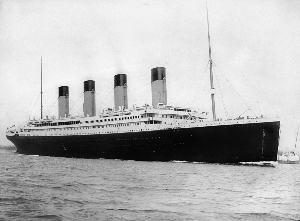

The sinking of the Titanic is one of the most infamous shipwrecks in history. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive/ML model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

This is a supervised learning problem (since we have labels), furthermore it is a binary classification problem (Only two classes - survived (1) or not survived (0))

### Exploratory Data Analysis (EDA)

#### Summary Statisitics

In [1]:
# Import relevant python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

In [2]:
# Load CSV data into notebook as a DataFrame using pandas 
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
# See first 5 rows of each DataFrame
display(df.head())
display(test.head())

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

#### Data Dictionary

survival - Did they Survive or not? (1 = Yes, 0 = No)
pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Sex	- Gender
Age	- Age in years	
sibsp - # of siblings / spouses aboard the Titanic	
parch - # of parents / children aboard the Titanic	
ticket - Ticket number	
fare - Passenger fare	
cabin - Cabin number	
embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
# Info for the whole DataFrame
display(df.info())
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<font color='green'> We can see that this dataset is relatively clean, since it has already been preprocessed for us. However, there are null values in the 'Age', 'Cabin', 'Embarked' columns, which we'll have to deal with later on. We have 891 rows, which represent the 891 passengers we have data for including whether they survived. In Total, we have 12 columns from which we can make useful features from. </font>

In [5]:
# Let's look at some descriptive statistics for the numerical columns 
display(df.describe())

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<font color='green'> <d> This shows us several insights:
<ul>
    <li> Only 38.38% of passengers survived </li>
<li> The vast majority of passengers were lower class (median ticket class is 3) </li>
<li> The passenger were fairly young, with the average being around 28 and 75% were younger than 38. However the oldesst person to board was 80 and there were also babies a few months old. </li>
<li> Average # of sibling/spouses was 0.5, but ranges from 0 to 8 </li>
<li> Average # of parents/children was 0.38, but ranges from 0 to 6 </li>
<li> Large disparity in the Fare paid by individuals(vast majority paid a low fair as 75% paid less than 31), however max paid is 512. Some people also boarded for free. </li> 
    </ul> </d> </font>

In [6]:
# Let's look at some categorical data 
display(df['Pclass'].value_counts())
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


<font color='green'> <ul>
    <li> Almost 500/891 passengers had 3rd class tickets </li>
    <li> Almost 600/891 were men </li>
    <li> Almost 650/891 boarded from southhampton </li>
</ul> </font>

In [7]:
# Using Group by
display(df.groupby('Sex')['Survived'].mean())
display(df.groupby('Pclass')['Survived'].mean())
display(df.groupby('Embarked')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<font color='green'> <ul>
    <li> 74.2% of females survived, whilst only 18.9% of men did </li>
    <li> The more upper class, the more likely you were to survive </li>
    <li> Passengers who embarked at Cherbourg were more likely to survive </li>
</ul> </font>

PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  138.696504 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.551296  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -4.496004   0.076599   
Age            138.696504 -0.551296  -4.496004  211.019125  -4.163334   
SibSp          -16.325843 -0.018954   0.076599   -4.163334   1.216043   
Parch           -0.342697  0.032017   0.012429   -2.344191   0.368739   
Fare           161.883369  6.221787 -22.830196   73.849030   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -2.344191    73.849030  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846

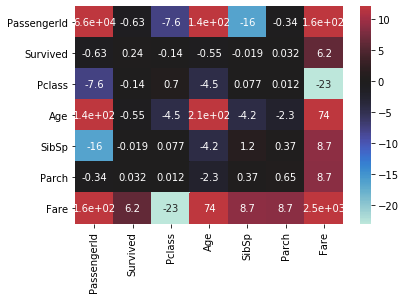

In [8]:
display(df.cov());
sns.heatmap(df.cov(), vmin=-23, vmax=12, annot=True, center=0)

<font color='green'> <ul>
    <li> Huge variation in Fare and Age </li>
    <li> Higher the Fare, more likley to sruvive, higher class, older, have family </li>
</ul> </font>

In [9]:
pd.pivot_table(df, values='Survived',index='Sex',columns='Pclass', margins=True)

Pclass         1         2         3       All
Sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

<font color='green'> As we can almost all see 1st and 2nd class females survived. The two main insights we have so far are that sex and class are very strong predictors of survival.   </font>

#### Vizualization

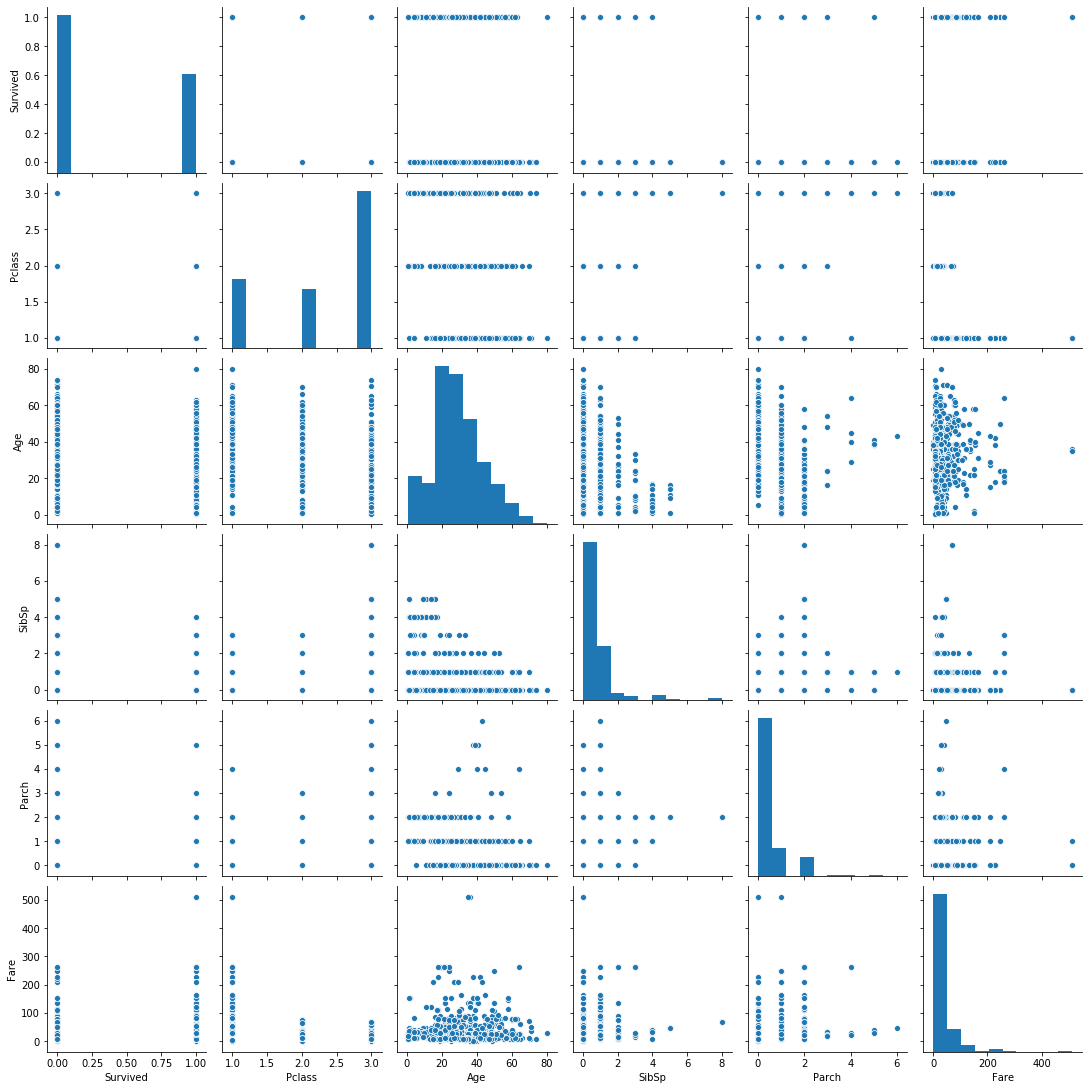

In [10]:
sns.pairplot(df.drop('PassengerId', axis=1));

<font color='green'> Positive skewed data for age, sibsp, parach and fair. Mean > medium, so majority of passengers lie in the lower end and only few in upper tail that disort the mean.  </font>

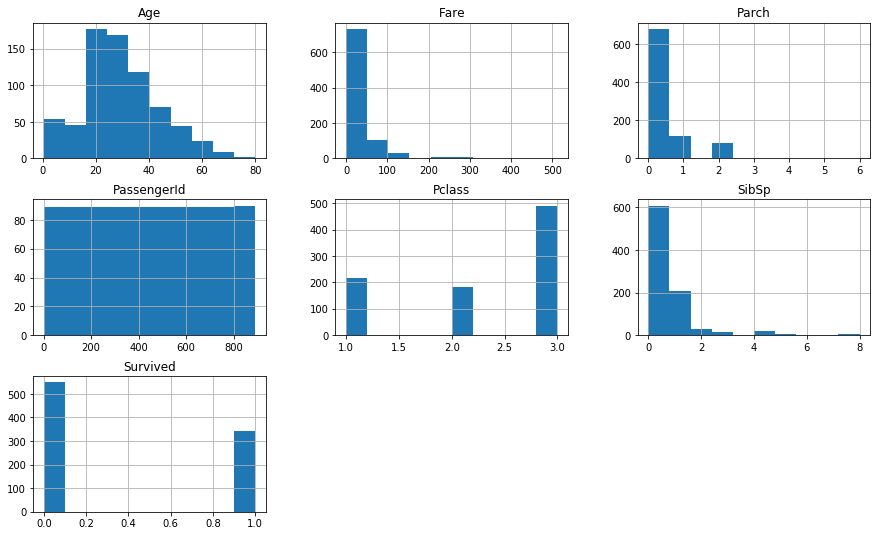

In [11]:
df.hist(figsize=(15,9));

#### Feature Engineering

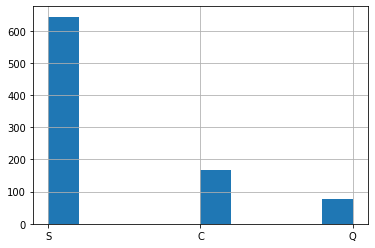

In [12]:
# Now let's explore some of the other columns such as Name, Ticket, Cabin, Embarked if we can
df['Embarked'].hist();

In [13]:
print(df[['Name','Ticket','Cabin','Embarked']].count())
print(df['Name'].unique().size)
print(df['Ticket'].unique().size)
print(df['Cabin'].unique().size)
print(df['Embarked'].value_counts())

Name        891
Ticket      891
Cabin       204
Embarked    889
dtype: int64
891
681
148
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
df['Name'].sample(10)

169                          Ling, Mr. Lee
157                        Corn, Mr. Harry
266              Panula, Mr. Ernesti Arvid
51            Nosworthy, Mr. Richard Cater
563                      Simmons, Mr. John
316    Kantor, Mrs. Sinai (Miriam Sternin)
349                       Dimic, Mr. Jovan
832                         Saad, Mr. Amin
293                    Haas, Miss. Aloisia
462                      Gee, Mr. Arthur H
Name: Name, dtype: object

<font color='green'> The passenger's full name is available including their Title (e.g. mr, mrs or miss) which can inform us of their marritial status. </font>

In [15]:
df['Ticket'].sample(10)

704               350025
397                28403
837               392092
674               239856
294               349233
414    STON/O 2. 3101269
576               243880
205               347054
765                13502
604               111426
Name: Ticket, dtype: object

In [16]:
df['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [17]:
df['Ticket'].tail(10)

881              349257
882                7552
883    C.A./SOTON 34068
884     SOTON/OQ 392076
885              382652
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, dtype: object

<font color='green'> The ticket column doesn't seem to give any useful information as far as predicting survival, hence we can possibly remove this later  </font>

In [18]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<font color='green'> Several broad cabin types: A, B, C, D, E. A is probably the best & most expensive, followed by B, ect. This may be a good predictor of survival. </font>

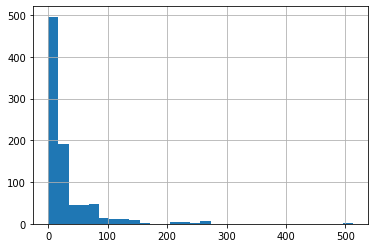

In [19]:
df['Fare'].hist(bins=30);

In [20]:
df['fare_bin']=pd.cut(df['Fare'],bins=[-1,10,30,100,np.inf], labels=[10,30,100,187])
df.groupby('fare_bin')['Survived'].mean()

fare_bin
10     0.199405
30     0.433022
100    0.535912
187    0.735849
Name: Survived, dtype: float64

In [97]:
test['fare_bin']=pd.cut(df['Fare'],bins=[-1,10,30,100,np.inf], labels=[10,30,100,187])

<font color='green'> This is a pretty good feature to predict is someone survives or not. </font>

In [21]:
df['Title'] = df['Name'].str.extract('(,\s\w+)')
df['Title'] = df['Title'].str.replace(", ","")
print(df['Title'].unique())
df['Title'] = df['Title'].str.replace("Don|Major|Capt|Jonkheer|Rev|Col|Dr|the|Sir","Mr")
df['Title'] = df['Title'].str.replace("Mlle|Ms","Miss")
df['Title'] = df['Title'].str.replace("Countess|Mme|Lady","Mrs")
df['Title'].value_counts()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the' 'Jonkheer']


Mr        539
Miss      185
Mrs       127
Master     40
Name: Title, dtype: int64

In [116]:
test['Title'] = test['Name'].str.extract('(,\s\w+)')
test['Title'] = test['Title'].str.replace(", ","")
print(df['Title'].unique())
test['Title'] = test['Title'].str.replace("Don|Major|Capt|Jonkheer|Rev|Col|Dr|the|Sir|Mra","Mr")
test['Title'] = test['Title'].str.replace("Mlle|Ms","Miss")
test['Title'] = test['Title'].str.replace("Countess|Mme|Lady","Mrs")
test.iloc[414,12] = 'Mr'
test['Title'].value_counts()

['Mr' 'Mrs' 'Miss' 'Master']


Mr        246
Miss       79
Mrs        72
Master     21
Name: Title, dtype: int64

In [22]:
df.groupby('Title')['Survived'].mean()

Title
Master    0.575000
Miss      0.702703
Mr        0.163265
Mrs       0.795276
Name: Survived, dtype: float64

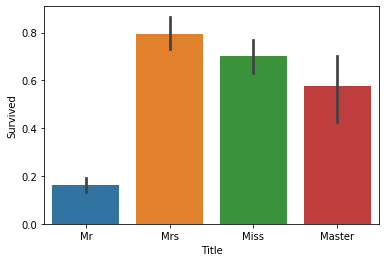

In [23]:
sns.barplot(x='Title', y='Survived', data=df);

<font color='green'> Before the name column was useless, but now we've engineered a useful 'Title' feature from this, which is clearly a strong predictor for survival. Let's do a similar thing with the cabin column.</font>

In [24]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked fare_bin Title  
0        0         A/5 21171   7.2500   NaN        S       10    Mr  
1        0          PC 17599  71.2833   C85        C      100   Mrs  
2        0  STON/O2. 3101282   7.9250   NaN        S       10  Miss  
3        0            113803  53.1000  C123        S      100   Mrs  
4        0            373450   8.0500   NaN        S       10    Mr  
..     ...               ...      ...   ...      ...      ...   ...  
886      0            211536  13.0000   NaN        S       30    Mr  
887      0            112053  30.0000   B42        S       30  Miss  
888      2        W./C. 6607  23.4500   NaN        S       30  Miss  
889      0            111369  30.0000  C148        C       30    Mr  
890      0            370376   7.7500   NaN        Q       10    Mr  

[891 rows x 14 columns]

In [25]:
print(df['Cabin'].count())
new1 = df[df['Pclass'] == 1]
new2 = df[df['Pclass'] == 2]
new3 = df[df['Pclass'] == 3]
print(new1['Cabin'].count())
print(new2['Cabin'].count())
print(new3['Cabin'].count())

204
176
16
12


In [26]:
df['Deck']=df['Cabin']
df['Deck'] =df['Deck'].str.replace('(A\d+(\s)?)+' ,'A')
df['Deck'] =df['Deck'].str.replace('(B\d+(\s)?)+' ,'B')
df['Deck'] =df['Deck'].str.replace('(C\d+(\s)?)+' ,'C')
df['Deck'] =df['Deck'].str.replace('(D\d+(\s)?)+' ,'D')
df['Deck'] =df['Deck'].str.replace('(E\d+(\s)?)+' ,'E')
df['Deck'] =df['Deck'].str.replace('(F\d+(\s)?)+' ,'F')
df['Deck'] =df['Deck'].str.replace('(G\d+(\s)?)+' ,'G')
df['Deck'] =df['Deck'].str.replace('(F\s[A-Z]+)' ,'F')
df['Deck'] =df['Deck'].str.replace('T' ,'Unknown')
df['Deck'] =df['Deck'].replace(np.nan ,'Unknown')
df['Deck'].value_counts()

Unknown    688
C           59
B           47
D           33
E           32
A           15
F           13
G            4
Name: Deck, dtype: int64

In [120]:
test['Deck']=test['Cabin']
test['Deck'] =test['Deck'].str.replace('(A\d+(\s)?)+' ,'A')
test['Deck'] =test['Deck'].str.replace('(B\d+(\s)?)+' ,'B')
test['Deck'] =test['Deck'].str.replace('(C\d+(\s)?)+' ,'C')
test['Deck'] =test['Deck'].str.replace('(D\d+(\s)?)+' ,'D')
test['Deck'] =test['Deck'].str.replace('(E\d+(\s)?)+' ,'E')
test['Deck'] =test['Deck'].str.replace('(F\d+(\s)?)+' ,'F')
test['Deck'] =test['Deck'].str.replace('(G\d+(\s)?)+' ,'G')
test['Deck'] =test['Deck'].str.replace('(F\s[A-Z]+)' ,'F')
#df['Deck'] =test['Deck'].str.replace('T' ,'Unknown')
test['Deck'] =test['Deck'].replace(np.nan ,'Unknown')
test['Deck'].value_counts()

Unknown    327
C           35
B           18
D           13
E            9
F            8
A            7
G            1
Name: Deck, dtype: int64

In [27]:
df.groupby('Deck')['Survived'].mean()

Deck
A          0.466667
B          0.744681
C          0.593220
D          0.757576
E          0.750000
F          0.615385
G          0.500000
Unknown    0.299419
Name: Survived, dtype: float64

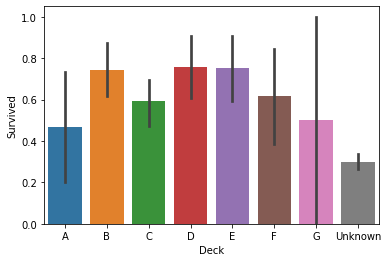

In [28]:
sns.barplot(x='Deck', y='Survived', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']);

<font color='green'> We can see the deck feature we have just created is a stong predictor of survival. Let's engineer some more features! </font>

In [29]:
# Family Size Feature
df['Family_Size'] = df['SibSp']+df['Parch']
# Interaction between age & family
df['Age*Class']=df['Age']*df['Pclass']
# Fare per person in each family
df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked fare_bin Title     Deck  \
0        0         A/5 21171   7.2500   NaN        S       10    Mr  Unknown   
1        0          PC 17599  71.2833   C85        C      100   Mrs        C   
2        0  STON/O2. 3101282   7.9250   NaN        S       10  Miss  Unknown   
3        0            113803  53.1000  C123        S      100   Mrs        C   
4        0            373450   8.0500   NaN        S       10    Mr  Unknown   
..     ...               ...      ...   ...      ...      ...   ...      ...   
886      0            211536  13.0000   NaN        S       30    Mr  Unknown   
887      0            112053  30.0000   B42        S       30  Miss        B   
888      2        W./C. 6607  23.4500   NaN        S       30  Miss  Unknown   
889      0            111369  30.0000  C148        C       30    Mr        C   
890      0            370376   7.7500   NaN        Q       10    Mr  Unknown   

     Family_Size  Age*Class  Fare_Per_Person  
0              1       66.0          3.62500  
1              1       38.0         35.64165  
2              0       78.0          7.92500  
3              1       35.0         26.55000  
4              0      105.0          8.05000  
..           ...        ...              ...  
886            0       54.0         13.00000  
887            0       19.0         30.00000  
888            3        NaN          5.86250  
889            0       26.0         30.00000  
890            0       96.0          7.75000  

[891 rows x 18 columns]

In [122]:
test['Family_Size'] = test['SibSp']+df['Parch']
# Interaction between age & family
test['Age*Class']=test['Age']*test['Pclass']
# Fare per person in each family
test['Fare_Per_Person']=test['Fare']/(test['Family_Size']+1)

<font color='green'> Great, now that we have all of our features, we can fill in missing values and drop the reundent columns.</font>

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              714 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Cabin            204 non-null    object  
 11  Embarked         889 non-null    object  
 12  fare_bin         891 non-null    category
 13  Title            891 non-null    object  
 14  Deck             891 non-null    object  
 15  Family_Size      891 non-null    int64   
 16  Age*Class        714 non-null    float64 
 1

In [31]:
# Impute age column with median value 
df[df['Age'].isnull()].head(5)
df['Age'] = df['Age'].fillna(df['Age'].median())
# Interaction between new age column & family
df['Age*Class']=df['Age']*df['Pclass']
print(df['Age'].count())
print(df['Age'].isnull().sum())

891
0


In [127]:
test[test['Age'].isnull()].head(5)
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Age*Class']=test['Age']*test['Pclass']
test['Fare_Per_Person']=test['Fare']/(test['Family_Size']+1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Cabin            204 non-null    object  
 11  Embarked         889 non-null    object  
 12  fare_bin         891 non-null    category
 13  Title            891 non-null    object  
 14  Deck             891 non-null    object  
 15  Family_Size      891 non-null    int64   
 16  Age*Class        891 non-null    float64 
 1

In [33]:
# Check for duplicates
df[df.duplicated(subset=['Name'])]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, fare_bin, Title, Deck, Family_Size, Age*Class, Fare_Per_Person]
Index: []

In [34]:
# Let's drop all redundent columns which won't help the model predict possibly becuase it was used to make a better feature
df.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         891 non-null    int64   
 1   Pclass           891 non-null    int64   
 2   Sex              891 non-null    object  
 3   Age              891 non-null    float64 
 4   SibSp            891 non-null    int64   
 5   Parch            891 non-null    int64   
 6   Fare             891 non-null    float64 
 7   Embarked         889 non-null    object  
 8   fare_bin         891 non-null    category
 9   Title            891 non-null    object  
 10  Deck             891 non-null    object  
 11  Family_Size      891 non-null    int64   
 12  Age*Class        891 non-null    float64 
 13  Fare_Per_Person  891 non-null    float64 
dtypes: category(1), float64(4), int64(5), object(4)
memory usage: 91.7+ KB


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked fare_bin  \
0         0       3    male  22.0      1      0   7.2500        S       10   
1         1       1  female  38.0      1      0  71.2833        C      100   
2         1       3  female  26.0      0      0   7.9250        S       10   
3         1       1  female  35.0      1      0  53.1000        S      100   
4         0       3    male  35.0      0      0   8.0500        S       10   

  Title     Deck  Family_Size  Age*Class  Fare_Per_Person  
0    Mr  Unknown            1       66.0          3.62500  
1   Mrs        C            1       38.0         35.64165  
2  Miss  Unknown            0       78.0          7.92500  
3   Mrs        C            1       35.0         26.55000  
4    Mr  Unknown            0      105.0          8.05000

In [131]:
test.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1, inplace=True);

KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin'] not found in axis"

In [35]:
# Impute the Embarked column
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isnull().sum())
print(df.iloc[61])
df.iloc[829]

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
fare_bin           0
Title              0
Deck               0
Family_Size        0
Age*Class          0
Fare_Per_Person    0
dtype: int64
Survived                1
Pclass                  1
Sex                female
Age                    38
SibSp                   0
Parch                   0
Fare                   80
Embarked                S
fare_bin              100
Title                Miss
Deck                    B
Family_Size             0
Age*Class              38
Fare_Per_Person        80
Name: 61, dtype: object


Survived                1
Pclass                  1
Sex                female
Age                    62
SibSp                   0
Parch                   0
Fare                   80
Embarked                S
fare_bin              100
Title                 Mrs
Deck                    B
Family_Size             0
Age*Class              62
Fare_Per_Person        80
Name: 829, dtype: object

<font color='green'> This looks great, none of columns have missing values. Now we can go onto the next stage and pre-process it ready for our models by one-hot encoding and scaling the ranges.</font>

In [36]:
# Let's seperate the feature matrix from the target vector
X = df.drop('Survived', axis=1)
y = df['Survived']
display(X)
display(y)

Pclass     Sex   Age  SibSp  Parch     Fare Embarked fare_bin Title  \
0         3    male  22.0      1      0   7.2500        S       10    Mr   
1         1  female  38.0      1      0  71.2833        C      100   Mrs   
2         3  female  26.0      0      0   7.9250        S       10  Miss   
3         1  female  35.0      1      0  53.1000        S      100   Mrs   
4         3    male  35.0      0      0   8.0500        S       10    Mr   
..      ...     ...   ...    ...    ...      ...      ...      ...   ...   
886       2    male  27.0      0      0  13.0000        S       30    Mr   
887       1  female  19.0      0      0  30.0000        S       30  Miss   
888       3  female  28.0      1      2  23.4500        S       30  Miss   
889       1    male  26.0      0      0  30.0000        C       30    Mr   
890       3    male  32.0      0      0   7.7500        Q       10    Mr   

        Deck  Family_Size  Age*Class  Fare_Per_Person  
0    Unknown            1       66.0          3.62500  
1          C            1       38.0         35.64165  
2    Unknown            0       78.0          7.92500  
3          C            1       35.0         26.55000  
4    Unknown            0      105.0          8.05000  
..       ...          ...        ...              ...  
886  Unknown            0       54.0         13.00000  
887        B            0       19.0         30.00000  
888  Unknown            3       84.0          5.86250  
889        C            0       26.0         30.00000  
890  Unknown            0       96.0          7.75000  

[891 rows x 13 columns]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           891 non-null    int64   
 1   Sex              891 non-null    object  
 2   Age              891 non-null    float64 
 3   SibSp            891 non-null    int64   
 4   Parch            891 non-null    int64   
 5   Fare             891 non-null    float64 
 6   Embarked         891 non-null    object  
 7   fare_bin         891 non-null    category
 8   Title            891 non-null    object  
 9   Deck             891 non-null    object  
 10  Family_Size      891 non-null    int64   
 11  Age*Class        891 non-null    float64 
 12  Fare_Per_Person  891 non-null    float64 
dtypes: category(1), float64(4), int64(4), object(4)
memory usage: 84.7+ KB


In [38]:
X['Sex']=X['Sex'].astype('category')
X['Title']=X['Title'].astype('category')
X['Embarked']=X['Embarked'].astype('category')
X['Deck']=X['Deck'].astype('category')
X['fare_bin']=X['fare_bin'].astype('int64')

In [141]:
X_test = test.copy()
X_test['Sex']=X_test['Sex'].astype('category')
X_test['Title']=X_test['Title'].astype('category')
X_test['Embarked']=X_test['Embarked'].astype('category')
X_test['Deck']=X_test['Deck'].astype('category')
X_test['fare_bin']=X_test['fare_bin'].astype('int64')
X_test['Family_Size'] = X_test['Family_Size'].astype('int64')

In [39]:
X.dtypes

Pclass                int64
Sex                category
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Embarked           category
fare_bin              int64
Title              category
Deck               category
Family_Size           int64
Age*Class           float64
Fare_Per_Person     float64
dtype: object

In [40]:
display(X.head())
display(X.tail())

Pclass     Sex   Age  SibSp  Parch     Fare Embarked  fare_bin Title  \
0       3    male  22.0      1      0   7.2500        S        10    Mr   
1       1  female  38.0      1      0  71.2833        C       100   Mrs   
2       3  female  26.0      0      0   7.9250        S        10  Miss   
3       1  female  35.0      1      0  53.1000        S       100   Mrs   
4       3    male  35.0      0      0   8.0500        S        10    Mr   

      Deck  Family_Size  Age*Class  Fare_Per_Person  
0  Unknown            1       66.0          3.62500  
1        C            1       38.0         35.64165  
2  Unknown            0       78.0          7.92500  
3        C            1       35.0         26.55000  
4  Unknown            0      105.0          8.05000

Pclass     Sex   Age  SibSp  Parch   Fare Embarked  fare_bin Title  \
886       2    male  27.0      0      0  13.00        S        30    Mr   
887       1  female  19.0      0      0  30.00        S        30  Miss   
888       3  female  28.0      1      2  23.45        S        30  Miss   
889       1    male  26.0      0      0  30.00        C        30    Mr   
890       3    male  32.0      0      0   7.75        Q        10    Mr   

        Deck  Family_Size  Age*Class  Fare_Per_Person  
886  Unknown            0       54.0          13.0000  
887        B            0       19.0          30.0000  
888  Unknown            3       84.0           5.8625  
889        C            0       26.0          30.0000  
890  Unknown            0       96.0           7.7500

In [41]:
# Encode categoral columns as numbers
to_add =pd.get_dummies(X[['Sex','Embarked','Title','Deck']], drop_first=True)
X = pd.concat([X, to_add], axis=1)
X.drop(['Sex', 'Embarked', 'Title','Deck'], axis=1, inplace=True)
print(X.columns)
X.head()

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'fare_bin', 'Family_Size',
       'Age*Class', 'Fare_Per_Person', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Unknown'],
      dtype='object')


Pclass   Age  SibSp  Parch     Fare  fare_bin  Family_Size  Age*Class  \
0       3  22.0      1      0   7.2500        10            1       66.0   
1       1  38.0      1      0  71.2833       100            1       38.0   
2       3  26.0      0      0   7.9250        10            0       78.0   
3       1  35.0      1      0  53.1000       100            1       35.0   
4       3  35.0      0      0   8.0500        10            0      105.0   

   Fare_Per_Person  Sex_male  ...  Title_Miss  Title_Mr  Title_Mrs  Deck_B  \
0          3.62500         1  ...           0         1          0       0   
1         35.64165         0  ...           0         0          1       0   
2          7.92500         0  ...           1         0          0       0   
3         26.55000         0  ...           0         0          1       0   
4          8.05000         1  ...           0         1          0       0   

   Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_Unknown  
0       0       0       0       0       0             1  
1       1       0       0       0       0             0  
2       0       0       0       0       0             1  
3       1       0       0       0       0             0  
4       0       0       0       0       0             1  

[5 rows x 22 columns]

In [145]:
to_add2 =pd.get_dummies(X_test[['Sex','Embarked','Title','Deck']], drop_first=True)
X_test = pd.concat([X_test, to_add2], axis=1)
X_test.drop(['Sex', 'Embarked', 'Title','Deck'], axis=1, inplace=True)

KeyError: "None of [Index(['Sex', 'Embarked', 'Title', 'Deck'], dtype='object')] are in the [columns]"

import sys
np.set_printoptions(threshold=sys.maxsize)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<font color='green'> Now we have finally done all the necessary pre-processing steps and have our feature matrix and target vector ready. Now on to the fun stuff, input this into various models and evaluting their accuaracy! First, let's create a few baseline/basic models that we can use to evaluate our more advanced sklearn models.</font>

In [83]:
# Random prediction - let's randomly predict 1(survive) or 0(die) for each passenger and see the accuary. Avg from 100 repeats.
from sklearn.metrics import accuracy_score
accuracy_list = [accuracy_score(y, np.random.randint(0,2, size=(891,))) for i in range(100)]
sum(accuracy_list)/len(accuracy_list)

0.5006172839506171

In [46]:
rand_pred= pd.Series(np.random.randint(0,2, size=(418,)))
pass1 = test['PassengerId'].values
random_model = pd.DataFrame({'PassengerId': pass1,'Survived':rand_pred})
random_model.to_csv('models/random_model.csv', index=False)
display(random_model)

PassengerId  Survived
0            892         1
1            893         0
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

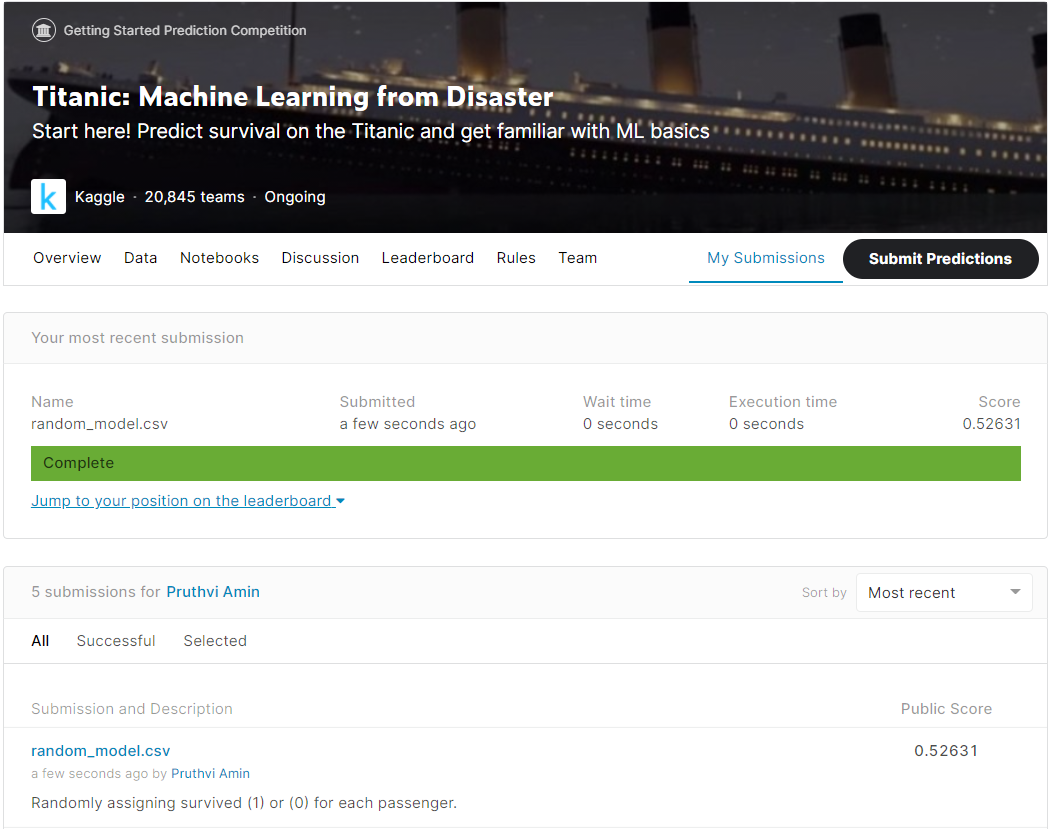

<font color='green'> With this approach, unsuprisingly we are right around 50% of the time only with both the training set and unseen test set via the kaggle submission. We know that only 38.3% of passenger survived, whilst 61.6% died. So the most likley outcome is that they died. If we predict died (0) for each passenger, we would be right 61.6% of the time of the train set. We get an accuracy score of 62.2% on the unseen test set via the kaggle submission. We need to beat this score. </font>

In [47]:
print(y.value_counts(normalize=True))
print(accuracy_score(y, np.zeros(shape=(891,))))
base_model = pd.DataFrame({'PassengerId': pass1,'Survived':np.zeros(shape=(418,)).astype(int)})
base_model.to_csv('models/base_model.csv', index=False)
display(base_model)

0    0.616162
1    0.383838
Name: Survived, dtype: float64
0.6161616161616161


PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         0
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

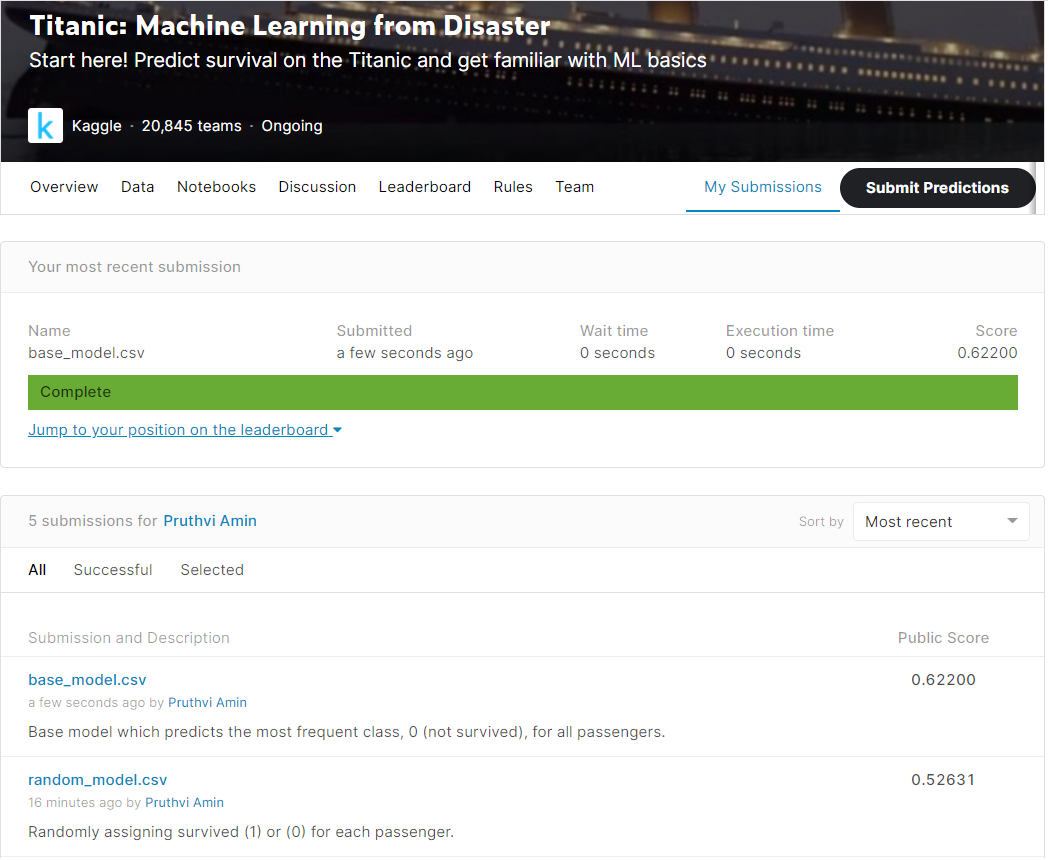

<font color='green'> Gender is a strong predictor of survival and females are much more likely to survive. We predict survived (1) for females and 0 (not survived) for males. By only using this one feature we get a signifact boost in accuracy. Our training accuracy jumps to 78.7% whlist the accuracy on the unseen kaggle test increases to 76.6! </font>

In [48]:
raw = pd.read_csv('data/train.csv')
gen = np.array(raw['Sex'] == 'female').astype(int)
accuracy_score(y, gen)

0.7867564534231201

In [49]:
gender_model = pd.DataFrame({'PassengerId':pass1, 'Survived':np.array(test['Sex'] == 'female').astype(int)})
gender_model.to_csv('models/gender_model.csv', index=False)
gender_model

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

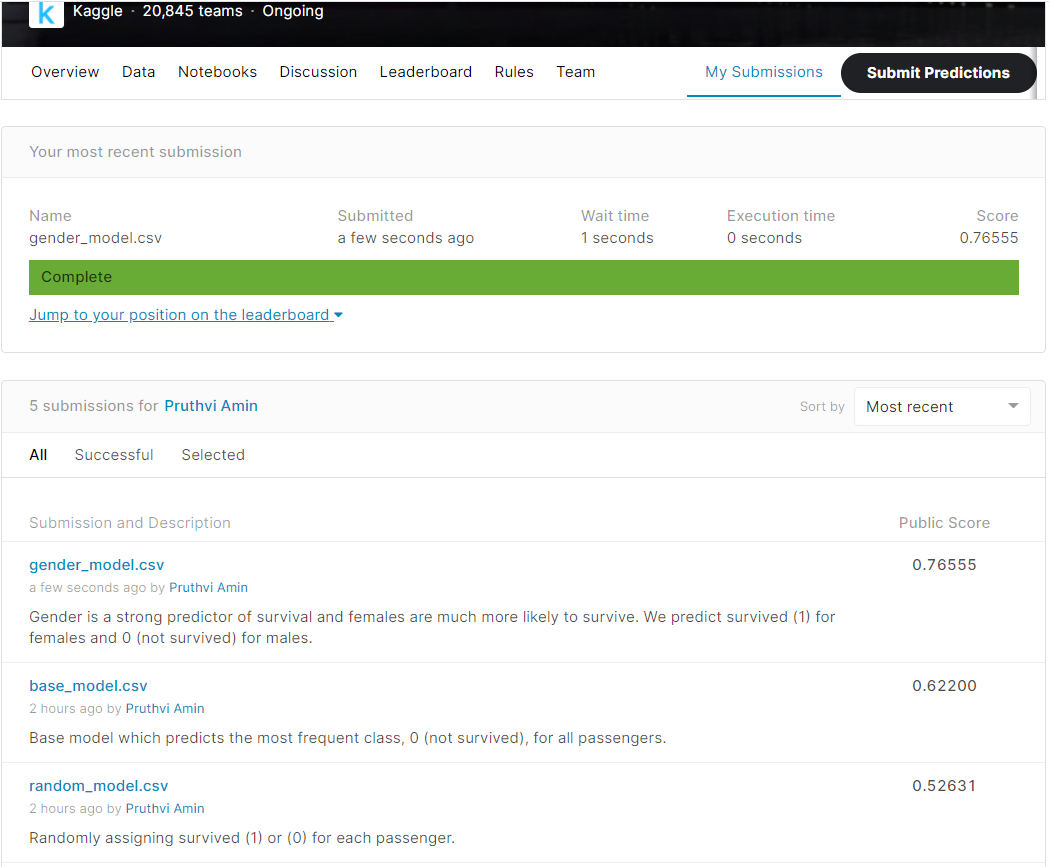

<font color='green'> Let's go one step further now and use all of our features to predict survival. We'll start with a simple logistic regression algorithm that i created myself. We get a significant boost once again, our training accuracy jumps to 84% whilst the accuracy on the unseen kaggle test increases to 76.6! </font>

In [62]:
import MySimpleLogReg
w = MySimpleLogReg.train(X=np.column_stack((np.ones(891), X_scaled)), Y=y.values.reshape(891,1), iterations=100000, lr=0.01)

Iteration    0 => Loss: 0.69314718055994528623
Iteration    1 => Loss: 0.68950801620710566731
Iteration    2 => Loss: 0.68593999958654150451
Iteration    3 => Loss: 0.68244156437286496164
Iteration    4 => Loss: 0.67901116883909551358
Iteration    5 => Loss: 0.67564729654307831286
Iteration    6 => Loss: 0.67234845691400935142
Iteration    7 => Loss: 0.66911318574386802194
Iteration    8 => Loss: 0.66594004558873132193
Iteration    9 => Loss: 0.66282762608504686153
Iteration   10 => Loss: 0.65977454418600611774
Iteration   11 => Loss: 0.65677944432316104351
Iteration   12 => Loss: 0.65384099849839671936
Iteration   13 => Loss: 0.65095790631129901715
Iteration   14 => Loss: 0.64812889492684921944
Iteration   15 => Loss: 0.64535271898824686509
Iteration   16 => Loss: 0.64262816047950854781
Iteration   17 => Loss: 0.63995402854231486778
Iteration   18 => Loss: 0.63732915925138633462
Iteration   19 => Loss: 0.63475241535248250191
Iteration   20 => Loss: 0.63222268596689878972
Iteration   2

Iteration  408 => Loss: 0.43739775586014512099
Iteration  409 => Loss: 0.43730972184645350298
Iteration  410 => Loss: 0.43722208783078847505
Iteration  411 => Loss: 0.43713485123913220498
Iteration  412 => Loss: 0.43704800951910666162
Iteration  413 => Loss: 0.43696156013974840615
Iteration  414 => Loss: 0.43687550059128632540
Iteration  415 => Loss: 0.43678982838492191876
Iteration  416 => Loss: 0.43670454105261224953
Iteration  417 => Loss: 0.43661963614685606050
Iteration  418 => Loss: 0.43653511124048172132
Iteration  419 => Loss: 0.43645096392643817351
Iteration  420 => Loss: 0.43636719181758898412
Iteration  421 => Loss: 0.43628379254650778707
Iteration  422 => Loss: 0.43620076376527733286
Iteration  423 => Loss: 0.43611810314529025900
Iteration  424 => Loss: 0.43603580837705246953
Iteration  425 => Loss: 0.43595387716998923455
Iteration  426 => Loss: 0.43587230725225306616
Iteration  427 => Loss: 0.43579109637053431436
Iteration  428 => Loss: 0.43571024228987409455
Iteration  42

Iteration  935 => Loss: 0.41685117895529144594
Iteration  936 => Loss: 0.41683479386380128950
Iteration  937 => Loss: 0.41681844713237425903
Iteration  938 => Loss: 0.41680213863719883793
Iteration  939 => Loss: 0.41678586825496988233
Iteration  940 => Loss: 0.41676963586288623409
Iteration  941 => Loss: 0.41675344133864811180
Iteration  942 => Loss: 0.41673728456045461277
Iteration  943 => Loss: 0.41672116540700093745
Iteration  944 => Loss: 0.41670508375747639107
Iteration  945 => Loss: 0.41668903949156149702
Iteration  946 => Loss: 0.41667303248942544336
Iteration  947 => Loss: 0.41665706263172447299
Iteration  948 => Loss: 0.41664112979959805338
Iteration  949 => Loss: 0.41662523387466771085
Iteration  950 => Loss: 0.41660937473903397743
Iteration  951 => Loss: 0.41659355227527428145
Iteration  952 => Loss: 0.41657776636644028301
Iteration  953 => Loss: 0.41656201689605570904
Iteration  954 => Loss: 0.41654630374811402183
Iteration  955 => Loss: 0.41653062680707597654
Iteration  95

Iteration 1470 => Loss: 0.41153459323587465724
Iteration 1471 => Loss: 0.41152866915286068217
Iteration 1472 => Loss: 0.41152275416326422608
Iteration 1473 => Loss: 0.41151684824627626780
Iteration 1474 => Loss: 0.41151095138114618388
Iteration 1475 => Loss: 0.41150506354718041635
Iteration 1476 => Loss: 0.41149918472374308331
Iteration 1477 => Loss: 0.41149331489025531283
Iteration 1478 => Loss: 0.41148745402619540945
Iteration 1479 => Loss: 0.41148160211109846562
Iteration 1480 => Loss: 0.41147575912455613967
Iteration 1481 => Loss: 0.41146992504621676678
Iteration 1482 => Loss: 0.41146409985578458191
Iteration 1483 => Loss: 0.41145828353302010827
Iteration 1484 => Loss: 0.41145247605774010191
Iteration 1485 => Loss: 0.41144667740981633042
Iteration 1486 => Loss: 0.41144088756917673866
Iteration 1487 => Loss: 0.41143510651580433857
Iteration 1488 => Loss: 0.41142933422973704261
Iteration 1489 => Loss: 0.41142357069106849643
Iteration 1490 => Loss: 0.41141781587994635805
Iteration 149

Iteration 2011 => Loss: 0.40926216897024414454
Iteration 2012 => Loss: 0.40925916818842184020
Iteration 2013 => Loss: 0.40925617043148254659
Iteration 2014 => Loss: 0.40925317569395902595
Iteration 2015 => Loss: 0.40925018397039580886
Iteration 2016 => Loss: 0.40924719525534974940
Iteration 2017 => Loss: 0.40924420954338991407
Iteration 2018 => Loss: 0.40924122682909719328
Iteration 2019 => Loss: 0.40923824710706474539
Iteration 2020 => Loss: 0.40923527037189744160
Iteration 2021 => Loss: 0.40923229661821242109
Iteration 2022 => Loss: 0.40922932584063875794
Iteration 2023 => Loss: 0.40922635803381729458
Iteration 2024 => Loss: 0.40922339319240064182
Iteration 2025 => Loss: 0.40922043131105373392
Iteration 2026 => Loss: 0.40921747238445277395
Iteration 2027 => Loss: 0.40921451640728606636
Iteration 2028 => Loss: 0.40921156337425373950
Iteration 2029 => Loss: 0.40920861328006746804
Iteration 2030 => Loss: 0.40920566611945075053
Iteration 2031 => Loss: 0.40920272188713863182
Iteration 203

Iteration 2549 => Loss: 0.40797651725396882894
Iteration 2550 => Loss: 0.40797458670268443859
Iteration 2551 => Loss: 0.40797265742124855237
Iteration 2552 => Loss: 0.40797072940785789052
Iteration 2553 => Loss: 0.40796880266071272603
Iteration 2554 => Loss: 0.40796687717801694006
Iteration 2555 => Loss: 0.40796495295797757796
Iteration 2556 => Loss: 0.40796302999880529327
Iteration 2557 => Loss: 0.40796110829871412573
Iteration 2558 => Loss: 0.40795918785592150124
Iteration 2559 => Loss: 0.40795726866864828741
Iteration 2560 => Loss: 0.40795535073511884905
Iteration 2561 => Loss: 0.40795343405356054856
Iteration 2562 => Loss: 0.40795151862220474515
Iteration 2563 => Loss: 0.40794960443928557359
Iteration 2564 => Loss: 0.40794769150304099892
Iteration 2565 => Loss: 0.40794577981171203929
Iteration 2566 => Loss: 0.40794386936354337658
Iteration 2567 => Loss: 0.40794196015678263478
Iteration 2568 => Loss: 0.40794005218968126814
Iteration 2569 => Loss: 0.40793814546049356196
Iteration 257

Iteration 3085 => Loss: 0.40708730578488377949
Iteration 3086 => Loss: 0.40708586525864959293
Iteration 3087 => Loss: 0.40708442538726280491
Iteration 3088 => Loss: 0.40708298617003335629
Iteration 3089 => Loss: 0.40708154760627229818
Iteration 3090 => Loss: 0.40708010969529195844
Iteration 3091 => Loss: 0.40707867243640577515
Iteration 3092 => Loss: 0.40707723582892829661
Iteration 3093 => Loss: 0.40707579987217512585
Iteration 3094 => Loss: 0.40707436456546325365
Iteration 3095 => Loss: 0.40707292990811067002
Iteration 3096 => Loss: 0.40707149589943625312
Iteration 3097 => Loss: 0.40707006253876049096
Iteration 3098 => Loss: 0.40706862982540470419
Iteration 3099 => Loss: 0.40706719775869137923
Iteration 3100 => Loss: 0.40706576633794416820
Iteration 3101 => Loss: 0.40706433556248783345
Iteration 3102 => Loss: 0.40706290543164824758
Iteration 3103 => Loss: 0.40706147594475239337
Iteration 3104 => Loss: 0.40706004710112841938
Iteration 3105 => Loss: 0.40705861890010558435
Iteration 310

Iteration 3506 => Loss: 0.40653149441243324747
Iteration 3507 => Loss: 0.40653028033678462183
Iteration 3508 => Loss: 0.40652906670473959450
Iteration 3509 => Loss: 0.40652785351594183938
Iteration 3510 => Loss: 0.40652664077003575205
Iteration 3511 => Loss: 0.40652542846666600562
Iteration 3512 => Loss: 0.40652421660547793936
Iteration 3513 => Loss: 0.40652300518611722557
Iteration 3514 => Loss: 0.40652179420823042477
Iteration 3515 => Loss: 0.40652058367146415296
Iteration 3516 => Loss: 0.40651937357546591434
Iteration 3517 => Loss: 0.40651816391988360166
Iteration 3518 => Loss: 0.40651695470436555180
Iteration 3519 => Loss: 0.40651574592856065671
Iteration 3520 => Loss: 0.40651453759211830796
Iteration 3521 => Loss: 0.40651332969468867429
Iteration 3522 => Loss: 0.40651212223592181338
Iteration 3523 => Loss: 0.40651091521546894869
Iteration 3524 => Loss: 0.40650970863298152569
Iteration 3525 => Loss: 0.40650850248811137844
Iteration 3526 => Loss: 0.40650729678051117366
Iteration 352

Iteration 3951 => Loss: 0.40603058187364804432
Iteration 3952 => Loss: 0.40602953633143490375
Iteration 3953 => Loss: 0.40602849111462735454
Iteration 3954 => Loss: 0.40602744622303027500
Iteration 3955 => Loss: 0.40602640165644854342
Iteration 3956 => Loss: 0.40602535741468726016
Iteration 3957 => Loss: 0.40602431349755213619
Iteration 3958 => Loss: 0.40602326990484860492
Iteration 3959 => Loss: 0.40602222663638282141
Iteration 3960 => Loss: 0.40602118369196071868
Iteration 3961 => Loss: 0.40602014107138889587
Iteration 3962 => Loss: 0.40601909877447389663
Iteration 3963 => Loss: 0.40601805680102259766
Iteration 3964 => Loss: 0.40601701515084215321
Iteration 3965 => Loss: 0.40601597382373988410
Iteration 3966 => Loss: 0.40601493281952344416
Iteration 3967 => Loss: 0.40601389213800054279
Iteration 3968 => Loss: 0.40601285177897927792
Iteration 3969 => Loss: 0.40601181174226802506
Iteration 3970 => Loss: 0.40601077202767515972
Iteration 3971 => Loss: 0.40600973263500955701
Iteration 397

Iteration 4452 => Loss: 0.40554398736757230060
Iteration 4453 => Loss: 0.40554308452119036676
Iteration 4454 => Loss: 0.40554218192569418955
Iteration 4455 => Loss: 0.40554127958097097029
Iteration 4456 => Loss: 0.40554037748690785481
Iteration 4457 => Loss: 0.40553947564339193343
Iteration 4458 => Loss: 0.40553857405031068506
Iteration 4459 => Loss: 0.40553767270755158858
Iteration 4460 => Loss: 0.40553677161500223391
Iteration 4461 => Loss: 0.40553587077255015547
Iteration 4462 => Loss: 0.40553497018008333175
Iteration 4463 => Loss: 0.40553406983748957471
Iteration 4464 => Loss: 0.40553316974465686284
Iteration 4465 => Loss: 0.40553226990147345221
Iteration 4466 => Loss: 0.40553137030782737682
Iteration 4467 => Loss: 0.40553047096360700374
Iteration 4468 => Loss: 0.40552957186870086659
Iteration 4469 => Loss: 0.40552867302299733243
Iteration 4470 => Loss: 0.40552777442638521244
Iteration 4471 => Loss: 0.40552687607875309572
Iteration 4472 => Loss: 0.40552597797999001550
Iteration 447

Iteration 4898 => Loss: 0.40516471013572413762
Iteration 4899 => Loss: 0.40516390932909857048
Iteration 4900 => Loss: 0.40516310873168043249
Iteration 4901 => Loss: 0.40516230834339223010
Iteration 4902 => Loss: 0.40516150816415630320
Iteration 4903 => Loss: 0.40516070819389526925
Iteration 4904 => Loss: 0.40515990843253169018
Iteration 4905 => Loss: 0.40515910887998812795
Iteration 4906 => Loss: 0.40515830953618736654
Iteration 4907 => Loss: 0.40515751040105218994
Iteration 4908 => Loss: 0.40515671147450527112
Iteration 4909 => Loss: 0.40515591275646939406
Iteration 4910 => Loss: 0.40515511424686767583
Iteration 4911 => Loss: 0.40515431594562295592
Iteration 4912 => Loss: 0.40515351785265835138
Iteration 4913 => Loss: 0.40515271996789692377
Iteration 4914 => Loss: 0.40515192229126179013
Iteration 4915 => Loss: 0.40515112482267606753
Iteration 4916 => Loss: 0.40515032756206303954
Iteration 4917 => Loss: 0.40514953050934610079
Iteration 4918 => Loss: 0.40514873366444859037
Iteration 491

Iteration 5354 => Loss: 0.40482011786670529796
Iteration 5355 => Loss: 0.40481940518718528832
Iteration 5356 => Loss: 0.40481869268640641168
Iteration 5357 => Loss: 0.40481798036431093646
Iteration 5358 => Loss: 0.40481726822084113104
Iteration 5359 => Loss: 0.40481655625593909731
Iteration 5360 => Loss: 0.40481584446954704815
Iteration 5361 => Loss: 0.40481513286160752951
Iteration 5362 => Loss: 0.40481442143206269879
Iteration 5363 => Loss: 0.40481371018085493541
Iteration 5364 => Loss: 0.40481299910792661878
Iteration 5365 => Loss: 0.40481228821322029487
Iteration 5366 => Loss: 0.40481157749667828760
Iteration 5367 => Loss: 0.40481086695824325394
Iteration 5368 => Loss: 0.40481015659785762884
Iteration 5369 => Loss: 0.40480944641546401375
Iteration 5370 => Loss: 0.40480873641100484361
Iteration 5371 => Loss: 0.40480802658442299746
Iteration 5372 => Loss: 0.40480731693566096574
Iteration 5373 => Loss: 0.40480660746466140543
Iteration 5374 => Loss: 0.40480589817136719555
Iteration 537

Iteration 5847 => Loss: 0.40448936794675516282
Iteration 5848 => Loss: 0.40448873694335846229
Iteration 5849 => Loss: 0.40448810609353980094
Iteration 5850 => Loss: 0.40448747539725382616
Iteration 5851 => Loss: 0.40448684485445535186
Iteration 5852 => Loss: 0.40448621446509908095
Iteration 5853 => Loss: 0.40448558422913993837
Iteration 5854 => Loss: 0.40448495414653262703
Iteration 5855 => Loss: 0.40448432421723201635
Iteration 5856 => Loss: 0.40448369444119292027
Iteration 5857 => Loss: 0.40448306481837037474
Iteration 5858 => Loss: 0.40448243534871913818
Iteration 5859 => Loss: 0.40448180603219419105
Iteration 5860 => Loss: 0.40448117686875034726
Iteration 5861 => Loss: 0.40448054785834280933
Iteration 5862 => Loss: 0.40447991900092633566
Iteration 5863 => Loss: 0.40447929029645601773
Iteration 5864 => Loss: 0.40447866174488683599
Iteration 5865 => Loss: 0.40447803334617388193
Iteration 5866 => Loss: 0.40447740510027213601
Iteration 5867 => Loss: 0.40447677700713674520
Iteration 586

Iteration 6344 => Loss: 0.40419381433956885763
Iteration 6345 => Loss: 0.40419325445232551219
Iteration 6346 => Loss: 0.40419269469831808905
Iteration 6347 => Loss: 0.40419213507750945125
Iteration 6348 => Loss: 0.40419157558986246181
Iteration 6349 => Loss: 0.40419101623533992829
Iteration 6350 => Loss: 0.40419045701390504677
Iteration 6351 => Loss: 0.40418989792552068030
Iteration 6352 => Loss: 0.40418933897014974743
Iteration 6353 => Loss: 0.40418878014775516672
Iteration 6354 => Loss: 0.40418822145830002324
Iteration 6355 => Loss: 0.40418766290174740208
Iteration 6356 => Loss: 0.40418710447806005526
Iteration 6357 => Loss: 0.40418654618720128990
Iteration 6358 => Loss: 0.40418598802913396906
Iteration 6359 => Loss: 0.40418543000382123331
Iteration 6360 => Loss: 0.40418487211122616776
Iteration 6361 => Loss: 0.40418431435131185747
Iteration 6362 => Loss: 0.40418375672404133203
Iteration 6363 => Loss: 0.40418319922937778754
Iteration 6364 => Loss: 0.40418264186728425358
Iteration 636

Iteration 6878 => Loss: 0.40391290170772914392
Iteration 6879 => Loss: 0.40391240800400757260
Iteration 6880 => Loss: 0.40391191441544405105
Iteration 6881 => Loss: 0.40391142094200782608
Iteration 6882 => Loss: 0.40391092758366792248
Iteration 6883 => Loss: 0.40391043434039336502
Iteration 6884 => Loss: 0.40390994121215328949
Iteration 6885 => Loss: 0.40390944819891688722
Iteration 6886 => Loss: 0.40390895530065329400
Iteration 6887 => Loss: 0.40390846251733164562
Iteration 6888 => Loss: 0.40390796984892107790
Iteration 6889 => Loss: 0.40390747729539078215
Iteration 6890 => Loss: 0.40390698485670989415
Iteration 6891 => Loss: 0.40390649253284760523
Iteration 6892 => Loss: 0.40390600032377316220
Iteration 6893 => Loss: 0.40390550822945575637
Iteration 6894 => Loss: 0.40390501624986452356
Iteration 6895 => Loss: 0.40390452438496887710
Iteration 6896 => Loss: 0.40390403263473784179
Iteration 6897 => Loss: 0.40390354099914083097
Iteration 6898 => Loss: 0.40390304947814686942
Iteration 689

Iteration 7409 => Loss: 0.40366621347122177976
Iteration 7410 => Loss: 0.40366577679854337424
Iteration 7411 => Loss: 0.40366534022589778408
Iteration 7412 => Loss: 0.40366490375325891904
Iteration 7413 => Loss: 0.40366446738060052235
Iteration 7414 => Loss: 0.40366403110789644826
Iteration 7415 => Loss: 0.40366359493512021794
Iteration 7416 => Loss: 0.40366315886224590770
Iteration 7417 => Loss: 0.40366272288924726075
Iteration 7418 => Loss: 0.40366228701609807583
Iteration 7419 => Loss: 0.40366185124277209617
Iteration 7420 => Loss: 0.40366141556924328704
Iteration 7421 => Loss: 0.40366097999548533615
Iteration 7422 => Loss: 0.40366054452147220877
Iteration 7423 => Loss: 0.40366010914717764813
Iteration 7424 => Loss: 0.40365967387257556398
Iteration 7425 => Loss: 0.40365923869763981058
Iteration 7426 => Loss: 0.40365880362234440870
Iteration 7427 => Loss: 0.40365836864666299055
Iteration 7428 => Loss: 0.40365793377056963243
Iteration 7429 => Loss: 0.40365749899403813306
Iteration 743

Iteration 7957 => Loss: 0.40344122183278818827
Iteration 7958 => Loss: 0.40344083624866161619
Iteration 7959 => Loss: 0.40344045075128520672
Iteration 7960 => Loss: 0.40344006534063664438
Iteration 7961 => Loss: 0.40343968001669355816
Iteration 7962 => Loss: 0.40343929477943357709
Iteration 7963 => Loss: 0.40343890962883449669
Iteration 7964 => Loss: 0.40343852456487372393
Iteration 7965 => Loss: 0.40343813958752899884
Iteration 7966 => Loss: 0.40343775469677811696
Iteration 7967 => Loss: 0.40343736989259859627
Iteration 7968 => Loss: 0.40343698517496823230
Iteration 7969 => Loss: 0.40343660054386465408
Iteration 7970 => Loss: 0.40343621599926565713
Iteration 7971 => Loss: 0.40343583154114887046
Iteration 7972 => Loss: 0.40343544716949192308
Iteration 7973 => Loss: 0.40343506288427272155
Iteration 7974 => Loss: 0.40343467868546872834
Iteration 7975 => Loss: 0.40343429457305790553
Iteration 7976 => Loss: 0.40343391054701788212
Iteration 7977 => Loss: 0.40343352660732639814
Iteration 797

Iteration 8487 => Loss: 0.40324849143652163885
Iteration 8488 => Loss: 0.40324814884473314525
Iteration 8489 => Loss: 0.40324780632868190144
Iteration 8490 => Loss: 0.40324746388834864508
Iteration 8491 => Loss: 0.40324712152371416929
Iteration 8492 => Loss: 0.40324677923475915620
Iteration 8493 => Loss: 0.40324643702146434343
Iteration 8494 => Loss: 0.40324609488381041311
Iteration 8495 => Loss: 0.40324575282177815838
Iteration 8496 => Loss: 0.40324541083534842789
Iteration 8497 => Loss: 0.40324506892450190376
Iteration 8498 => Loss: 0.40324472708921926811
Iteration 8499 => Loss: 0.40324438532948153613
Iteration 8500 => Loss: 0.40324404364526922340
Iteration 8501 => Loss: 0.40324370203656323408
Iteration 8502 => Loss: 0.40324336050334441683
Iteration 8503 => Loss: 0.40324301904559334275
Iteration 8504 => Loss: 0.40324267766329119356
Iteration 8505 => Loss: 0.40324233635641837381
Iteration 8506 => Loss: 0.40324199512495595421
Iteration 8507 => Loss: 0.40324165396888461688
Iteration 850

Iteration 9028 => Loss: 0.40307372460396062586
Iteration 9029 => Loss: 0.40307342030499493379
Iteration 9030 => Loss: 0.40307311607207690907
Iteration 9031 => Loss: 0.40307281190519000935
Iteration 9032 => Loss: 0.40307250780431758130
Iteration 9033 => Loss: 0.40307220376944302709
Iteration 9034 => Loss: 0.40307189980054980438
Iteration 9035 => Loss: 0.40307159589762120433
Iteration 9036 => Loss: 0.40307129206064079563
Iteration 9037 => Loss: 0.40307098828959181391
Iteration 9038 => Loss: 0.40307068458445788339
Iteration 9039 => Loss: 0.40307038094522218419
Iteration 9040 => Loss: 0.40307007737186834051
Iteration 9041 => Loss: 0.40306977386437964350
Iteration 9042 => Loss: 0.40306947042273966186
Iteration 9043 => Loss: 0.40306916704693168674
Iteration 9044 => Loss: 0.40306886373693934233
Iteration 9045 => Loss: 0.40306856049274586429
Iteration 9046 => Loss: 0.40306825731433482130
Iteration 9047 => Loss: 0.40306795420168967103
Iteration 9048 => Loss: 0.40306765115479387118
Iteration 904

Iteration 9561 => Loss: 0.40292049500052162792
Iteration 9562 => Loss: 0.40292022365851920540
Iteration 9563 => Loss: 0.40291995237431749155
Iteration 9564 => Loss: 0.40291968114790210898
Iteration 9565 => Loss: 0.40291940997925856927
Iteration 9566 => Loss: 0.40291913886837266157
Iteration 9567 => Loss: 0.40291886781522978644
Iteration 9568 => Loss: 0.40291859681981578856
Iteration 9569 => Loss: 0.40291832588211612398
Iteration 9570 => Loss: 0.40291805500211663738
Iteration 9571 => Loss: 0.40291778417980284033
Iteration 9572 => Loss: 0.40291751341516035545
Iteration 9573 => Loss: 0.40291724270817491638
Iteration 9574 => Loss: 0.40291697205883209021
Iteration 9575 => Loss: 0.40291670146711761058
Iteration 9576 => Loss: 0.40291643093301710010
Iteration 9577 => Loss: 0.40291616045651623690
Iteration 9578 => Loss: 0.40291589003760064358
Iteration 9579 => Loss: 0.40291561967625599827
Iteration 9580 => Loss: 0.40291534937246803461
Iteration 9581 => Loss: 0.40291507912622243071
Iteration 958

Iteration 10102 => Loss: 0.40278177761978051219
Iteration 10103 => Loss: 0.40278153554424978022
Iteration 10104 => Loss: 0.40278129351927355328
Iteration 10105 => Loss: 0.40278105154483917483
Iteration 10106 => Loss: 0.40278080962093426587
Iteration 10107 => Loss: 0.40278056774754644742
Iteration 10108 => Loss: 0.40278032592466322948
Iteration 10109 => Loss: 0.40278008415227206651
Iteration 10110 => Loss: 0.40277984243036069056
Iteration 10111 => Loss: 0.40277960075891655611
Iteration 10112 => Loss: 0.40277935913792728417
Iteration 10113 => Loss: 0.40277911756738044025
Iteration 10114 => Loss: 0.40277887604726364534
Iteration 10115 => Loss: 0.40277863457756446497
Iteration 10116 => Loss: 0.40277839315827040911
Iteration 10117 => Loss: 0.40277815178936915430
Iteration 10118 => Loss: 0.40277791047084821052
Iteration 10119 => Loss: 0.40277766920269530981
Iteration 10120 => Loss: 0.40277742798489790665
Iteration 10121 => Loss: 0.40277718681744373308
Iteration 10122 => Loss: 0.4027769457003

Iteration 10638 => Loss: 0.40265896679525131630
Iteration 10639 => Loss: 0.40265875011310986453
Iteration 10640 => Loss: 0.40265853347530067285
Iteration 10641 => Loss: 0.40265831688181319414
Iteration 10642 => Loss: 0.40265810033263643719
Iteration 10643 => Loss: 0.40265788382775963283
Iteration 10644 => Loss: 0.40265766736717206742
Iteration 10645 => Loss: 0.40265745095086286076
Iteration 10646 => Loss: 0.40265723457882129921
Iteration 10647 => Loss: 0.40265701825103655809
Iteration 10648 => Loss: 0.40265680196749781272
Iteration 10649 => Loss: 0.40265658572819429395
Iteration 10650 => Loss: 0.40265636953311534363
Iteration 10651 => Loss: 0.40265615338225008157
Iteration 10652 => Loss: 0.40265593727558762760
Iteration 10653 => Loss: 0.40265572121311737908
Iteration 10654 => Loss: 0.40265550519482851133
Iteration 10655 => Loss: 0.40265528922071019968
Iteration 10656 => Loss: 0.40265507329075184151
Iteration 10657 => Loss: 0.40265485740494250111
Iteration 10658 => Loss: 0.4026546415632

Iteration 11103 => Loss: 0.40256281761096729399
Iteration 11104 => Loss: 0.40256262042359874931
Iteration 11105 => Loss: 0.40256242327583219298
Iteration 11106 => Loss: 0.40256222616765807709
Iteration 11107 => Loss: 0.40256202909906679821
Iteration 11108 => Loss: 0.40256183207004880842
Iteration 11109 => Loss: 0.40256163508059461531
Iteration 11110 => Loss: 0.40256143813069455994
Iteration 11111 => Loss: 0.40256124122033920543
Iteration 11112 => Loss: 0.40256104434951894833
Iteration 11113 => Loss: 0.40256084751822418522
Iteration 11114 => Loss: 0.40256065072644536817
Iteration 11115 => Loss: 0.40256045397417311582
Iteration 11116 => Loss: 0.40256025726139765819
Iteration 11117 => Loss: 0.40256006058810972492
Iteration 11118 => Loss: 0.40255986395429960156
Iteration 11119 => Loss: 0.40255966735995768468
Iteration 11120 => Loss: 0.40255947080507459290
Iteration 11121 => Loss: 0.40255927428964077830
Iteration 11122 => Loss: 0.40255907781364663744
Iteration 11123 => Loss: 0.4025588813770

Iteration 11557 => Loss: 0.40247722292013121681
Iteration 11558 => Loss: 0.40247704276599088891
Iteration 11559 => Loss: 0.40247686264735638151
Iteration 11560 => Loss: 0.40247668256421925692
Iteration 11561 => Loss: 0.40247650251657096643
Iteration 11562 => Loss: 0.40247632250440307233
Iteration 11563 => Loss: 0.40247614252770697041
Iteration 11564 => Loss: 0.40247596258647427847
Iteration 11565 => Loss: 0.40247578268069639229
Iteration 11566 => Loss: 0.40247560281036498520
Iteration 11567 => Loss: 0.40247542297547145296
Iteration 11568 => Loss: 0.40247524317600735788
Iteration 11569 => Loss: 0.40247506341196415125
Iteration 11570 => Loss: 0.40247488368333345088
Iteration 11571 => Loss: 0.40247470399010670805
Iteration 11572 => Loss: 0.40247452433227554058
Iteration 11573 => Loss: 0.40247434470983128874
Iteration 11574 => Loss: 0.40247416512276579237
Iteration 11575 => Loss: 0.40247398557107033623
Iteration 11576 => Loss: 0.40247380605473648263
Iteration 11577 => Loss: 0.4024736265737

Iteration 12064 => Loss: 0.40239026144532269447
Iteration 12065 => Loss: 0.40239009824834742757
Iteration 12066 => Loss: 0.40238993508283865674
Iteration 12067 => Loss: 0.40238977194878877697
Iteration 12068 => Loss: 0.40238960884619057179
Iteration 12069 => Loss: 0.40238944577503632516
Iteration 12070 => Loss: 0.40238928273531882063
Iteration 12071 => Loss: 0.40238911972703034214
Iteration 12072 => Loss: 0.40238895675016367326
Iteration 12073 => Loss: 0.40238879380471126446
Iteration 12074 => Loss: 0.40238863089066573275
Iteration 12075 => Loss: 0.40238846800801952863
Iteration 12076 => Loss: 0.40238830515676532462
Iteration 12077 => Loss: 0.40238814233689568223
Iteration 12078 => Loss: 0.40238797954840305193
Iteration 12079 => Loss: 0.40238781679128016178
Iteration 12080 => Loss: 0.40238765406551935122
Iteration 12081 => Loss: 0.40238749137111340382
Iteration 12082 => Loss: 0.40238732870805488107
Iteration 12083 => Loss: 0.40238716607633623346
Iteration 12084 => Loss: 0.4023870034759

Iteration 12551 => Loss: 0.40231436994522362660
Iteration 12552 => Loss: 0.40231422122542648268
Iteration 12553 => Loss: 0.40231407253368145494
Iteration 12554 => Loss: 0.40231392386998182653
Iteration 12555 => Loss: 0.40231377523432110266
Iteration 12556 => Loss: 0.40231362662669262198
Iteration 12557 => Loss: 0.40231347804708983418
Iteration 12558 => Loss: 0.40231332949550624445
Iteration 12559 => Loss: 0.40231318097193513594
Iteration 12560 => Loss: 0.40231303247637006937
Iteration 12561 => Loss: 0.40231288400880438338
Iteration 12562 => Loss: 0.40231273556923152768
Iteration 12563 => Loss: 0.40231258715764500744
Iteration 12564 => Loss: 0.40231243877403816134
Iteration 12565 => Loss: 0.40231229041840443905
Iteration 12566 => Loss: 0.40231214209073729027
Iteration 12567 => Loss: 0.40231199379103016467
Iteration 12568 => Loss: 0.40231184551927662296
Iteration 12569 => Loss: 0.40231169727546983728
Iteration 12570 => Loss: 0.40231154905960342383
Iteration 12571 => Loss: 0.4023114008716

Iteration 13066 => Loss: 0.40224134782273607280
Iteration 13067 => Loss: 0.40224121271519103216
Iteration 13068 => Loss: 0.40224107763252031633
Iteration 13069 => Loss: 0.40224094257471793012
Iteration 13070 => Loss: 0.40224080754177810038
Iteration 13071 => Loss: 0.40224067253369527597
Iteration 13072 => Loss: 0.40224053755046346170
Iteration 13073 => Loss: 0.40224040259207693992
Iteration 13074 => Loss: 0.40224026765852999299
Iteration 13075 => Loss: 0.40224013274981684773
Iteration 13076 => Loss: 0.40223999786593167549
Iteration 13077 => Loss: 0.40223986300686886963
Iteration 13078 => Loss: 0.40223972817262254598
Iteration 13079 => Loss: 0.40223959336318687585
Iteration 13080 => Loss: 0.40223945857855630814
Iteration 13081 => Loss: 0.40223932381872484765
Iteration 13082 => Loss: 0.40223918908368694325
Iteration 13083 => Loss: 0.40223905437343665525
Iteration 13084 => Loss: 0.40223891968796837704
Iteration 13085 => Loss: 0.40223878502727627993
Iteration 13086 => Loss: 0.4022386503913

Iteration 13561 => Loss: 0.40217739830448162586
Iteration 13562 => Loss: 0.40217727483192183824
Iteration 13563 => Loss: 0.40217715138154841448
Iteration 13564 => Loss: 0.40217702795335613652
Iteration 13565 => Loss: 0.40217690454733995287
Iteration 13566 => Loss: 0.40217678116349470097
Iteration 13567 => Loss: 0.40217665780181532931
Iteration 13568 => Loss: 0.40217653446229689740
Iteration 13569 => Loss: 0.40217641114493407617
Iteration 13570 => Loss: 0.40217628784972192513
Iteration 13571 => Loss: 0.40217616457665528173
Iteration 13572 => Loss: 0.40217604132572909448
Iteration 13573 => Loss: 0.40217591809693831184
Iteration 13574 => Loss: 0.40217579489027771578
Iteration 13575 => Loss: 0.40217567170574236579
Iteration 13576 => Loss: 0.40217554854332721037
Iteration 13577 => Loss: 0.40217542540302692045
Iteration 13578 => Loss: 0.40217530228483666654
Iteration 13579 => Loss: 0.40217517918875128613
Iteration 13580 => Loss: 0.40217505611476556115
Iteration 13581 => Loss: 0.4021749330628

Iteration 14076 => Loss: 0.40211663462123198309
Iteration 14077 => Loss: 0.40211652192781716098
Iteration 14078 => Loss: 0.40211640925412472924
Iteration 14079 => Loss: 0.40211629660015046905
Iteration 14080 => Loss: 0.40211618396588977298
Iteration 14081 => Loss: 0.40211607135133808910
Iteration 14082 => Loss: 0.40211595875649108756
Iteration 14083 => Loss: 0.40211584618134410540
Iteration 14084 => Loss: 0.40211573362589286829
Iteration 14085 => Loss: 0.40211562109013276878
Iteration 14086 => Loss: 0.40211550857405942150
Iteration 14087 => Loss: 0.40211539607766827453
Iteration 14088 => Loss: 0.40211528360095477597
Iteration 14089 => Loss: 0.40211517114391459593
Iteration 14090 => Loss: 0.40211505870654334904
Iteration 14091 => Loss: 0.40211494628883626135
Iteration 14092 => Loss: 0.40211483389078911399
Iteration 14093 => Loss: 0.40211472151239741057
Iteration 14094 => Loss: 0.40211460915365665469
Iteration 14095 => Loss: 0.40211449681456229444
Iteration 14096 => Loss: 0.4021143844951

Iteration 14492 => Loss: 0.40207140455464934758
Iteration 14493 => Loss: 0.40207129969180266382
Iteration 14494 => Loss: 0.40207119484690656552
Iteration 14495 => Loss: 0.40207109001995711139
Iteration 14496 => Loss: 0.40207098521095019361
Iteration 14497 => Loss: 0.40207088041988181537
Iteration 14498 => Loss: 0.40207077564674786885
Iteration 14499 => Loss: 0.40207067089154441275
Iteration 14500 => Loss: 0.40207056615426733925
Iteration 14501 => Loss: 0.40207046143491259604
Iteration 14502 => Loss: 0.40207035673347618632
Iteration 14503 => Loss: 0.40207025204995416878
Iteration 14504 => Loss: 0.40207014738434226908
Iteration 14505 => Loss: 0.40207004273663665694
Iteration 14506 => Loss: 0.40206993810683316903
Iteration 14507 => Loss: 0.40206983349492797508
Iteration 14508 => Loss: 0.40206972890091685624
Iteration 14509 => Loss: 0.40206962432479576020
Iteration 14510 => Loss: 0.40206951976656080117
Iteration 14511 => Loss: 0.40206941522620792684
Iteration 14512 => Loss: 0.4020693107037

Iteration 15018 => Loss: 0.40201863079110555788
Iteration 15019 => Loss: 0.40201853483534044642
Iteration 15020 => Loss: 0.40201843889553123823
Iteration 15021 => Loss: 0.40201834297167432508
Iteration 15022 => Loss: 0.40201824706376604324
Iteration 15023 => Loss: 0.40201815117180311754
Iteration 15024 => Loss: 0.40201805529578166221
Iteration 15025 => Loss: 0.40201795943569834657
Iteration 15026 => Loss: 0.40201786359154950690
Iteration 15027 => Loss: 0.40201776776333164598
Iteration 15028 => Loss: 0.40201767195104132213
Iteration 15029 => Loss: 0.40201757615467476059
Iteration 15030 => Loss: 0.40201748037422863069
Iteration 15031 => Loss: 0.40201738460969926869
Iteration 15032 => Loss: 0.40201728886108317740
Iteration 15033 => Loss: 0.40201719312837680409
Iteration 15034 => Loss: 0.40201709741157659606
Iteration 15035 => Loss: 0.40201700171067911160
Iteration 15036 => Loss: 0.40201690602568057598
Iteration 15037 => Loss: 0.40201681035657776953
Iteration 15038 => Loss: 0.4020167147033

Iteration 15539 => Loss: 0.40197071854385685308
Iteration 15540 => Loss: 0.40197063043963748852
Iteration 15541 => Loss: 0.40197054234963608410
Iteration 15542 => Loss: 0.40197045427384936467
Iteration 15543 => Loss: 0.40197036621227444364
Iteration 15544 => Loss: 0.40197027816490810137
Iteration 15545 => Loss: 0.40197019013174722923
Iteration 15546 => Loss: 0.40197010211278855207
Iteration 15547 => Loss: 0.40197001410802907229
Iteration 15548 => Loss: 0.40196992611746568125
Iteration 15549 => Loss: 0.40196983814109527033
Iteration 15550 => Loss: 0.40196975017891467541
Iteration 15551 => Loss: 0.40196966223092084336
Iteration 15552 => Loss: 0.40196957429711044352
Iteration 15553 => Loss: 0.40196948637748053379
Iteration 15554 => Loss: 0.40196939847202800555
Iteration 15555 => Loss: 0.40196931058074975018
Iteration 15556 => Loss: 0.40196922270364249252
Iteration 15557 => Loss: 0.40196913484070323497
Iteration 15558 => Loss: 0.40196904699192886889
Iteration 15559 => Loss: 0.4019689591573

Iteration 16043 => Loss: 0.40192805184797630869
Iteration 16044 => Loss: 0.40192797052871581664
Iteration 16045 => Loss: 0.40192788922218908310
Iteration 16046 => Loss: 0.40192780792839327697
Iteration 16047 => Loss: 0.40192772664732562271
Iteration 16048 => Loss: 0.40192764537898345578
Iteration 16049 => Loss: 0.40192756412336383409
Iteration 16050 => Loss: 0.40192748288046414862
Iteration 16051 => Loss: 0.40192740165028151278
Iteration 16052 => Loss: 0.40192732043281331755
Iteration 16053 => Loss: 0.40192723922805662085
Iteration 16054 => Loss: 0.40192715803600881364
Iteration 16055 => Loss: 0.40192707685666700934
Iteration 16056 => Loss: 0.40192699569002859894
Iteration 16057 => Loss: 0.40192691453609069585
Iteration 16058 => Loss: 0.40192683339485046901
Iteration 16059 => Loss: 0.40192675226630530938
Iteration 16060 => Loss: 0.40192667115045233039
Iteration 16061 => Loss: 0.40192659004728892302
Iteration 16062 => Loss: 0.40192650895681220069
Iteration 16063 => Loss: 0.4019264278790

Iteration 16553 => Loss: 0.40188817275291710551
Iteration 16554 => Loss: 0.40188809758266325067
Iteration 16555 => Loss: 0.40188802242381377328
Iteration 16556 => Loss: 0.40188794727636645288
Iteration 16557 => Loss: 0.40188787214031873596
Iteration 16558 => Loss: 0.40188779701566823555
Iteration 16559 => Loss: 0.40188772190241250915
Iteration 16560 => Loss: 0.40188764680054900325
Iteration 16561 => Loss: 0.40188757171007538638
Iteration 16562 => Loss: 0.40188749663098916054
Iteration 16563 => Loss: 0.40188742156328782773
Iteration 16564 => Loss: 0.40188734650696900097
Iteration 16565 => Loss: 0.40188727146203029328
Iteration 16566 => Loss: 0.40188719642846926217
Iteration 16567 => Loss: 0.40188712140628324310
Iteration 16568 => Loss: 0.40188704639547007114
Iteration 16569 => Loss: 0.40188697139602719277
Iteration 16570 => Loss: 0.40188689640795211000
Iteration 16571 => Loss: 0.40188682143124249135
Iteration 16572 => Loss: 0.40188674646589578332
Iteration 16573 => Loss: 0.4018866715119

Iteration 17063 => Loss: 0.40185126391838038584
Iteration 17064 => Loss: 0.40185119425891013822
Iteration 17065 => Loss: 0.40185112460966765369
Iteration 17066 => Loss: 0.40185105497065093383
Iteration 17067 => Loss: 0.40185098534185770269
Iteration 17068 => Loss: 0.40185091572328585086
Iteration 17069 => Loss: 0.40185084611493321338
Iteration 17070 => Loss: 0.40185077651679768085
Iteration 17071 => Loss: 0.40185070692887686628
Iteration 17072 => Loss: 0.40185063735116882677
Iteration 17073 => Loss: 0.40185056778367123087
Iteration 17074 => Loss: 0.40185049822638202466
Iteration 17075 => Loss: 0.40185042867929893218
Iteration 17076 => Loss: 0.40185035914242001054
Iteration 17077 => Loss: 0.40185028961574287276
Iteration 17078 => Loss: 0.40185022009926546493
Iteration 17079 => Loss: 0.40185015059298556661
Iteration 17080 => Loss: 0.40185008109690095734
Iteration 17081 => Loss: 0.40185001161100963873
Iteration 17082 => Loss: 0.40184994213530933482
Iteration 17083 => Loss: 0.4018498726697

Iteration 17481 => Loss: 0.40182301205576687053
Iteration 17482 => Loss: 0.40182294648847816099
Iteration 17483 => Loss: 0.40182288093055351652
Iteration 17484 => Loss: 0.40182281538199088322
Iteration 17485 => Loss: 0.40182274984278848473
Iteration 17486 => Loss: 0.40182268431294432265
Iteration 17487 => Loss: 0.40182261879245628755
Iteration 17488 => Loss: 0.40182255328132254757
Iteration 17489 => Loss: 0.40182248777954110430
Iteration 17490 => Loss: 0.40182242228711007037
Iteration 17491 => Loss: 0.40182235680402739186
Iteration 17492 => Loss: 0.40182229133029107038
Iteration 17493 => Loss: 0.40182222586589921853
Iteration 17494 => Loss: 0.40182216041084983793
Iteration 17495 => Loss: 0.40182209496514098568
Iteration 17496 => Loss: 0.40182202952877071889
Iteration 17497 => Loss: 0.40182196410173709467
Iteration 17498 => Loss: 0.40182189868403805910
Iteration 17499 => Loss: 0.40182183327567172482
Iteration 17500 => Loss: 0.40182176787663609341
Iteration 17501 => Loss: 0.4018217024869

Iteration 18010 => Loss: 0.40178958793187335985
Iteration 18011 => Loss: 0.40178952705459825001
Iteration 18012 => Loss: 0.40178946618570915428
Iteration 18013 => Loss: 0.40178940532520418527
Iteration 18014 => Loss: 0.40178934447308156663
Iteration 18015 => Loss: 0.40178928362933963303
Iteration 18016 => Loss: 0.40178922279397666362
Iteration 18017 => Loss: 0.40178916196699093755
Iteration 18018 => Loss: 0.40178910114838062295
Iteration 18019 => Loss: 0.40178904033814399899
Iteration 18020 => Loss: 0.40178897953627940032
Iteration 18021 => Loss: 0.40178891874278510610
Iteration 18022 => Loss: 0.40178885795765928446
Iteration 18023 => Loss: 0.40178879718090027007
Iteration 18024 => Loss: 0.40178873641250628657
Iteration 18025 => Loss: 0.40178867565247572413
Iteration 18026 => Loss: 0.40178861490080663987
Iteration 18027 => Loss: 0.40178855415749753499
Iteration 18028 => Loss: 0.40178849342254652210
Iteration 18029 => Loss: 0.40178843269595199139
Iteration 18030 => Loss: 0.4017883719777

Iteration 18427 => Loss: 0.40176490911819162655
Iteration 18428 => Loss: 0.40176485159191105412
Iteration 18429 => Loss: 0.40176479407332610361
Iteration 18430 => Loss: 0.40176473656243505417
Iteration 18431 => Loss: 0.40176467905923640700
Iteration 18432 => Loss: 0.40176462156372844126
Iteration 18433 => Loss: 0.40176456407590976916
Iteration 18434 => Loss: 0.40176450659577878088
Iteration 18435 => Loss: 0.40176444912333381110
Iteration 18436 => Loss: 0.40176439165857341651
Iteration 18437 => Loss: 0.40176433420149598730
Iteration 18438 => Loss: 0.40176427675209985813
Iteration 18439 => Loss: 0.40176421931038341917
Iteration 18440 => Loss: 0.40176416187634522714
Iteration 18441 => Loss: 0.40176410444998372773
Iteration 18442 => Loss: 0.40176404703129725560
Iteration 18443 => Loss: 0.40176398962028425643
Iteration 18444 => Loss: 0.40176393221694317592
Iteration 18445 => Loss: 0.40176387482127245976
Iteration 18446 => Loss: 0.40176381743327055363
Iteration 18447 => Loss: 0.4017637600529

Iteration 18916 => Loss: 0.40173766726990739473
Iteration 18917 => Loss: 0.40173761332549856595
Iteration 18918 => Loss: 0.40173755938805616461
Iteration 18919 => Loss: 0.40173750545757880293
Iteration 18920 => Loss: 0.40173745153406503761
Iteration 18921 => Loss: 0.40173739761751359190
Iteration 18922 => Loss: 0.40173734370792296700
Iteration 18923 => Loss: 0.40173728980529171961
Iteration 18924 => Loss: 0.40173723590961846197
Iteration 18925 => Loss: 0.40173718202090191731
Iteration 18926 => Loss: 0.40173712813914047581
Iteration 18927 => Loss: 0.40173707426433291623
Iteration 18928 => Loss: 0.40173702039647762874
Iteration 18929 => Loss: 0.40173696653557350311
Iteration 18930 => Loss: 0.40173691268161887402
Iteration 18931 => Loss: 0.40173685883461240920
Iteration 18932 => Loss: 0.40173680499455266535
Iteration 18933 => Loss: 0.40173675116143836572
Iteration 18934 => Loss: 0.40173669733526806702
Iteration 18935 => Loss: 0.40173664351604027045
Iteration 18936 => Loss: 0.4017365897037

Iteration 19392 => Loss: 0.40171275280068707847
Iteration 19393 => Loss: 0.40171270201870706851
Iteration 19394 => Loss: 0.40171265124305816085
Iteration 19395 => Loss: 0.40171260047373941182
Iteration 19396 => Loss: 0.40171254971074921158
Iteration 19397 => Loss: 0.40171249895408661645
Iteration 19398 => Loss: 0.40171244820375012763
Iteration 19399 => Loss: 0.40171239745973863489
Iteration 19400 => Loss: 0.40171234672205075045
Iteration 19401 => Loss: 0.40171229599068530858
Iteration 19402 => Loss: 0.40171224526564097701
Iteration 19403 => Loss: 0.40171219454691659001
Iteration 19404 => Loss: 0.40171214383451070429
Iteration 19405 => Loss: 0.40171209312842226513
Iteration 19406 => Loss: 0.40171204242864999578
Iteration 19407 => Loss: 0.40171199173519250847
Iteration 19408 => Loss: 0.40171194104804863745
Iteration 19409 => Loss: 0.40171189036721705046
Iteration 19410 => Loss: 0.40171183969269658176
Iteration 19411 => Loss: 0.40171178902448584358
Iteration 19412 => Loss: 0.4017117383625

Iteration 19831 => Loss: 0.40169105094408014134
Iteration 19832 => Loss: 0.40169100282400216351
Iteration 19833 => Loss: 0.40169095470972765449
Iteration 19834 => Loss: 0.40169090660125539305
Iteration 19835 => Loss: 0.40169085849858432447
Iteration 19836 => Loss: 0.40169081040171322750
Iteration 19837 => Loss: 0.40169076231064104743
Iteration 19838 => Loss: 0.40169071422536661853
Iteration 19839 => Loss: 0.40169066614588871955
Iteration 19840 => Loss: 0.40169061807220612925
Iteration 19841 => Loss: 0.40169057000431807047
Iteration 19842 => Loss: 0.40169052194222293339
Iteration 19843 => Loss: 0.40169047388591994086
Iteration 19844 => Loss: 0.40169042583540776059
Iteration 19845 => Loss: 0.40169037779068539340
Iteration 19846 => Loss: 0.40169032975175156253
Iteration 19847 => Loss: 0.40169028171860521326
Iteration 19848 => Loss: 0.40169023369124512435
Iteration 19849 => Loss: 0.40169018566967018558
Iteration 19850 => Loss: 0.40169013765387934223
Iteration 19851 => Loss: 0.4016900896438

Iteration 20348 => Loss: 0.40166692152222044365
Iteration 20349 => Loss: 0.40166687625574915010
Iteration 20350 => Loss: 0.40166683099452332728
Iteration 20351 => Loss: 0.40166678573854186496
Iteration 20352 => Loss: 0.40166674048780370843
Iteration 20353 => Loss: 0.40166669524230802502
Iteration 20354 => Loss: 0.40166665000205353797
Iteration 20355 => Loss: 0.40166660476703947014
Iteration 20356 => Loss: 0.40166655953726465578
Iteration 20357 => Loss: 0.40166651431272815120
Iteration 20358 => Loss: 0.40166646909342895722
Iteration 20359 => Loss: 0.40166642387936601910
Iteration 20360 => Loss: 0.40166637867053817113
Iteration 20361 => Loss: 0.40166633346694463613
Iteration 20362 => Loss: 0.40166628826858435941
Iteration 20363 => Loss: 0.40166624307545617523
Iteration 20364 => Loss: 0.40166619788755930642
Iteration 20365 => Loss: 0.40166615270489253176
Iteration 20366 => Loss: 0.40166610752745479651
Iteration 20367 => Loss: 0.40166606235524532353
Iteration 20368 => Loss: 0.4016660171882

Iteration 20782 => Loss: 0.40164775529225066331
Iteration 20783 => Loss: 0.40164771220966272169
Iteration 20784 => Loss: 0.40164766913189925424
Iteration 20785 => Loss: 0.40164762605895937275
Iteration 20786 => Loss: 0.40164758299084185600
Iteration 20787 => Loss: 0.40164753992754603784
Iteration 20788 => Loss: 0.40164749686907097459
Iteration 20789 => Loss: 0.40164745381541566704
Iteration 20790 => Loss: 0.40164741076657911600
Iteration 20791 => Loss: 0.40164736772256065533
Iteration 20792 => Loss: 0.40164732468335906379
Iteration 20793 => Loss: 0.40164728164897373075
Iteration 20794 => Loss: 0.40164723861940349048
Iteration 20795 => Loss: 0.40164719559464745480
Iteration 20796 => Loss: 0.40164715257470479104
Iteration 20797 => Loss: 0.40164710955957455552
Iteration 20798 => Loss: 0.40164706654925580454
Iteration 20799 => Loss: 0.40164702354374759441
Iteration 20800 => Loss: 0.40164698054304909247
Iteration 20801 => Loss: 0.40164693754715918850
Iteration 20802 => Loss: 0.4016468945560

Iteration 21164 => Loss: 0.40163164048129429418
Iteration 21165 => Loss: 0.40163159917625451678
Iteration 21166 => Loss: 0.40163155787570081756
Iteration 21167 => Loss: 0.40163151657963225283
Iteration 21168 => Loss: 0.40163147528804804542
Iteration 21169 => Loss: 0.40163143400094725166
Iteration 21170 => Loss: 0.40163139271832914989
Iteration 21171 => Loss: 0.40163135144019290745
Iteration 21172 => Loss: 0.40163131016653741412
Iteration 21173 => Loss: 0.40163126889736217029
Iteration 21174 => Loss: 0.40163122763266606574
Iteration 21175 => Loss: 0.40163118637244832332
Iteration 21176 => Loss: 0.40163114511670822138
Iteration 21177 => Loss: 0.40163110386544476071
Iteration 21178 => Loss: 0.40163106261865721969
Iteration 21179 => Loss: 0.40163102137634454358
Iteration 21180 => Loss: 0.40163098013850623280
Iteration 21181 => Loss: 0.40163093890514101059
Iteration 21182 => Loss: 0.40163089767624837734
Iteration 21183 => Loss: 0.40163085645182733385
Iteration 21184 => Loss: 0.4016308152318

Iteration 21640 => Loss: 0.40161247165357816247
Iteration 21641 => Loss: 0.40161243239118660231
Iteration 21642 => Loss: 0.40161239313289742725
Iteration 21643 => Loss: 0.40161235387871008218
Iteration 21644 => Loss: 0.40161231462862345687
Iteration 21645 => Loss: 0.40161227538263694070
Iteration 21646 => Loss: 0.40161223614074997856
Iteration 21647 => Loss: 0.40161219690296140472
Iteration 21648 => Loss: 0.40161215766927071957
Iteration 21649 => Loss: 0.40161211843967714596
Iteration 21650 => Loss: 0.40161207921417985123
Iteration 21651 => Loss: 0.40161203999277816923
Iteration 21652 => Loss: 0.40161200077547115628
Iteration 21653 => Loss: 0.40161196156225831277
Iteration 21654 => Loss: 0.40161192235313863952
Iteration 21655 => Loss: 0.40161188314811147038
Iteration 21656 => Loss: 0.40161184394717597268
Iteration 21657 => Loss: 0.40161180475033153581
Iteration 21658 => Loss: 0.40161176555757727158
Iteration 21659 => Loss: 0.40161172636891245835
Iteration 21660 => Loss: 0.4016116871843

Iteration 22176 => Loss: 0.40159199626321984145
Iteration 22177 => Loss: 0.40159195909426687043
Iteration 22178 => Loss: 0.40159192192902970486
Iteration 22179 => Loss: 0.40159188476750762309
Iteration 22180 => Loss: 0.40159184760969973693
Iteration 22181 => Loss: 0.40159181045560571333
Iteration 22182 => Loss: 0.40159177330522460858
Iteration 22183 => Loss: 0.40159173615855581208
Iteration 22184 => Loss: 0.40159169901559871318
Iteration 22185 => Loss: 0.40159166187635253475
Iteration 22186 => Loss: 0.40159162474081672167
Iteration 22187 => Loss: 0.40159158760899038576
Iteration 22188 => Loss: 0.40159155048087308293
Iteration 22189 => Loss: 0.40159151335646403602
Iteration 22190 => Loss: 0.40159147623576257891
Iteration 22191 => Loss: 0.40159143911876793442
Iteration 22192 => Loss: 0.40159140200547960298
Iteration 22193 => Loss: 0.40159136489589680741
Iteration 22194 => Loss: 0.40159132779001882607
Iteration 22195 => Loss: 0.40159129068784493732
Iteration 22196 => Loss: 0.4015912535893

Iteration 22699 => Loss: 0.40157304842980873216
Iteration 22700 => Loss: 0.40157301311473742045
Iteration 22701 => Loss: 0.40157297780304557211
Iteration 22702 => Loss: 0.40157294249473240999
Iteration 22703 => Loss: 0.40157290718979749000
Iteration 22704 => Loss: 0.40157287188824009050
Iteration 22705 => Loss: 0.40157283659005960086
Iteration 22706 => Loss: 0.40157280129525541046
Iteration 22707 => Loss: 0.40157276600382707521
Iteration 22708 => Loss: 0.40157273071577381796
Iteration 22709 => Loss: 0.40157269543109508358
Iteration 22710 => Loss: 0.40157266014979020596
Iteration 22711 => Loss: 0.40157262487185862998
Iteration 22712 => Loss: 0.40157258959729980052
Iteration 22713 => Loss: 0.40157255432611305146
Iteration 22714 => Loss: 0.40157251905829782768
Iteration 22715 => Loss: 0.40157248379385346304
Iteration 22716 => Loss: 0.40157244853277934693
Iteration 22717 => Loss: 0.40157241327507486872
Iteration 22718 => Loss: 0.40157237802073958433
Iteration 22719 => Loss: 0.4015723427697

Iteration 23173 => Loss: 0.40155667746836293253
Iteration 23174 => Loss: 0.40155664368925703123
Iteration 23175 => Loss: 0.40155660991325664577
Iteration 23176 => Loss: 0.40155657614036127656
Iteration 23177 => Loss: 0.40155654237057036848
Iteration 23178 => Loss: 0.40155650860388331091
Iteration 23179 => Loss: 0.40155647484029971528
Iteration 23180 => Loss: 0.40155644107981880442
Iteration 23181 => Loss: 0.40155640732244018976
Iteration 23182 => Loss: 0.40155637356816331618
Iteration 23183 => Loss: 0.40155633981698757307
Iteration 23184 => Loss: 0.40155630606891240530
Iteration 23185 => Loss: 0.40155627232393725778
Iteration 23186 => Loss: 0.40155623858206174193
Iteration 23187 => Loss: 0.40155620484328513609
Iteration 23188 => Loss: 0.40155617110760694066
Iteration 23189 => Loss: 0.40155613737502654503
Iteration 23190 => Loss: 0.40155610364554356062
Iteration 23191 => Loss: 0.40155606991915737680
Iteration 23192 => Loss: 0.40155603619586727193
Iteration 23193 => Loss: 0.4015560024756

Iteration 23624 => Loss: 0.40154175008526465929
Iteration 23625 => Loss: 0.40154171765279128570
Iteration 23626 => Loss: 0.40154168522318739454
Iteration 23627 => Loss: 0.40154165279645248621
Iteration 23628 => Loss: 0.40154162037258595008
Iteration 23629 => Loss: 0.40154158795158745310
Iteration 23630 => Loss: 0.40154155553345644014
Iteration 23631 => Loss: 0.40154152311819224508
Iteration 23632 => Loss: 0.40154149070579459035
Iteration 23633 => Loss: 0.40154145829626303188
Iteration 23634 => Loss: 0.40154142588959673699
Iteration 23635 => Loss: 0.40154139348579559465
Iteration 23636 => Loss: 0.40154136108485882772
Iteration 23637 => Loss: 0.40154132868678615864
Iteration 23638 => Loss: 0.40154129629157686576
Iteration 23639 => Loss: 0.40154126389923056051
Iteration 23640 => Loss: 0.40154123150974679879
Iteration 23641 => Loss: 0.40154119912312496998
Iteration 23642 => Loss: 0.40154116673936468551
Iteration 23643 => Loss: 0.40154113435846533475
Iteration 23644 => Loss: 0.4015411019804

Iteration 24144 => Loss: 0.40152526109226827078
Iteration 24145 => Loss: 0.40152523008699048113
Iteration 24146 => Loss: 0.40152519908433637053
Iteration 24147 => Loss: 0.40152516808430571693
Iteration 24148 => Loss: 0.40152513708689785421
Iteration 24149 => Loss: 0.40152510609211239379
Iteration 24150 => Loss: 0.40152507509994889157
Iteration 24151 => Loss: 0.40152504411040690346
Iteration 24152 => Loss: 0.40152501312348604090
Iteration 24153 => Loss: 0.40152498213918585979
Iteration 24154 => Loss: 0.40152495115750574950
Iteration 24155 => Loss: 0.40152492017844543248
Iteration 24156 => Loss: 0.40152488920200440914
Iteration 24157 => Loss: 0.40152485822818217986
Iteration 24158 => Loss: 0.40152482725697841159
Iteration 24159 => Loss: 0.40152479628839260473
Iteration 24160 => Loss: 0.40152476532242425966
Iteration 24161 => Loss: 0.40152473435907293231
Iteration 24162 => Loss: 0.40152470339833828961
Iteration 24163 => Loss: 0.40152467244021977644
Iteration 24164 => Loss: 0.4015246414847

Iteration 24660 => Loss: 0.40150960107499095164
Iteration 24661 => Loss: 0.40150957136622783539
Iteration 24662 => Loss: 0.40150954165986957323
Iteration 24663 => Loss: 0.40150951195591594312
Iteration 24664 => Loss: 0.40150948225436655648
Iteration 24665 => Loss: 0.40150945255522096922
Iteration 24666 => Loss: 0.40150942285847868174
Iteration 24667 => Loss: 0.40150939316413941649
Iteration 24668 => Loss: 0.40150936347220272937
Iteration 24669 => Loss: 0.40150933378266812079
Iteration 24670 => Loss: 0.40150930409553547973
Iteration 24671 => Loss: 0.40150927441080414004
Iteration 24672 => Loss: 0.40150924472847365765
Iteration 24673 => Loss: 0.40150921504854381050
Iteration 24674 => Loss: 0.40150918537101415451
Iteration 24675 => Loss: 0.40150915569588424558
Iteration 24676 => Loss: 0.40150912602315375066
Iteration 24677 => Loss: 0.40150909635282217014
Iteration 24678 => Loss: 0.40150906668488922646
Iteration 24679 => Loss: 0.40150903701935447554
Iteration 24680 => Loss: 0.4015090073562

Iteration 25092 => Loss: 0.40149698554171503462
Iteration 25093 => Loss: 0.40149695683560143733
Iteration 25094 => Loss: 0.40149692813172677130
Iteration 25095 => Loss: 0.40149689943009081450
Iteration 25096 => Loss: 0.40149687073069306731
Iteration 25097 => Loss: 0.40149684203353325218
Iteration 25098 => Loss: 0.40149681333861086951
Iteration 25099 => Loss: 0.40149678464592569727
Iteration 25100 => Loss: 0.40149675595547734686
Iteration 25101 => Loss: 0.40149672726726537419
Iteration 25102 => Loss: 0.40149669858128944622
Iteration 25103 => Loss: 0.40149666989754922986
Iteration 25104 => Loss: 0.40149664121604428102
Iteration 25105 => Loss: 0.40149661253677432216
Iteration 25106 => Loss: 0.40149658385973902019
Iteration 25107 => Loss: 0.40149655518493787554
Iteration 25108 => Loss: 0.40149652651237049961
Iteration 25109 => Loss: 0.40149649784203672587
Iteration 25110 => Loss: 0.40149646917393605472
Iteration 25111 => Loss: 0.40149644050806815310
Iteration 25112 => Loss: 0.4014964118444

Iteration 25569 => Loss: 0.40148354046310130716
Iteration 25570 => Loss: 0.40148351278460114866
Iteration 25571 => Loss: 0.40148348510817311041
Iteration 25572 => Loss: 0.40148345743381663731
Iteration 25573 => Loss: 0.40148342976153150730
Iteration 25574 => Loss: 0.40148340209131749834
Iteration 25575 => Loss: 0.40148337442317416635
Iteration 25576 => Loss: 0.40148334675710112274
Iteration 25577 => Loss: 0.40148331909309820098
Iteration 25578 => Loss: 0.40148329143116495699
Iteration 25579 => Loss: 0.40148326377130100218
Iteration 25580 => Loss: 0.40148323611350605900
Iteration 25581 => Loss: 0.40148320845777996091
Iteration 25582 => Loss: 0.40148318080412209730
Iteration 25583 => Loss: 0.40148315315253230162
Iteration 25584 => Loss: 0.40148312550301018531
Iteration 25585 => Loss: 0.40148309785555541529
Iteration 25586 => Loss: 0.40148307021016771401
Iteration 25587 => Loss: 0.40148304256684669289
Iteration 25588 => Loss: 0.40148301492559207437
Iteration 25589 => Loss: 0.4014829872864

Iteration 25984 => Loss: 0.40147222802288046184
Iteration 25985 => Loss: 0.40147220117642695714
Iteration 25986 => Loss: 0.40147217433191290104
Iteration 25987 => Loss: 0.40147214748933790496
Iteration 25988 => Loss: 0.40147212064870169135
Iteration 25989 => Loss: 0.40147209381000381612
Iteration 25990 => Loss: 0.40147206697324416824
Iteration 25991 => Loss: 0.40147204013842241466
Iteration 25992 => Loss: 0.40147201330553805576
Iteration 25993 => Loss: 0.40147198647459109155
Iteration 25994 => Loss: 0.40147195964558096692
Iteration 25995 => Loss: 0.40147193281850757085
Iteration 25996 => Loss: 0.40147190599337029271
Iteration 25997 => Loss: 0.40147187917016924352
Iteration 25998 => Loss: 0.40147185234890381267
Iteration 25999 => Loss: 0.40147182552957372259
Iteration 26000 => Loss: 0.40147179871217886227
Iteration 26001 => Loss: 0.40147177189671867659
Iteration 26002 => Loss: 0.40147174508319299902
Iteration 26003 => Loss: 0.40147171827160155200
Iteration 26004 => Loss: 0.4014716914619

Iteration 26478 => Loss: 0.40145919606485397368
Iteration 26479 => Loss: 0.40145917014034787629
Iteration 26480 => Loss: 0.40145914421763717606
Iteration 26481 => Loss: 0.40145911829672137339
Iteration 26482 => Loss: 0.40145909237760035726
Iteration 26483 => Loss: 0.40145906646027385012
Iteration 26484 => Loss: 0.40145904054474151890
Iteration 26485 => Loss: 0.40145901463100297502
Iteration 26486 => Loss: 0.40145898871905816296
Iteration 26487 => Loss: 0.40145896280890669416
Iteration 26488 => Loss: 0.40145893690054834657
Iteration 26489 => Loss: 0.40145891099398273161
Iteration 26490 => Loss: 0.40145888508920951621
Iteration 26491 => Loss: 0.40145885918622875588
Iteration 26492 => Loss: 0.40145883328503989551
Iteration 26493 => Loss: 0.40145880738564265755
Iteration 26494 => Loss: 0.40145878148803693097
Iteration 26495 => Loss: 0.40145875559222221618
Iteration 26496 => Loss: 0.40145872969819851317
Iteration 26497 => Loss: 0.40145870380596526683
Iteration 26498 => Loss: 0.4014586779155

Iteration 26988 => Loss: 0.40144620163964161996
Iteration 26989 => Loss: 0.40144617659590708936
Iteration 26990 => Loss: 0.40144615155383328586
Iteration 26991 => Loss: 0.40144612651341998744
Iteration 26992 => Loss: 0.40144610147466680550
Iteration 26993 => Loss: 0.40144607643757374005
Iteration 26994 => Loss: 0.40144605140214034700
Iteration 26995 => Loss: 0.40144602636836634879
Iteration 26996 => Loss: 0.40144600133625157889
Iteration 26997 => Loss: 0.40144597630579592629
Iteration 26998 => Loss: 0.40144595127699889137
Iteration 26999 => Loss: 0.40144592624986019658
Iteration 27000 => Loss: 0.40144590122437989743
Iteration 27001 => Loss: 0.40144587620055743882
Iteration 27002 => Loss: 0.40144585117839287625
Iteration 27003 => Loss: 0.40144582615788559909
Iteration 27004 => Loss: 0.40144580113903560736
Iteration 27005 => Loss: 0.40144577612184262350
Iteration 27006 => Loss: 0.40144575110630625892
Iteration 27007 => Loss: 0.40144572609242645811
Iteration 27008 => Loss: 0.4014457010802

Iteration 27417 => Loss: 0.40143560713324871747
Iteration 27418 => Loss: 0.40143558277957852587
Iteration 27419 => Loss: 0.40143555842746592166
Iteration 27420 => Loss: 0.40143553407691068280
Iteration 27421 => Loss: 0.40143550972791253173
Iteration 27422 => Loss: 0.40143548538047124641
Iteration 27423 => Loss: 0.40143546103458654928
Iteration 27424 => Loss: 0.40143543669025838483
Iteration 27425 => Loss: 0.40143541234748636448
Iteration 27426 => Loss: 0.40143538800627032170
Iteration 27427 => Loss: 0.40143536366660997894
Iteration 27428 => Loss: 0.40143533932850516965
Iteration 27429 => Loss: 0.40143531499195567180
Iteration 27430 => Loss: 0.40143529065696109681
Iteration 27431 => Loss: 0.40143526632352138916
Iteration 27432 => Loss: 0.40143524199163627131
Iteration 27433 => Loss: 0.40143521766130541018
Iteration 27434 => Loss: 0.40143519333252886128
Iteration 27435 => Loss: 0.40143516900530601399
Iteration 27436 => Loss: 0.40143514467963686831
Iteration 27437 => Loss: 0.4014351203555

Iteration 27877 => Loss: 0.40142456524512043492
Iteration 27878 => Loss: 0.40142454158431439826
Iteration 27879 => Loss: 0.40142451792496441909
Iteration 27880 => Loss: 0.40142449426707049742
Iteration 27881 => Loss: 0.40142447061063224467
Iteration 27882 => Loss: 0.40142444695564966084
Iteration 27883 => Loss: 0.40142442330212230184
Iteration 27884 => Loss: 0.40142439965005016766
Iteration 27885 => Loss: 0.40142437599943281423
Iteration 27886 => Loss: 0.40142435235027013052
Iteration 27887 => Loss: 0.40142432870256206101
Iteration 27888 => Loss: 0.40142430505630832815
Iteration 27889 => Loss: 0.40142428141150854337
Iteration 27890 => Loss: 0.40142425776816265115
Iteration 27891 => Loss: 0.40142423412627042945
Iteration 27892 => Loss: 0.40142421048583160070
Iteration 27893 => Loss: 0.40142418684684605390
Iteration 27894 => Loss: 0.40142416320931351148
Iteration 27895 => Loss: 0.40142413957323380691
Iteration 27896 => Loss: 0.40142411593860666263
Iteration 27897 => Loss: 0.4014240923054

Iteration 28383 => Loss: 0.40141277451075801919
Iteration 28384 => Loss: 0.40141275156070954644
Iteration 28385 => Loss: 0.40141272861201587885
Iteration 28386 => Loss: 0.40141270566467651681
Iteration 28387 => Loss: 0.40141268271869123829
Iteration 28388 => Loss: 0.40141265977406015431
Iteration 28389 => Loss: 0.40141263683078276525
Iteration 28390 => Loss: 0.40141261388885912664
Iteration 28391 => Loss: 0.40141259094828884990
Iteration 28392 => Loss: 0.40141256800907193503
Iteration 28393 => Loss: 0.40141254507120804895
Iteration 28394 => Loss: 0.40141252213469696963
Iteration 28395 => Loss: 0.40141249919953858605
Iteration 28396 => Loss: 0.40141247626573267615
Iteration 28397 => Loss: 0.40141245333327918443
Iteration 28398 => Loss: 0.40141243040217777782
Iteration 28399 => Loss: 0.40141240747242817877
Iteration 28400 => Loss: 0.40141238454403044278
Iteration 28401 => Loss: 0.40141236161698418128
Iteration 28402 => Loss: 0.40141233869128922773
Iteration 28403 => Loss: 0.4014123157669

Iteration 28854 => Loss: 0.40140211173653844723
Iteration 28855 => Loss: 0.40140208940396621129
Iteration 28856 => Loss: 0.40140206707266246067
Iteration 28857 => Loss: 0.40140204474262713985
Iteration 28858 => Loss: 0.40140202241385986026
Iteration 28859 => Loss: 0.40140200008636067741
Iteration 28860 => Loss: 0.40140197776012909170
Iteration 28861 => Loss: 0.40140195543516521415
Iteration 28862 => Loss: 0.40140193311146887822
Iteration 28863 => Loss: 0.40140191078903963984
Iteration 28864 => Loss: 0.40140188846787766552
Iteration 28865 => Loss: 0.40140186614798251119
Iteration 28866 => Loss: 0.40140184382935406582
Iteration 28867 => Loss: 0.40140182151199232941
Iteration 28868 => Loss: 0.40140179919589680235
Iteration 28869 => Loss: 0.40140177688106765119
Iteration 28870 => Loss: 0.40140175456750443184
Iteration 28871 => Loss: 0.40140173225520725531
Iteration 28872 => Loss: 0.40140170994417562200
Iteration 28873 => Loss: 0.40140168763440958744
Iteration 28874 => Loss: 0.4014016653259

Iteration 29288 => Loss: 0.40139253627212390096
Iteration 29289 => Loss: 0.40139251447409685092
Iteration 29290 => Loss: 0.40139249267726545556
Iteration 29291 => Loss: 0.40139247088162965937
Iteration 29292 => Loss: 0.40139244908718918481
Iteration 29293 => Loss: 0.40139242729394392084
Iteration 29294 => Loss: 0.40139240550189375645
Iteration 29295 => Loss: 0.40139238371103830305
Iteration 29296 => Loss: 0.40139236192137767167
Iteration 29297 => Loss: 0.40139234013291152925
Iteration 29298 => Loss: 0.40139231834563976475
Iteration 29299 => Loss: 0.40139229655956232268
Iteration 29300 => Loss: 0.40139227477467881444
Iteration 29301 => Loss: 0.40139225299098935107
Iteration 29302 => Loss: 0.40139223120849359949
Iteration 29303 => Loss: 0.40139220942719133767
Iteration 29304 => Loss: 0.40139218764708262110
Iteration 29305 => Loss: 0.40139216586816706123
Iteration 29306 => Loss: 0.40139214409044465803
Iteration 29307 => Loss: 0.40139212231391518948
Iteration 29308 => Loss: 0.4013921005385

Iteration 29768 => Loss: 0.40138220778956607004
Iteration 29769 => Loss: 0.40138218654749352465
Iteration 29770 => Loss: 0.40138216530654297065
Iteration 29771 => Loss: 0.40138214406671385293
Iteration 29772 => Loss: 0.40138212282800622699
Iteration 29773 => Loss: 0.40138210159041992631
Iteration 29774 => Loss: 0.40138208035395472884
Iteration 29775 => Loss: 0.40138205911861052355
Iteration 29776 => Loss: 0.40138203788438725494
Iteration 29777 => Loss: 0.40138201665128470097
Iteration 29778 => Loss: 0.40138199541930280612
Iteration 29779 => Loss: 0.40138197418844118181
Iteration 29780 => Loss: 0.40138195295869993906
Iteration 29781 => Loss: 0.40138193173007874481
Iteration 29782 => Loss: 0.40138191050257765458
Iteration 29783 => Loss: 0.40138188927619622426
Iteration 29784 => Loss: 0.40138186805093462040
Iteration 29785 => Loss: 0.40138184682679250992
Iteration 29786 => Loss: 0.40138182560376989283
Iteration 29787 => Loss: 0.40138180438186638055
Iteration 29788 => Loss: 0.4013817831610

Iteration 30281 => Loss: 0.40137145470642798806
Iteration 30282 => Loss: 0.40137143402107300361
Iteration 30283 => Loss: 0.40137141333676762400
Iteration 30284 => Loss: 0.40137139265351184925
Iteration 30285 => Loss: 0.40137137197130534627
Iteration 30286 => Loss: 0.40137135129014828161
Iteration 30287 => Loss: 0.40137133061004026668
Iteration 30288 => Loss: 0.40137130993098135701
Iteration 30289 => Loss: 0.40137128925297121951
Iteration 30290 => Loss: 0.40137126857600990970
Iteration 30291 => Loss: 0.40137124790009720554
Iteration 30292 => Loss: 0.40137122722523294049
Iteration 30293 => Loss: 0.40137120655141700354
Iteration 30294 => Loss: 0.40137118587864933916
Iteration 30295 => Loss: 0.40137116520692972532
Iteration 30296 => Loss: 0.40137114453625805099
Iteration 30297 => Loss: 0.40137112386663420516
Iteration 30298 => Loss: 0.40137110319805796577
Iteration 30299 => Loss: 0.40137108253052938833
Iteration 30300 => Loss: 0.40137106186404808428
Iteration 30301 => Loss: 0.4013710411986

Iteration 30779 => Loss: 0.40136128062098980207
Iteration 30780 => Loss: 0.40136126044228820353
Iteration 30781 => Loss: 0.40136124026457242753
Iteration 30782 => Loss: 0.40136122008784247406
Iteration 30783 => Loss: 0.40136119991209823210
Iteration 30784 => Loss: 0.40136117973733942410
Iteration 30785 => Loss: 0.40136115956356610557
Iteration 30786 => Loss: 0.40136113939077805446
Iteration 30787 => Loss: 0.40136111921897515975
Iteration 30788 => Loss: 0.40136109904815736593
Iteration 30789 => Loss: 0.40136107887832450647
Iteration 30790 => Loss: 0.40136105870947641483
Iteration 30791 => Loss: 0.40136103854161297999
Iteration 30792 => Loss: 0.40136101837473409093
Iteration 30793 => Loss: 0.40136099820883963663
Iteration 30794 => Loss: 0.40136097804392967259
Iteration 30795 => Loss: 0.40136095788000369922
Iteration 30796 => Loss: 0.40136093771706182753
Iteration 30797 => Loss: 0.40136091755510394652
Iteration 30798 => Loss: 0.40136089739412994515
Iteration 30799 => Loss: 0.4013608772341

Iteration 31289 => Loss: 0.40135111481966218028
Iteration 31290 => Loss: 0.40135109512836358858
Iteration 31291 => Loss: 0.40135107543799131147
Iteration 31292 => Loss: 0.40135105574854507138
Iteration 31293 => Loss: 0.40135103606002503485
Iteration 31294 => Loss: 0.40135101637243081329
Iteration 31295 => Loss: 0.40135099668576246223
Iteration 31296 => Loss: 0.40135097700001981513
Iteration 31297 => Loss: 0.40135095731520281648
Iteration 31298 => Loss: 0.40135093763131124422
Iteration 31299 => Loss: 0.40135091794834515389
Iteration 31300 => Loss: 0.40135089826630421239
Iteration 31301 => Loss: 0.40135087858518847526
Iteration 31302 => Loss: 0.40135085890499783146
Iteration 31303 => Loss: 0.40135083922573205895
Iteration 31304 => Loss: 0.40135081954739121324
Iteration 31305 => Loss: 0.40135079986997501678
Iteration 31306 => Loss: 0.40135078019348330303
Iteration 31307 => Loss: 0.40135076051791618301
Iteration 31308 => Loss: 0.40135074084327343469
Iteration 31309 => Loss: 0.4013507211695

Iteration 31776 => Loss: 0.40134163268216971332
Iteration 31777 => Loss: 0.40134161342912327841
Iteration 31778 => Loss: 0.40134159417695108862
Iteration 31779 => Loss: 0.40134157492565286640
Iteration 31780 => Loss: 0.40134155567522866725
Iteration 31781 => Loss: 0.40134153642567838016
Iteration 31782 => Loss: 0.40134151717700178308
Iteration 31783 => Loss: 0.40134149792919893152
Iteration 31784 => Loss: 0.40134147868226954792
Iteration 31785 => Loss: 0.40134145943621368779
Iteration 31786 => Loss: 0.40134144019103112910
Iteration 31787 => Loss: 0.40134142094672192735
Iteration 31788 => Loss: 0.40134140170328574948
Iteration 31789 => Loss: 0.40134138246072265099
Iteration 31790 => Loss: 0.40134136321903263189
Iteration 31791 => Loss: 0.40134134397821524809
Iteration 31792 => Loss: 0.40134132473827072163
Iteration 31793 => Loss: 0.40134130549919871944
Iteration 31794 => Loss: 0.40134128626099940806
Iteration 31795 => Loss: 0.40134126702367239892
Iteration 31796 => Loss: 0.4013412477872

Iteration 32248 => Loss: 0.40133264066606122444
Iteration 32249 => Loss: 0.40133262181454448791
Iteration 32250 => Loss: 0.40133260296385547816
Iteration 32251 => Loss: 0.40133258411399408416
Iteration 32252 => Loss: 0.40133256526496030592
Iteration 32253 => Loss: 0.40133254641675403240
Iteration 32254 => Loss: 0.40133252756937504158
Iteration 32255 => Loss: 0.40133250872282349997
Iteration 32256 => Loss: 0.40133248987709913003
Iteration 32257 => Loss: 0.40133247103220176522
Iteration 32258 => Loss: 0.40133245218813146105
Iteration 32259 => Loss: 0.40133243334488805099
Iteration 32260 => Loss: 0.40133241450247153503
Iteration 32261 => Loss: 0.40133239566088169115
Iteration 32262 => Loss: 0.40133237682011851932
Iteration 32263 => Loss: 0.40133235798018174201
Iteration 32264 => Loss: 0.40133233914107158125
Iteration 32265 => Loss: 0.40133232030278770397
Iteration 32266 => Loss: 0.40133230146532994365
Iteration 32267 => Loss: 0.40133228262869857783
Iteration 32268 => Loss: 0.4013322637928

Iteration 32692 => Loss: 0.40132435065874433322
Iteration 32693 => Loss: 0.40132433216570984058
Iteration 32694 => Loss: 0.40132431367346266260
Iteration 32695 => Loss: 0.40132429518200291030
Iteration 32696 => Loss: 0.40132427669133041714
Iteration 32697 => Loss: 0.40132425820144512763
Iteration 32698 => Loss: 0.40132423971234681970
Iteration 32699 => Loss: 0.40132422122403571541
Iteration 32700 => Loss: 0.40132420273651137066
Iteration 32701 => Loss: 0.40132418424977395199
Iteration 32702 => Loss: 0.40132416576382318185
Iteration 32703 => Loss: 0.40132414727865917126
Iteration 32704 => Loss: 0.40132412879428164265
Iteration 32705 => Loss: 0.40132411031069070706
Iteration 32706 => Loss: 0.40132409182788614244
Iteration 32707 => Loss: 0.40132407334586783776
Iteration 32708 => Loss: 0.40132405486463568201
Iteration 32709 => Loss: 0.40132403638418984171
Iteration 32710 => Loss: 0.40132401790452992829
Iteration 32711 => Loss: 0.40132399942565605278
Iteration 32712 => Loss: 0.4013239809475

Iteration 33112 => Loss: 0.40131665181914721874
Iteration 33113 => Loss: 0.40131663364933140015
Iteration 33114 => Loss: 0.40131661548026759112
Iteration 33115 => Loss: 0.40131659731195573615
Iteration 33116 => Loss: 0.40131657914439572421
Iteration 33117 => Loss: 0.40131656097758755530
Iteration 33118 => Loss: 0.40131654281153100738
Iteration 33119 => Loss: 0.40131652464622613596
Iteration 33120 => Loss: 0.40131650648167277451
Iteration 33121 => Loss: 0.40131648831787092302
Iteration 33122 => Loss: 0.40131647015482041496
Iteration 33123 => Loss: 0.40131645199252119482
Iteration 33124 => Loss: 0.40131643383097326261
Iteration 33125 => Loss: 0.40131641567017628525
Iteration 33126 => Loss: 0.40131639751013054029
Iteration 33127 => Loss: 0.40131637935083569468
Iteration 33128 => Loss: 0.40131636119229180393
Iteration 33129 => Loss: 0.40131634303449864598
Iteration 33130 => Loss: 0.40131632487745627635
Iteration 33131 => Loss: 0.40131630672116447300
Iteration 33132 => Loss: 0.4013162885656

Iteration 33638 => Loss: 0.40130719641328249647
Iteration 33639 => Loss: 0.40130717862812637087
Iteration 33640 => Loss: 0.40130716084368145413
Iteration 33641 => Loss: 0.40130714305994746871
Iteration 33642 => Loss: 0.40130712527692441460
Iteration 33643 => Loss: 0.40130710749461229181
Iteration 33644 => Loss: 0.40130708971301087828
Iteration 33645 => Loss: 0.40130707193212017403
Iteration 33646 => Loss: 0.40130705415194023455
Iteration 33647 => Loss: 0.40130703637247067128
Iteration 33648 => Loss: 0.40130701859371170626
Iteration 33649 => Loss: 0.40130700081566311743
Iteration 33650 => Loss: 0.40130698303832484930
Iteration 33651 => Loss: 0.40130696526169684635
Iteration 33652 => Loss: 0.40130694748577905306
Iteration 33653 => Loss: 0.40130692971057135843
Iteration 33654 => Loss: 0.40130691193607370693
Iteration 33655 => Loss: 0.40130689416228604305
Iteration 33656 => Loss: 0.40130687638920820026
Iteration 33657 => Loss: 0.40130685861684023408
Iteration 33658 => Loss: 0.4013068408451

Iteration 34144 => Loss: 0.40129828640997100564
Iteration 34145 => Loss: 0.40129826897536730046
Iteration 34146 => Loss: 0.40129825154143855537
Iteration 34147 => Loss: 0.40129823410818471485
Iteration 34148 => Loss: 0.40129821667560566789
Iteration 34149 => Loss: 0.40129819924370141448
Iteration 34150 => Loss: 0.40129818181247173259
Iteration 34151 => Loss: 0.40129816438191656669
Iteration 34152 => Loss: 0.40129814695203613883
Iteration 34153 => Loss: 0.40129812952283006044
Iteration 34154 => Loss: 0.40129811209429833152
Iteration 34155 => Loss: 0.40129809466644089655
Iteration 34156 => Loss: 0.40129807723925781104
Iteration 34157 => Loss: 0.40129805981274890847
Iteration 34158 => Loss: 0.40129804238691402229
Iteration 34159 => Loss: 0.40129802496175320803
Iteration 34160 => Loss: 0.40129800753726646567
Iteration 34161 => Loss: 0.40129799011345346216
Iteration 34162 => Loss: 0.40129797269031447504
Iteration 34163 => Loss: 0.40129795526784917126
Iteration 34164 => Loss: 0.4012979378460

Iteration 34666 => Loss: 0.40128927574453437943
Iteration 34667 => Loss: 0.40128925865319153843
Iteration 34668 => Loss: 0.40128924156248929611
Iteration 34669 => Loss: 0.40128922447242776350
Iteration 34670 => Loss: 0.40128920738300677407
Iteration 34671 => Loss: 0.40128919029422616127
Iteration 34672 => Loss: 0.40128917320608598063
Iteration 34673 => Loss: 0.40128915611858623214
Iteration 34674 => Loss: 0.40128913903172669375
Iteration 34675 => Loss: 0.40128912194550742099
Iteration 34676 => Loss: 0.40128910485992819179
Iteration 34677 => Loss: 0.40128908777498917271
Iteration 34678 => Loss: 0.40128907069069019720
Iteration 34679 => Loss: 0.40128905360703109872
Iteration 34680 => Loss: 0.40128903652401193280
Iteration 34681 => Loss: 0.40128901944163264393
Iteration 34682 => Loss: 0.40128900235989312106
Iteration 34683 => Loss: 0.40128898527879330871
Iteration 34684 => Loss: 0.40128896819833315135
Iteration 34685 => Loss: 0.40128895111851259347
Iteration 34686 => Loss: 0.4012889340393

Iteration 35150 => Loss: 0.40128107725978673370
Iteration 35151 => Loss: 0.40128106047135575496
Iteration 35152 => Loss: 0.40128104368353623155
Iteration 35153 => Loss: 0.40128102689632794142
Iteration 35154 => Loss: 0.40128101010973082907
Iteration 35155 => Loss: 0.40128099332374500552
Iteration 35156 => Loss: 0.40128097653837030423
Iteration 35157 => Loss: 0.40128095975360661418
Iteration 35158 => Loss: 0.40128094296945399089
Iteration 35159 => Loss: 0.40128092618591226781
Iteration 35160 => Loss: 0.40128090940298150047
Iteration 35161 => Loss: 0.40128089262066152232
Iteration 35162 => Loss: 0.40128087583895227786
Iteration 35163 => Loss: 0.40128085905785387810
Iteration 35164 => Loss: 0.40128084227736604550
Iteration 35165 => Loss: 0.40128082549748883556
Iteration 35166 => Loss: 0.40128080871822224829
Iteration 35167 => Loss: 0.40128079193956606163
Iteration 35168 => Loss: 0.40128077516152027560
Iteration 35169 => Loss: 0.40128075838408489018
Iteration 35170 => Loss: 0.4012807416072

Iteration 35651 => Loss: 0.40127274163917164840
Iteration 35652 => Loss: 0.40127272514992712305
Iteration 35653 => Loss: 0.40127270866126596438
Iteration 35654 => Loss: 0.40127269217318811689
Iteration 35655 => Loss: 0.40127267568569341405
Iteration 35656 => Loss: 0.40127265919878180034
Iteration 35657 => Loss: 0.40127264271245338678
Iteration 35658 => Loss: 0.40127262622670795134
Iteration 35659 => Loss: 0.40127260974154549400
Iteration 35660 => Loss: 0.40127259325696607029
Iteration 35661 => Loss: 0.40127257677296940264
Iteration 35662 => Loss: 0.40127256028955565759
Iteration 35663 => Loss: 0.40127254380672461309
Iteration 35664 => Loss: 0.40127252732447626915
Iteration 35665 => Loss: 0.40127251084281068128
Iteration 35666 => Loss: 0.40127249436172768293
Iteration 35667 => Loss: 0.40127247788122721861
Iteration 35668 => Loss: 0.40127246140130923280
Iteration 35669 => Loss: 0.40127244492197378101
Iteration 35670 => Loss: 0.40127242844322064119
Iteration 35671 => Loss: 0.4012724119650

Iteration 36045 => Loss: 0.40126628950115084127
Iteration 36046 => Loss: 0.40126627323764807453
Iteration 36047 => Loss: 0.40126625697470807985
Iteration 36048 => Loss: 0.40126624071233074620
Iteration 36049 => Loss: 0.40126622445051601806
Iteration 36050 => Loss: 0.40126620818926400647
Iteration 36051 => Loss: 0.40126619192857443386
Iteration 36052 => Loss: 0.40126617566844741125
Iteration 36053 => Loss: 0.40126615940888277212
Iteration 36054 => Loss: 0.40126614314988057197
Iteration 36055 => Loss: 0.40126612689144064428
Iteration 36056 => Loss: 0.40126611063356310005
Iteration 36057 => Loss: 0.40126609437624782828
Iteration 36058 => Loss: 0.40126607811949460691
Iteration 36059 => Loss: 0.40126606186330354697
Iteration 36060 => Loss: 0.40126604560767464847
Iteration 36061 => Loss: 0.40126602935260768934
Iteration 36062 => Loss: 0.40126601309810278062
Iteration 36063 => Loss: 0.40126599684415981129
Iteration 36064 => Loss: 0.40126598059077872582
Iteration 36065 => Loss: 0.4012659643379

Iteration 36507 => Loss: 0.40125883487784003156
Iteration 36508 => Loss: 0.40125881886905895302
Iteration 36509 => Loss: 0.40125880286081799797
Iteration 36510 => Loss: 0.40125878685311716643
Iteration 36511 => Loss: 0.40125877084595645838
Iteration 36512 => Loss: 0.40125875483933576282
Iteration 36513 => Loss: 0.40125873883325496871
Iteration 36514 => Loss: 0.40125872282771418709
Iteration 36515 => Loss: 0.40125870682271325141
Iteration 36516 => Loss: 0.40125869081825216167
Iteration 36517 => Loss: 0.40125867481433080686
Iteration 36518 => Loss: 0.40125865881094935350
Iteration 36519 => Loss: 0.40125864280810741302
Iteration 36520 => Loss: 0.40125862680580515196
Iteration 36521 => Loss: 0.40125861080404257031
Iteration 36522 => Loss: 0.40125859480281944602
Iteration 36523 => Loss: 0.40125857880213589013
Iteration 36524 => Loss: 0.40125856280199179160
Iteration 36525 => Loss: 0.40125854680238698391
Iteration 36526 => Loss: 0.40125853080332163358
Iteration 36527 => Loss: 0.4012585148047

Iteration 36989 => Loss: 0.40125118040240115302
Iteration 36990 => Loss: 0.40125116464864063470
Iteration 36991 => Loss: 0.40125114889539831298
Iteration 36992 => Loss: 0.40125113314267424336
Iteration 36993 => Loss: 0.40125111739046831483
Iteration 36994 => Loss: 0.40125110163878047187
Iteration 36995 => Loss: 0.40125108588761065898
Iteration 36996 => Loss: 0.40125107013695887614
Iteration 36997 => Loss: 0.40125105438682512338
Iteration 36998 => Loss: 0.40125103863720928965
Iteration 36999 => Loss: 0.40125102288811115292
Iteration 37000 => Loss: 0.40125100713953110176
Iteration 37001 => Loss: 0.40125099139146869209
Iteration 37002 => Loss: 0.40125097564392409044
Iteration 37003 => Loss: 0.40125095989689718579
Iteration 37004 => Loss: 0.40125094415038786710
Iteration 37005 => Loss: 0.40125092840439624542
Iteration 37006 => Loss: 0.40125091265892220971
Iteration 37007 => Loss: 0.40125089691396570446
Iteration 37008 => Loss: 0.40125088116952672967
Iteration 37009 => Loss: 0.4012508654256

Iteration 37450 => Loss: 0.40124397216708124203
Iteration 37451 => Loss: 0.40124395664767725789
Iteration 37452 => Loss: 0.40124394112877187490
Iteration 37453 => Loss: 0.40124392561036525962
Iteration 37454 => Loss: 0.40124391009245707895
Iteration 37455 => Loss: 0.40124389457504755496
Iteration 37456 => Loss: 0.40124387905813657662
Iteration 37457 => Loss: 0.40124386354172392188
Iteration 37458 => Loss: 0.40124384802580986831
Iteration 37459 => Loss: 0.40124383251039413834
Iteration 37460 => Loss: 0.40124381699547673197
Iteration 37461 => Loss: 0.40124380148105764921
Iteration 37462 => Loss: 0.40124378596713683454
Iteration 37463 => Loss: 0.40124377045371428796
Iteration 37464 => Loss: 0.40124375494078984294
Iteration 37465 => Loss: 0.40124373942836355500
Iteration 37466 => Loss: 0.40124372391643547964
Iteration 37467 => Loss: 0.40124370840500533930
Iteration 37468 => Loss: 0.40124369289407330053
Iteration 37469 => Loss: 0.40124367738363930780
Iteration 37470 => Loss: 0.4012436618737

Iteration 37966 => Loss: 0.40123602949810183160
Iteration 37967 => Loss: 0.40123601423070320848
Iteration 37968 => Loss: 0.40123599896378281393
Iteration 37969 => Loss: 0.40123598369734070346
Iteration 37970 => Loss: 0.40123596843137698809
Iteration 37971 => Loss: 0.40123595316589127924
Iteration 37972 => Loss: 0.40123593790088374345
Iteration 37973 => Loss: 0.40123592263635438071
Iteration 37974 => Loss: 0.40123590737230308001
Iteration 37975 => Loss: 0.40123589210872973032
Iteration 37976 => Loss: 0.40123587684563433164
Iteration 37977 => Loss: 0.40123586158301705051
Iteration 37978 => Loss: 0.40123584632087760937
Iteration 37979 => Loss: 0.40123583105921606373
Iteration 37980 => Loss: 0.40123581579803241359
Iteration 37981 => Loss: 0.40123580053732649242
Iteration 37982 => Loss: 0.40123578527709841124
Iteration 37983 => Loss: 0.40123577001734800351
Iteration 37984 => Loss: 0.40123575475807526924
Iteration 37985 => Loss: 0.40123573949928031945
Iteration 37986 => Loss: 0.4012357242409

Iteration 38502 => Loss: 0.40122791379877054130
Iteration 38503 => Loss: 0.40122789878242409722
Iteration 38504 => Loss: 0.40122788376653623077
Iteration 38505 => Loss: 0.40122786875110705296
Iteration 38506 => Loss: 0.40122785373613645277
Iteration 38507 => Loss: 0.40122783872162443020
Iteration 38508 => Loss: 0.40122782370757092973
Iteration 38509 => Loss: 0.40122780869397589587
Iteration 38510 => Loss: 0.40122779368083943963
Iteration 38511 => Loss: 0.40122777866816133896
Iteration 38512 => Loss: 0.40122776365594170489
Iteration 38513 => Loss: 0.40122774864418031537
Iteration 38514 => Loss: 0.40122773363287722592
Iteration 38515 => Loss: 0.40122771862203249205
Iteration 38516 => Loss: 0.40122770361164600272
Iteration 38517 => Loss: 0.40122768860171775795
Iteration 38518 => Loss: 0.40122767359224770223
Iteration 38519 => Loss: 0.40122765858323566901
Iteration 38520 => Loss: 0.40122764357468188035
Iteration 38521 => Loss: 0.40122762856658611419
Iteration 38522 => Loss: 0.4012276135589

Iteration 38930 => Loss: 0.40122152826452073260
Iteration 38931 => Loss: 0.40122151344132894746
Iteration 38932 => Loss: 0.40122149861858114051
Iteration 38933 => Loss: 0.40122148379627736725
Iteration 38934 => Loss: 0.40122146897441751667
Iteration 38935 => Loss: 0.40122145415300164428
Iteration 38936 => Loss: 0.40122143933202958355
Iteration 38937 => Loss: 0.40122142451150150100
Iteration 38938 => Loss: 0.40122140969141717459
Iteration 38939 => Loss: 0.40122139487177665984
Iteration 38940 => Loss: 0.40122138005257990123
Iteration 38941 => Loss: 0.40122136523382695428
Iteration 38942 => Loss: 0.40122135041551765244
Iteration 38943 => Loss: 0.40122133559765194022
Iteration 38944 => Loss: 0.40122132078022998414
Iteration 38945 => Loss: 0.40122130596325150664
Iteration 38946 => Loss: 0.40122129114671661876
Iteration 38947 => Loss: 0.40122127633062537599
Iteration 38948 => Loss: 0.40122126151497744528
Iteration 38949 => Loss: 0.40122124669977315969
Iteration 38950 => Loss: 0.4012212318850

Iteration 39447 => Loss: 0.40121392315477105717
Iteration 39448 => Loss: 0.40121390855681693388
Iteration 39449 => Loss: 0.40121389395929024646
Iteration 39450 => Loss: 0.40121387936219105042
Iteration 39451 => Loss: 0.40121386476551917921
Iteration 39452 => Loss: 0.40121385016927468836
Iteration 39453 => Loss: 0.40121383557345752235
Iteration 39454 => Loss: 0.40121382097806773670
Iteration 39455 => Loss: 0.40121380638310522038
Iteration 39456 => Loss: 0.40121379178856986236
Iteration 39457 => Loss: 0.40121377719446182919
Iteration 39458 => Loss: 0.40121376260078084330
Iteration 39459 => Loss: 0.40121374800752712675
Iteration 39460 => Loss: 0.40121373341470045748
Iteration 39461 => Loss: 0.40121371882230083550
Iteration 39462 => Loss: 0.40121370423032837182
Iteration 39463 => Loss: 0.40121368963878284442
Iteration 39464 => Loss: 0.40121367504766436429
Iteration 39465 => Loss: 0.40121366045697287595
Iteration 39466 => Loss: 0.40121364586670832386
Iteration 39467 => Loss: 0.4012136312768

Iteration 39866 => Loss: 0.40120784367368766965
Iteration 39867 => Loss: 0.40120782925218007042
Iteration 39868 => Loss: 0.40120781483108725052
Iteration 39869 => Loss: 0.40120780041040926545
Iteration 39870 => Loss: 0.40120778599014605970
Iteration 39871 => Loss: 0.40120777157029768878
Iteration 39872 => Loss: 0.40120775715086398616
Iteration 39873 => Loss: 0.40120774273184506287
Iteration 39874 => Loss: 0.40120772831324069685
Iteration 39875 => Loss: 0.40120771389505111015
Iteration 39876 => Loss: 0.40120769947727608074
Iteration 39877 => Loss: 0.40120768505991560859
Iteration 39878 => Loss: 0.40120767064296974924
Iteration 39879 => Loss: 0.40120765622643844717
Iteration 39880 => Loss: 0.40120764181032159135
Iteration 39881 => Loss: 0.40120762739461923729
Iteration 39882 => Loss: 0.40120761297933144052
Iteration 39883 => Loss: 0.40120759856445792346
Iteration 39884 => Loss: 0.40120758414999885266
Iteration 39885 => Loss: 0.40120756973595406158
Iteration 39886 => Loss: 0.4012075553223

Iteration 40366 => Loss: 0.40120068407741232841
Iteration 40367 => Loss: 0.40120066985976360341
Iteration 40368 => Loss: 0.40120065564251561341
Iteration 40369 => Loss: 0.40120064142566830290
Iteration 40370 => Loss: 0.40120062720922150534
Iteration 40371 => Loss: 0.40120061299317544279
Iteration 40372 => Loss: 0.40120059877753000421
Iteration 40373 => Loss: 0.40120058456228507859
Iteration 40374 => Loss: 0.40120057034744072144
Iteration 40375 => Loss: 0.40120055613299693276
Iteration 40376 => Loss: 0.40120054191895360152
Iteration 40377 => Loss: 0.40120052770531067221
Iteration 40378 => Loss: 0.40120051349206831137
Iteration 40379 => Loss: 0.40120049927922618593
Iteration 40380 => Loss: 0.40120048506678451794
Iteration 40381 => Loss: 0.40120047085474314086
Iteration 40382 => Loss: 0.40120045664310211020
Iteration 40383 => Loss: 0.40120044243186142596
Iteration 40384 => Loss: 0.40120042822102103264
Iteration 40385 => Loss: 0.40120041401058087471
Iteration 40386 => Loss: 0.4012003998005

Iteration 40874 => Loss: 0.40119351252909529748
Iteration 40875 => Loss: 0.40119349851155605702
Iteration 40876 => Loss: 0.40119348449440411786
Iteration 40877 => Loss: 0.40119347047763942449
Iteration 40878 => Loss: 0.40119345646126192140
Iteration 40879 => Loss: 0.40119344244527155308
Iteration 40880 => Loss: 0.40119342842966837503
Iteration 40881 => Loss: 0.40119341441445233176
Iteration 40882 => Loss: 0.40119340039962331224
Iteration 40883 => Loss: 0.40119338638518142748
Iteration 40884 => Loss: 0.40119337237112651096
Iteration 40885 => Loss: 0.40119335835745867369
Iteration 40886 => Loss: 0.40119334434417774915
Iteration 40887 => Loss: 0.40119333033128384836
Iteration 40888 => Loss: 0.40119331631877686029
Iteration 40889 => Loss: 0.40119330230665684045
Iteration 40890 => Loss: 0.40119328829492367783
Iteration 40891 => Loss: 0.40119327428357737242
Iteration 40892 => Loss: 0.40119326027261786871
Iteration 40893 => Loss: 0.40119324626204516671
Iteration 40894 => Loss: 0.4011932322518

Iteration 41354 => Loss: 0.40118682816551909376
Iteration 41355 => Loss: 0.40118681433096936573
Iteration 41356 => Loss: 0.40118680049679489308
Iteration 41357 => Loss: 0.40118678666299573132
Iteration 41358 => Loss: 0.40118677282957176944
Iteration 41359 => Loss: 0.40118675899652317396
Iteration 41360 => Loss: 0.40118674516384961182
Iteration 41361 => Loss: 0.40118673133155136057
Iteration 41362 => Loss: 0.40118671749962819817
Iteration 41363 => Loss: 0.40118670366808018013
Iteration 41364 => Loss: 0.40118668983690736196
Iteration 41365 => Loss: 0.40118667600610963264
Iteration 41366 => Loss: 0.40118666217568682564
Iteration 41367 => Loss: 0.40118664834563916299
Iteration 41368 => Loss: 0.40118663451596647818
Iteration 41369 => Loss: 0.40118662068666882670
Iteration 41370 => Loss: 0.40118660685774615304
Iteration 41371 => Loss: 0.40118659302919840171
Iteration 41372 => Loss: 0.40118657920102551717
Iteration 41373 => Loss: 0.40118656537322755495
Iteration 41374 => Loss: 0.4011865515458

Iteration 41837 => Loss: 0.40118018932092747164
Iteration 41838 => Loss: 0.40118017566489644343
Iteration 41839 => Loss: 0.40118016200922929082
Iteration 41840 => Loss: 0.40118014835392612483
Iteration 41841 => Loss: 0.40118013469898700096
Iteration 41842 => Loss: 0.40118012104441175270
Iteration 41843 => Loss: 0.40118010739020038002
Iteration 41844 => Loss: 0.40118009373635288295
Iteration 41845 => Loss: 0.40118008008286931698
Iteration 41846 => Loss: 0.40118006642974940457
Iteration 41847 => Loss: 0.40118005277699342326
Iteration 41848 => Loss: 0.40118003912460126203
Iteration 41849 => Loss: 0.40118002547257280987
Iteration 41850 => Loss: 0.40118001182090817780
Iteration 41851 => Loss: 0.40117999816960719928
Iteration 41852 => Loss: 0.40117998451866998533
Iteration 41853 => Loss: 0.40117997086809625840
Iteration 41854 => Loss: 0.40117995721788635155
Iteration 41855 => Loss: 0.40117994356804004275
Iteration 41856 => Loss: 0.40117992991855727647
Iteration 41857 => Loss: 0.4011799162694

Iteration 42345 => Loss: 0.40117329844499866054
Iteration 42346 => Loss: 0.40117328497100701590
Iteration 42347 => Loss: 0.40117327149736825564
Iteration 42348 => Loss: 0.40117325802408226876
Iteration 42349 => Loss: 0.40117324455114905524
Iteration 42350 => Loss: 0.40117323107856850406
Iteration 42351 => Loss: 0.40117321760634072625
Iteration 42352 => Loss: 0.40117320413446566629
Iteration 42353 => Loss: 0.40117319066294315766
Iteration 42354 => Loss: 0.40117317719177336688
Iteration 42355 => Loss: 0.40117316372095618293
Iteration 42356 => Loss: 0.40117315025049155031
Iteration 42357 => Loss: 0.40117313678037958002
Iteration 42358 => Loss: 0.40117312331062010555
Iteration 42359 => Loss: 0.40117310984121318240
Iteration 42360 => Loss: 0.40117309637215886609
Iteration 42361 => Loss: 0.40117308290345693456
Iteration 42362 => Loss: 0.40117306943510744333
Iteration 42363 => Loss: 0.40117305596711050342
Iteration 42364 => Loss: 0.40117304249946589279
Iteration 42365 => Loss: 0.4011730290321

Iteration 42854 => Loss: 0.40116648533428472811
Iteration 42855 => Loss: 0.40116647203715544157
Iteration 42856 => Loss: 0.40116645874036843678
Iteration 42857 => Loss: 0.40116644544392360272
Iteration 42858 => Loss: 0.40116643214782099491
Iteration 42859 => Loss: 0.40116641885206055784
Iteration 42860 => Loss: 0.40116640555664223600
Iteration 42861 => Loss: 0.40116639226156608489
Iteration 42862 => Loss: 0.40116637896683204900
Iteration 42863 => Loss: 0.40116636567244012834
Iteration 42864 => Loss: 0.40116635237839026740
Iteration 42865 => Loss: 0.40116633908468235514
Iteration 42866 => Loss: 0.40116632579131666914
Iteration 42867 => Loss: 0.40116631249829282080
Iteration 42868 => Loss: 0.40116629920561097666
Iteration 42869 => Loss: 0.40116628591327113673
Iteration 42870 => Loss: 0.40116627262127330100
Iteration 42871 => Loss: 0.40116625932961735845
Iteration 42872 => Loss: 0.40116624603830336460
Iteration 42873 => Loss: 0.40116623274733120841
Iteration 42874 => Loss: 0.4011662194567

Iteration 43388 => Loss: 0.40115943287062882927
Iteration 43389 => Loss: 0.40115941975344587833
Iteration 43390 => Loss: 0.40115940663659482857
Iteration 43391 => Loss: 0.40115939352007562446
Iteration 43392 => Loss: 0.40115938040388809949
Iteration 43393 => Loss: 0.40115936728803236466
Iteration 43394 => Loss: 0.40115935417250830897
Iteration 43395 => Loss: 0.40115934105731593240
Iteration 43396 => Loss: 0.40115932794245540149
Iteration 43397 => Loss: 0.40115931482792649421
Iteration 43398 => Loss: 0.40115930171372915503
Iteration 43399 => Loss: 0.40115928859986355048
Iteration 43400 => Loss: 0.40115927548632951405
Iteration 43401 => Loss: 0.40115926237312710123
Iteration 43402 => Loss: 0.40115924926025625652
Iteration 43403 => Loss: 0.40115923614771709094
Iteration 43404 => Loss: 0.40115922303550938244
Iteration 43405 => Loss: 0.40115920992363318653
Iteration 43406 => Loss: 0.40115919681208850323
Iteration 43407 => Loss: 0.40115918370087538802
Iteration 43408 => Loss: 0.4011591705899

Iteration 43922 => Loss: 0.40115247504486845065
Iteration 43923 => Loss: 0.40115246210223298728
Iteration 43924 => Loss: 0.40115244915991954411
Iteration 43925 => Loss: 0.40115243621792806561
Iteration 43926 => Loss: 0.40115242327625855179
Iteration 43927 => Loss: 0.40115241033491100264
Iteration 43928 => Loss: 0.40115239739388536266
Iteration 43929 => Loss: 0.40115238445318168736
Iteration 43930 => Loss: 0.40115237151279981020
Iteration 43931 => Loss: 0.40115235857273995324
Iteration 43932 => Loss: 0.40115234563300183890
Iteration 43933 => Loss: 0.40115233269358563373
Iteration 43934 => Loss: 0.40115231975449122670
Iteration 43935 => Loss: 0.40115230681571872884
Iteration 43936 => Loss: 0.40115229387726786259
Iteration 43937 => Loss: 0.40115228093913884999
Iteration 43938 => Loss: 0.40115226800133158003
Iteration 43939 => Loss: 0.40115225506384605270
Iteration 43940 => Loss: 0.40115224212668232351
Iteration 43941 => Loss: 0.40115222918984011491
Iteration 43942 => Loss: 0.4011522162533

Iteration 44444 => Loss: 0.40114576236170823575
Iteration 44445 => Loss: 0.40114574958478227407
Iteration 44446 => Loss: 0.40114573680816928425
Iteration 44447 => Loss: 0.40114572403186926630
Iteration 44448 => Loss: 0.40114571125588222023
Iteration 44449 => Loss: 0.40114569848020797949
Iteration 44450 => Loss: 0.40114568570484682164
Iteration 44451 => Loss: 0.40114567292979835811
Iteration 44452 => Loss: 0.40114566015506281094
Iteration 44453 => Loss: 0.40114564738064012461
Iteration 44454 => Loss: 0.40114563460653035465
Iteration 44455 => Loss: 0.40114562183273333451
Iteration 44456 => Loss: 0.40114560905924906420
Iteration 44457 => Loss: 0.40114559628607759922
Iteration 44458 => Loss: 0.40114558351321893959
Iteration 44459 => Loss: 0.40114557074067297426
Iteration 44460 => Loss: 0.40114555796843981428
Iteration 44461 => Loss: 0.40114554519651929310
Iteration 44462 => Loss: 0.40114553242491152174
Iteration 44463 => Loss: 0.40114551965361644470
Iteration 44464 => Loss: 0.4011455068826

Iteration 44946 => Loss: 0.40113938735289689230
Iteration 44947 => Loss: 0.40113937473100230724
Iteration 44948 => Loss: 0.40113936210941258942
Iteration 44949 => Loss: 0.40113934948812751680
Iteration 44950 => Loss: 0.40113933686714725591
Iteration 44951 => Loss: 0.40113932424647152919
Iteration 44952 => Loss: 0.40113931162610066972
Iteration 44953 => Loss: 0.40113929900603434442
Iteration 44954 => Loss: 0.40113928638627266432
Iteration 44955 => Loss: 0.40113927376681568493
Iteration 44956 => Loss: 0.40113926114766335074
Iteration 44957 => Loss: 0.40113924852881555072
Iteration 44958 => Loss: 0.40113923591027234039
Iteration 44959 => Loss: 0.40113922329203360873
Iteration 44960 => Loss: 0.40113921067409963328
Iteration 44961 => Loss: 0.40113919805647008099
Iteration 44962 => Loss: 0.40113918543914506287
Iteration 44963 => Loss: 0.40113917282212457893
Iteration 44964 => Loss: 0.40113916020540862917
Iteration 44965 => Loss: 0.40113914758899699153
Iteration 44966 => Loss: 0.4011391349728

Iteration 45198 => Loss: 0.40113621623163242536
Iteration 45199 => Loss: 0.40113620368603414290
Iteration 45200 => Loss: 0.40113619114073661986
Iteration 45201 => Loss: 0.40113617859573991176
Iteration 45202 => Loss: 0.40113616605104385204
Iteration 45203 => Loss: 0.40113615350664860726
Iteration 45204 => Loss: 0.40113614096255406638
Iteration 45205 => Loss: 0.40113612841876028492
Iteration 45206 => Loss: 0.40113611587526715185
Iteration 45207 => Loss: 0.40113610333207472269
Iteration 45208 => Loss: 0.40113609078918288642
Iteration 45209 => Loss: 0.40113607824659164303
Iteration 45210 => Loss: 0.40113606570430121456
Iteration 45211 => Loss: 0.40113605316231121245
Iteration 45212 => Loss: 0.40113604062062185873
Iteration 45213 => Loss: 0.40113602807923309790
Iteration 45214 => Loss: 0.40113601553814487444
Iteration 45215 => Loss: 0.40113600299735735488
Iteration 45216 => Loss: 0.40113599045687015066
Iteration 45217 => Loss: 0.40113597791668359482
Iteration 45218 => Loss: 0.4011359653767

Iteration 45663 => Loss: 0.40113041472142701993
Iteration 45664 => Loss: 0.40113040231404439862
Iteration 45665 => Loss: 0.40113038990695554231
Iteration 45666 => Loss: 0.40113037750016039551
Iteration 45667 => Loss: 0.40113036509365890270
Iteration 45668 => Loss: 0.40113035268745123041
Iteration 45669 => Loss: 0.40113034028153721211
Iteration 45670 => Loss: 0.40113032787591673678
Iteration 45671 => Loss: 0.40113031547059002646
Iteration 45672 => Loss: 0.40113030306555691462
Iteration 45673 => Loss: 0.40113029066081734575
Iteration 45674 => Loss: 0.40113027825637143087
Iteration 45675 => Loss: 0.40113026585221916998
Iteration 45676 => Loss: 0.40113025344836045205
Iteration 45677 => Loss: 0.40113024104479522158
Iteration 45678 => Loss: 0.40113022864152358959
Iteration 45679 => Loss: 0.40113021623854544506
Iteration 45680 => Loss: 0.40113020383586084350
Iteration 45681 => Loss: 0.40113019143346978490
Iteration 45682 => Loss: 0.40113017903137221376
Iteration 45683 => Loss: 0.4011301666295

Iteration 46124 => Loss: 0.40112472582569819179
Iteration 46125 => Loss: 0.40112471355218376479
Iteration 46126 => Loss: 0.40112470127895644145
Iteration 46127 => Loss: 0.40112468900601616628
Iteration 46128 => Loss: 0.40112467673336288376
Iteration 46129 => Loss: 0.40112466446099670492
Iteration 46130 => Loss: 0.40112465218891746321
Iteration 46131 => Loss: 0.40112463991712532518
Iteration 46132 => Loss: 0.40112462764562012429
Iteration 46133 => Loss: 0.40112461537440186055
Iteration 46134 => Loss: 0.40112460310347064496
Iteration 46135 => Loss: 0.40112459083282625549
Iteration 46136 => Loss: 0.40112457856246891419
Iteration 46137 => Loss: 0.40112456629239851003
Iteration 46138 => Loss: 0.40112455402261482096
Iteration 46139 => Loss: 0.40112454175311818005
Iteration 46140 => Loss: 0.40112452948390847629
Iteration 46141 => Loss: 0.40112451721498548762
Iteration 46142 => Loss: 0.40112450494634943610
Iteration 46143 => Loss: 0.40112449267800015518
Iteration 46144 => Loss: 0.4011244804099

Iteration 46580 => Loss: 0.40111915866513664364
Iteration 46581 => Loss: 0.40111914652108582313
Iteration 46582 => Loss: 0.40111913437731583354
Iteration 46583 => Loss: 0.40111912223382667486
Iteration 46584 => Loss: 0.40111911009061818056
Iteration 46585 => Loss: 0.40111909794769035065
Iteration 46586 => Loss: 0.40111908580504340716
Iteration 46587 => Loss: 0.40111907366267718356
Iteration 46588 => Loss: 0.40111906152059156883
Iteration 46589 => Loss: 0.40111904937878661848
Iteration 46590 => Loss: 0.40111903723726244353
Iteration 46591 => Loss: 0.40111902509601887745
Iteration 46592 => Loss: 0.40111901295505597576
Iteration 46593 => Loss: 0.40111900081437368293
Iteration 46594 => Loss: 0.40111898867397199897
Iteration 46595 => Loss: 0.40111897653385097939
Iteration 46596 => Loss: 0.40111896439401056869
Iteration 46597 => Loss: 0.40111895225445060031
Iteration 46598 => Loss: 0.40111894011517124081
Iteration 46599 => Loss: 0.40111892797617254569
Iteration 46600 => Loss: 0.4011189158374

Iteration 47098 => Loss: 0.40111290533757748555
Iteration 47099 => Loss: 0.40111289333719540862
Iteration 47100 => Loss: 0.40111288133708727921
Iteration 47101 => Loss: 0.40111286933725320836
Iteration 47102 => Loss: 0.40111285733769302952
Iteration 47103 => Loss: 0.40111284533840668720
Iteration 47104 => Loss: 0.40111283333939434792
Iteration 47105 => Loss: 0.40111282134065595617
Iteration 47106 => Loss: 0.40111280934219140093
Iteration 47107 => Loss: 0.40111279734400079322
Iteration 47108 => Loss: 0.40111278534608396651
Iteration 47109 => Loss: 0.40111277334844097631
Iteration 47110 => Loss: 0.40111276135107182261
Iteration 47111 => Loss: 0.40111274935397656094
Iteration 47112 => Loss: 0.40111273735715513578
Iteration 47113 => Loss: 0.40111272536060743610
Iteration 47114 => Loss: 0.40111271336433351742
Iteration 47115 => Loss: 0.40111270136833343525
Iteration 47116 => Loss: 0.40111268937260702305
Iteration 47117 => Loss: 0.40111267737715444737
Iteration 47118 => Loss: 0.4011126653819

Iteration 47598 => Loss: 0.40110693906141925424
Iteration 47599 => Loss: 0.40110692719644541748
Iteration 47600 => Loss: 0.40110691533173925549
Iteration 47601 => Loss: 0.40110690346730087930
Iteration 47602 => Loss: 0.40110689160313006685
Iteration 47603 => Loss: 0.40110687973922698468
Iteration 47604 => Loss: 0.40110686787559152178
Iteration 47605 => Loss: 0.40110685601222373364
Iteration 47606 => Loss: 0.40110684414912356477
Iteration 47607 => Loss: 0.40110683228629101515
Iteration 47608 => Loss: 0.40110682042372602929
Iteration 47609 => Loss: 0.40110680856142877371
Iteration 47610 => Loss: 0.40110679669939902636
Iteration 47611 => Loss: 0.40110678483763678726
Iteration 47612 => Loss: 0.40110677297614211190
Iteration 47613 => Loss: 0.40110676111491500029
Iteration 47614 => Loss: 0.40110674925395545243
Iteration 47615 => Loss: 0.40110673739326341281
Iteration 47616 => Loss: 0.40110672553283882591
Iteration 47617 => Loss: 0.40110671367268185827
Iteration 47618 => Loss: 0.4011067018127

Iteration 48064 => Loss: 0.40110143878498710768
Iteration 48065 => Loss: 0.40110142704345580489
Iteration 48066 => Loss: 0.40110141530218657024
Iteration 48067 => Loss: 0.40110140356117945926
Iteration 48068 => Loss: 0.40110139182043441641
Iteration 48069 => Loss: 0.40110138007995155274
Iteration 48070 => Loss: 0.40110136833973064618
Iteration 48071 => Loss: 0.40110135659977191880
Iteration 48072 => Loss: 0.40110134486007520405
Iteration 48073 => Loss: 0.40110133312064050193
Iteration 48074 => Loss: 0.40110132138146792347
Iteration 48075 => Loss: 0.40110130964255719110
Iteration 48076 => Loss: 0.40110129790390858240
Iteration 48077 => Loss: 0.40110128616552193082
Iteration 48078 => Loss: 0.40110127442739723636
Iteration 48079 => Loss: 0.40110126268953461004
Iteration 48080 => Loss: 0.40110125095193377431
Iteration 48081 => Loss: 0.40110123921459506224
Iteration 48082 => Loss: 0.40110122747751819627
Iteration 48083 => Loss: 0.40110121574070317640
Iteration 48084 => Loss: 0.4011012040041

Iteration 48577 => Loss: 0.40109544954416775919
Iteration 48578 => Loss: 0.40109543793558927183
Iteration 48579 => Loss: 0.40109542632726696842
Iteration 48580 => Loss: 0.40109541471920090450
Iteration 48581 => Loss: 0.40109540311139102453
Iteration 48582 => Loss: 0.40109539150383743955
Iteration 48583 => Loss: 0.40109537989654003853
Iteration 48584 => Loss: 0.40109536828949871046
Iteration 48585 => Loss: 0.40109535668271367737
Iteration 48586 => Loss: 0.40109534507618482824
Iteration 48587 => Loss: 0.40109533346991199654
Iteration 48588 => Loss: 0.40109532186389545982
Iteration 48589 => Loss: 0.40109531025813494054
Iteration 48590 => Loss: 0.40109529865263066073
Iteration 48591 => Loss: 0.40109528704738245386
Iteration 48592 => Loss: 0.40109527544239031993
Iteration 48593 => Loss: 0.40109526383765431445
Iteration 48594 => Loss: 0.40109525223317443743
Iteration 48595 => Loss: 0.40109524062895052232
Iteration 48596 => Loss: 0.40109522902498268015
Iteration 48597 => Loss: 0.4010952174212

Iteration 49091 => Loss: 0.40108951626965178017
Iteration 49092 => Loss: 0.40108950479133076428
Iteration 49093 => Loss: 0.40108949331326032572
Iteration 49094 => Loss: 0.40108948183544063104
Iteration 49095 => Loss: 0.40108947035787151369
Iteration 49096 => Loss: 0.40108945888055291817
Iteration 49097 => Loss: 0.40108944740348489999
Iteration 49098 => Loss: 0.40108943592666751465
Iteration 49099 => Loss: 0.40108942445010070665
Iteration 49100 => Loss: 0.40108941297378436497
Iteration 49101 => Loss: 0.40108940149771860062
Iteration 49102 => Loss: 0.40108939002190330259
Iteration 49103 => Loss: 0.40108937854633858189
Iteration 49104 => Loss: 0.40108936707102432750
Iteration 49105 => Loss: 0.40108935559596065046
Iteration 49106 => Loss: 0.40108934412114738421
Iteration 49107 => Loss: 0.40108933264658469531
Iteration 49108 => Loss: 0.40108932117227230618
Iteration 49109 => Loss: 0.40108930969821054990
Iteration 49110 => Loss: 0.40108929822439909341
Iteration 49111 => Loss: 0.4010892867508

Iteration 49578 => Loss: 0.40108395578389199887
Iteration 49579 => Loss: 0.40108394442637651522
Iteration 49580 => Loss: 0.40108393306910672393
Iteration 49581 => Loss: 0.40108392171208229193
Iteration 49582 => Loss: 0.40108391035530349678
Iteration 49583 => Loss: 0.40108389899877011642
Iteration 49584 => Loss: 0.40108388764248220637
Iteration 49585 => Loss: 0.40108387628643976663
Iteration 49586 => Loss: 0.40108386493064279721
Iteration 49587 => Loss: 0.40108385357509129809
Iteration 49588 => Loss: 0.40108384221978521378
Iteration 49589 => Loss: 0.40108383086472459977
Iteration 49590 => Loss: 0.40108381950990934506
Iteration 49591 => Loss: 0.40108380815533950514
Iteration 49592 => Loss: 0.40108379680101519105
Iteration 49593 => Loss: 0.40108378544693612522
Iteration 49594 => Loss: 0.40108377409310247419
Iteration 49595 => Loss: 0.40108376273951429347
Iteration 49596 => Loss: 0.40108375138617136102
Iteration 49597 => Loss: 0.40108374003307378786
Iteration 49598 => Loss: 0.4010837286802

Iteration 50102 => Loss: 0.40107803784700274408
Iteration 50103 => Loss: 0.40107802661675645561
Iteration 50104 => Loss: 0.40107801538675047492
Iteration 50105 => Loss: 0.40107800415698480201
Iteration 50106 => Loss: 0.40107799292745927033
Iteration 50107 => Loss: 0.40107798169817404643
Iteration 50108 => Loss: 0.40107797046912907479
Iteration 50109 => Loss: 0.40107795924032424439
Iteration 50110 => Loss: 0.40107794801175966626
Iteration 50111 => Loss: 0.40107793678343534038
Iteration 50112 => Loss: 0.40107792555535104473
Iteration 50113 => Loss: 0.40107791432750700134
Iteration 50114 => Loss: 0.40107790309990315469
Iteration 50115 => Loss: 0.40107789187253950480
Iteration 50116 => Loss: 0.40107788064541588513
Iteration 50117 => Loss: 0.40107786941853251772
Iteration 50118 => Loss: 0.40107785819188912502
Iteration 50119 => Loss: 0.40107784696548604009
Iteration 50120 => Loss: 0.40107783573932292986
Iteration 50121 => Loss: 0.40107782451340001639
Iteration 50122 => Loss: 0.4010778132877

Iteration 50630 => Loss: 0.40107214146780117980
Iteration 50631 => Loss: 0.40107213036306910148
Iteration 50632 => Loss: 0.40107211925857227941
Iteration 50633 => Loss: 0.40107210815431060258
Iteration 50634 => Loss: 0.40107209705028412650
Iteration 50635 => Loss: 0.40107208594649279565
Iteration 50636 => Loss: 0.40107207484293661004
Iteration 50637 => Loss: 0.40107206373961556967
Iteration 50638 => Loss: 0.40107205263652973004
Iteration 50639 => Loss: 0.40107204153367886912
Iteration 50640 => Loss: 0.40107203043106326446
Iteration 50641 => Loss: 0.40107201932868274952
Iteration 50642 => Loss: 0.40107200822653726879
Iteration 50643 => Loss: 0.40107199712462698882
Iteration 50644 => Loss: 0.40107198602295174306
Iteration 50645 => Loss: 0.40107197492151153151
Iteration 50646 => Loss: 0.40107196382030635418
Iteration 50647 => Loss: 0.40107195271933632208
Iteration 50648 => Loss: 0.40107194161860132420
Iteration 50649 => Loss: 0.40107193051810136053
Iteration 50650 => Loss: 0.4010719194178

Iteration 51152 => Loss: 0.40106637656030691419
Iteration 51153 => Loss: 0.40106636557708547075
Iteration 51154 => Loss: 0.40106635459409434308
Iteration 51155 => Loss: 0.40106634361133369771
Iteration 51156 => Loss: 0.40106633262880342361
Iteration 51157 => Loss: 0.40106632164650352079
Iteration 51158 => Loss: 0.40106631066443382272
Iteration 51159 => Loss: 0.40106629968259460695
Iteration 51160 => Loss: 0.40106628870098565143
Iteration 51161 => Loss: 0.40106627771960712270
Iteration 51162 => Loss: 0.40106626673845874320
Iteration 51163 => Loss: 0.40106625575754079049
Iteration 51164 => Loss: 0.40106624477685320906
Iteration 51165 => Loss: 0.40106623379639577687
Iteration 51166 => Loss: 0.40106622281616866044
Iteration 51167 => Loss: 0.40106621183617180426
Iteration 51168 => Loss: 0.40106620085640526385
Iteration 51169 => Loss: 0.40106618987686887268
Iteration 51170 => Loss: 0.40106617889756279727
Iteration 51171 => Loss: 0.40106616791848698211
Iteration 51172 => Loss: 0.4010661569396

Iteration 51650 => Loss: 0.40106093524453717558
Iteration 51651 => Loss: 0.40106092437494755831
Iteration 51652 => Loss: 0.40106091350558376041
Iteration 51653 => Loss: 0.40106090263644611493
Iteration 51654 => Loss: 0.40106089176753439984
Iteration 51655 => Loss: 0.40106088089884850412
Iteration 51656 => Loss: 0.40106087003038864980
Iteration 51657 => Loss: 0.40106085916215478138
Iteration 51658 => Loss: 0.40106084829414678783
Iteration 51659 => Loss: 0.40106083742636472467
Iteration 51660 => Loss: 0.40106082655880859189
Iteration 51661 => Loss: 0.40106081569147833399
Iteration 51662 => Loss: 0.40106080482437400647
Iteration 51663 => Loss: 0.40106079395749555383
Iteration 51664 => Loss: 0.40106078309084297606
Iteration 51665 => Loss: 0.40106077222441627317
Iteration 51666 => Loss: 0.40106076135821538964
Iteration 51667 => Loss: 0.40106075049224043649
Iteration 51668 => Loss: 0.40106073962649135822
Iteration 51669 => Loss: 0.40106072876096793278
Iteration 51670 => Loss: 0.4010607178956

Iteration 52160 => Loss: 0.40105542089659412808
Iteration 52161 => Loss: 0.40105541014114487464
Iteration 52162 => Loss: 0.40105539938591738824
Iteration 52163 => Loss: 0.40105538863091150237
Iteration 52164 => Loss: 0.40105537787612721701
Iteration 52165 => Loss: 0.40105536712156453216
Iteration 52166 => Loss: 0.40105535636722350334
Iteration 52167 => Loss: 0.40105534561310407504
Iteration 52168 => Loss: 0.40105533485920624726
Iteration 52169 => Loss: 0.40105532410552996447
Iteration 52170 => Loss: 0.40105531335207522670
Iteration 52171 => Loss: 0.40105530259884208943
Iteration 52172 => Loss: 0.40105529184583060820
Iteration 52173 => Loss: 0.40105528109304061646
Iteration 52174 => Loss: 0.40105527034047216972
Iteration 52175 => Loss: 0.40105525958812532350
Iteration 52176 => Loss: 0.40105524883599991126
Iteration 52177 => Loss: 0.40105523808409598852
Iteration 52178 => Loss: 0.40105522733241366629
Iteration 52179 => Loss: 0.40105521658095283355
Iteration 52180 => Loss: 0.4010552058297

Iteration 52684 => Loss: 0.40104981521538635159
Iteration 52685 => Loss: 0.40104980457495070789
Iteration 52686 => Loss: 0.40104979393473239035
Iteration 52687 => Loss: 0.40104978329473156551
Iteration 52688 => Loss: 0.40104977265494806682
Iteration 52689 => Loss: 0.40104976201538183878
Iteration 52690 => Loss: 0.40104975137603293689
Iteration 52691 => Loss: 0.40104974073690130565
Iteration 52692 => Loss: 0.40104973009798705608
Iteration 52693 => Loss: 0.40104971945929013266
Iteration 52694 => Loss: 0.40104970882081042438
Iteration 52695 => Loss: 0.40104969818254809777
Iteration 52696 => Loss: 0.40104968754450298629
Iteration 52697 => Loss: 0.40104967690667514546
Iteration 52698 => Loss: 0.40104966626906451976
Iteration 52699 => Loss: 0.40104965563167122022
Iteration 52700 => Loss: 0.40104964499449519133
Iteration 52701 => Loss: 0.40104963435753632206
Iteration 52702 => Loss: 0.40104962372079472344
Iteration 52703 => Loss: 0.40104961308427022892
Iteration 52704 => Loss: 0.4010496024479

Iteration 53223 => Loss: 0.40104411132920775307
Iteration 53224 => Loss: 0.40104410080477931322
Iteration 53225 => Loss: 0.40104409028056392517
Iteration 53226 => Loss: 0.40104407975656158891
Iteration 53227 => Loss: 0.40104406923277247099
Iteration 53228 => Loss: 0.40104405870919629384
Iteration 53229 => Loss: 0.40104404818583333503
Iteration 53230 => Loss: 0.40104403766268342801
Iteration 53231 => Loss: 0.40104402713974651729
Iteration 53232 => Loss: 0.40104401661702271387
Iteration 53233 => Loss: 0.40104400609451196225
Iteration 53234 => Loss: 0.40104399557221431794
Iteration 53235 => Loss: 0.40104398505012966991
Iteration 53236 => Loss: 0.40104397452825807369
Iteration 53237 => Loss: 0.40104396400659941824
Iteration 53238 => Loss: 0.40104395348515381459
Iteration 53239 => Loss: 0.40104394296392120722
Iteration 53240 => Loss: 0.40104393244290165166
Iteration 53241 => Loss: 0.40104392192209498136
Iteration 53242 => Loss: 0.40104391140150136286
Iteration 53243 => Loss: 0.4010439008811

Iteration 53698 => Loss: 0.40103913608128044510
Iteration 53699 => Loss: 0.40103912565722249495
Iteration 53700 => Loss: 0.40103911523337415490
Iteration 53701 => Loss: 0.40103910480973520292
Iteration 53702 => Loss: 0.40103909438630586104
Iteration 53703 => Loss: 0.40103908396308590723
Iteration 53704 => Loss: 0.40103907354007539698
Iteration 53705 => Loss: 0.40103906311727444134
Iteration 53706 => Loss: 0.40103905269468298478
Iteration 53707 => Loss: 0.40103904227230097179
Iteration 53708 => Loss: 0.40103903185012840238
Iteration 53709 => Loss: 0.40103902142816522103
Iteration 53710 => Loss: 0.40103901100641148325
Iteration 53711 => Loss: 0.40103900058486718905
Iteration 53712 => Loss: 0.40103899016353239393
Iteration 53713 => Loss: 0.40103897974240693136
Iteration 53714 => Loss: 0.40103896932149091237
Iteration 53715 => Loss: 0.40103895890078417041
Iteration 53716 => Loss: 0.40103894848028692754
Iteration 53717 => Loss: 0.40103893805999901723
Iteration 53718 => Loss: 0.4010389276399

Iteration 54187 => Loss: 0.40103406357155280126
Iteration 54188 => Loss: 0.40103405324906499230
Iteration 54189 => Loss: 0.40103404292678307419
Iteration 54190 => Loss: 0.40103403260470699143
Iteration 54191 => Loss: 0.40103402228283679953
Iteration 54192 => Loss: 0.40103401196117266503
Iteration 54193 => Loss: 0.40103400163971425485
Iteration 54194 => Loss: 0.40103399131846184655
Iteration 54195 => Loss: 0.40103398099741532912
Iteration 54196 => Loss: 0.40103397067657464703
Iteration 54197 => Loss: 0.40103396035593985580
Iteration 54198 => Loss: 0.40103395003551084441
Iteration 54199 => Loss: 0.40103393971528766837
Iteration 54200 => Loss: 0.40103392939527043870
Iteration 54201 => Loss: 0.40103391907545898887
Iteration 54202 => Loss: 0.40103390875585337438
Iteration 54203 => Loss: 0.40103389843645353974
Iteration 54204 => Loss: 0.40103388811725954044
Iteration 54205 => Loss: 0.40103387779827137649
Iteration 54206 => Loss: 0.40103386747948904789
Iteration 54207 => Loss: 0.4010338571609

Iteration 54729 => Loss: 0.40102849878490609559
Iteration 54730 => Loss: 0.40102848857298312168
Iteration 54731 => Loss: 0.40102847836126209735
Iteration 54732 => Loss: 0.40102846814974335565
Iteration 54733 => Loss: 0.40102845793842650801
Iteration 54734 => Loss: 0.40102844772731177647
Iteration 54735 => Loss: 0.40102843751639905001
Iteration 54736 => Loss: 0.40102842730568843965
Iteration 54737 => Loss: 0.40102841709517988988
Iteration 54738 => Loss: 0.40102840688487328968
Iteration 54739 => Loss: 0.40102839667476875007
Iteration 54740 => Loss: 0.40102838646486621554
Iteration 54741 => Loss: 0.40102837625516568609
Iteration 54742 => Loss: 0.40102836604566732825
Iteration 54743 => Loss: 0.40102835583637069794
Iteration 54744 => Loss: 0.40102834562727623924
Iteration 54745 => Loss: 0.40102833541838373010
Iteration 54746 => Loss: 0.40102832520969322605
Iteration 54747 => Loss: 0.40102831500120461605
Iteration 54748 => Loss: 0.40102830479291795562
Iteration 54749 => Loss: 0.4010282945848

Iteration 55263 => Loss: 0.40102307420261612547
Iteration 55264 => Loss: 0.40102306409762705774
Iteration 55265 => Loss: 0.40102305399283633136
Iteration 55266 => Loss: 0.40102304388824411285
Iteration 55267 => Loss: 0.40102303378385034671
Iteration 55268 => Loss: 0.40102302367965486640
Iteration 55269 => Loss: 0.40102301357565794948
Iteration 55270 => Loss: 0.40102300347185937390
Iteration 55271 => Loss: 0.40102299336825919518
Iteration 55272 => Loss: 0.40102298326485735780
Iteration 55273 => Loss: 0.40102297316165391727
Iteration 55274 => Loss: 0.40102296305864876258
Iteration 55275 => Loss: 0.40102295295584217127
Iteration 55276 => Loss: 0.40102294285323381029
Iteration 55277 => Loss: 0.40102293275082379065
Iteration 55278 => Loss: 0.40102292264861216786
Iteration 55279 => Loss: 0.40102291254659883091
Iteration 55280 => Loss: 0.40102290244478389081
Iteration 55281 => Loss: 0.40102289234316723654
Iteration 55282 => Loss: 0.40102288224174892362
Iteration 55283 => Loss: 0.4010228721405

Iteration 55795 => Loss: 0.40101772621025488785
Iteration 55796 => Loss: 0.40101771620989484779
Iteration 55797 => Loss: 0.40101770620972981840
Iteration 55798 => Loss: 0.40101769620975968866
Iteration 55799 => Loss: 0.40101768620998434756
Iteration 55800 => Loss: 0.40101767621040407263
Iteration 55801 => Loss: 0.40101766621101858634
Iteration 55802 => Loss: 0.40101765621182805521
Iteration 55803 => Loss: 0.40101764621283247925
Iteration 55804 => Loss: 0.40101763621403158089
Iteration 55805 => Loss: 0.40101762621542563769
Iteration 55806 => Loss: 0.40101761621701453864
Iteration 55807 => Loss: 0.40101760621879839475
Iteration 55808 => Loss: 0.40101759622077703948
Iteration 55809 => Loss: 0.40101758622295052836
Iteration 55810 => Loss: 0.40101757622531886138
Iteration 55811 => Loss: 0.40101756622788192752
Iteration 55812 => Loss: 0.40101755623064000433
Iteration 55813 => Loss: 0.40101754623359275875
Iteration 55814 => Loss: 0.40101753623674041282
Iteration 55815 => Loss: 0.4010175262400

Iteration 56317 => Loss: 0.40101253237641654170
Iteration 56318 => Loss: 0.40101252247693347508
Iteration 56319 => Loss: 0.40101251257764192193
Iteration 56320 => Loss: 0.40101250267854204878
Iteration 56321 => Loss: 0.40101249277963374462
Iteration 56322 => Loss: 0.40101248288091695393
Iteration 56323 => Loss: 0.40101247298239178773
Iteration 56324 => Loss: 0.40101246308405819052
Iteration 56325 => Loss: 0.40101245318591616229
Iteration 56326 => Loss: 0.40101244328796553651
Iteration 56327 => Loss: 0.40101243339020664624
Iteration 56328 => Loss: 0.40101242349263915843
Iteration 56329 => Loss: 0.40101241359526318409
Iteration 56330 => Loss: 0.40101240369807872321
Iteration 56331 => Loss: 0.40101239380108588684
Iteration 56332 => Loss: 0.40101238390428450842
Iteration 56333 => Loss: 0.40101237400767469898
Iteration 56334 => Loss: 0.40101236411125623649
Iteration 56335 => Loss: 0.40101235421502939849
Iteration 56336 => Loss: 0.40101234431899396293
Iteration 56337 => Loss: 0.4010123344231

Iteration 56835 => Loss: 0.40100742995536742264
Iteration 56836 => Loss: 0.40100742015429685638
Iteration 56837 => Loss: 0.40100741035341469498
Iteration 56838 => Loss: 0.40100740055272082740
Iteration 56839 => Loss: 0.40100739075221542018
Iteration 56840 => Loss: 0.40100738095189830679
Iteration 56841 => Loss: 0.40100737115176959824
Iteration 56842 => Loss: 0.40100736135182929454
Iteration 56843 => Loss: 0.40100735155207728466
Iteration 56844 => Loss: 0.40100734175251362412
Iteration 56845 => Loss: 0.40100733195313831292
Iteration 56846 => Loss: 0.40100732215395135105
Iteration 56847 => Loss: 0.40100731235495279403
Iteration 56848 => Loss: 0.40100730255614247532
Iteration 56849 => Loss: 0.40100729275752045044
Iteration 56850 => Loss: 0.40100728295908671939
Iteration 56851 => Loss: 0.40100727316084133767
Iteration 56852 => Loss: 0.40100726336278424977
Iteration 56853 => Loss: 0.40100725356491551121
Iteration 56854 => Loss: 0.40100724376723501097
Iteration 56855 => Loss: 0.4010072339697

Iteration 57330 => Loss: 0.40100260133775739169
Iteration 57331 => Loss: 0.40100259162920404155
Iteration 57332 => Loss: 0.40100258192083626518
Iteration 57333 => Loss: 0.40100257221265395158
Iteration 57334 => Loss: 0.40100256250465698971
Iteration 57335 => Loss: 0.40100255279684543508
Iteration 57336 => Loss: 0.40100254308921923219
Iteration 57337 => Loss: 0.40100253338177843654
Iteration 57338 => Loss: 0.40100252367452304814
Iteration 57339 => Loss: 0.40100251396745312249
Iteration 57340 => Loss: 0.40100250426056854858
Iteration 57341 => Loss: 0.40100249455386927089
Iteration 57342 => Loss: 0.40100248484735540044
Iteration 57343 => Loss: 0.40100247514102688173
Iteration 57344 => Loss: 0.40100246543488371476
Iteration 57345 => Loss: 0.40100245572892595503
Iteration 57346 => Loss: 0.40100244602315349152
Iteration 57347 => Loss: 0.40100243631756632423
Iteration 57348 => Loss: 0.40100242661216456419
Iteration 57349 => Loss: 0.40100241690694810037
Iteration 57350 => Loss: 0.4010024072019

Iteration 57834 => Loss: 0.40099773160649127002
Iteration 57835 => Loss: 0.40099772199065181200
Iteration 57836 => Loss: 0.40099771237499498566
Iteration 57837 => Loss: 0.40099770275952062448
Iteration 57838 => Loss: 0.40099769314422867295
Iteration 57839 => Loss: 0.40099768352911918656
Iteration 57840 => Loss: 0.40099767391419216533
Iteration 57841 => Loss: 0.40099766429944777579
Iteration 57842 => Loss: 0.40099765468488568487
Iteration 57843 => Loss: 0.40099764507050605911
Iteration 57844 => Loss: 0.40099763545630900952
Iteration 57845 => Loss: 0.40099762584229431406
Iteration 57846 => Loss: 0.40099761622846208375
Iteration 57847 => Loss: 0.40099760661481215207
Iteration 57848 => Loss: 0.40099759700134479656
Iteration 57849 => Loss: 0.40099758738805985070
Iteration 57850 => Loss: 0.40099757777495731448
Iteration 57851 => Loss: 0.40099756816203707688
Iteration 57852 => Loss: 0.40099755854929941545
Iteration 57853 => Loss: 0.40099754893674399714
Iteration 57854 => Loss: 0.4009975393243

Iteration 58264 => Loss: 0.40099361355309104393
Iteration 58265 => Loss: 0.40099360401520056651
Iteration 58266 => Loss: 0.40099359447749022278
Iteration 58267 => Loss: 0.40099358493995990171
Iteration 58268 => Loss: 0.40099357540260965882
Iteration 58269 => Loss: 0.40099356586543949410
Iteration 58270 => Loss: 0.40099355632844935204
Iteration 58271 => Loss: 0.40099354679163923265
Iteration 58272 => Loss: 0.40099353725500913592
Iteration 58273 => Loss: 0.40099352771855895083
Iteration 58274 => Loss: 0.40099351818228895494
Iteration 58275 => Loss: 0.40099350864619887069
Iteration 58276 => Loss: 0.40099349911028880911
Iteration 58277 => Loss: 0.40099348957455882569
Iteration 58278 => Loss: 0.40099348003900875392
Iteration 58279 => Loss: 0.40099347050363876033
Iteration 58280 => Loss: 0.40099346096844867837
Iteration 58281 => Loss: 0.40099345143343850806
Iteration 58282 => Loss: 0.40099344189860841592
Iteration 58283 => Loss: 0.40099343236395829093
Iteration 58284 => Loss: 0.4009934228294

Iteration 58723 => Loss: 0.40098925449906497320
Iteration 58724 => Loss: 0.40098924504324107154
Iteration 58725 => Loss: 0.40098923558759469454
Iteration 58726 => Loss: 0.40098922613212589772
Iteration 58727 => Loss: 0.40098921667683457004
Iteration 58728 => Loss: 0.40098920722172076703
Iteration 58729 => Loss: 0.40098919776678448867
Iteration 58730 => Loss: 0.40098918831202573498
Iteration 58731 => Loss: 0.40098917885744450595
Iteration 58732 => Loss: 0.40098916940304069056
Iteration 58733 => Loss: 0.40098915994881434433
Iteration 58734 => Loss: 0.40098915049476552275
Iteration 58735 => Loss: 0.40098914104089422583
Iteration 58736 => Loss: 0.40098913158720034255
Iteration 58737 => Loss: 0.40098912213368392843
Iteration 58738 => Loss: 0.40098911268034509447
Iteration 58739 => Loss: 0.40098910322718356314
Iteration 58740 => Loss: 0.40098909377419944544
Iteration 58741 => Loss: 0.40098908432139296343
Iteration 58742 => Loss: 0.40098907486876378403
Iteration 58743 => Loss: 0.4009890654163

Iteration 59226 => Loss: 0.40098452051955496556
Iteration 59227 => Loss: 0.40098451115234851061
Iteration 59228 => Loss: 0.40098450178531691579
Iteration 59229 => Loss: 0.40098449241846023661
Iteration 59230 => Loss: 0.40098448305177825102
Iteration 59231 => Loss: 0.40098447368527112555
Iteration 59232 => Loss: 0.40098446431893869368
Iteration 59233 => Loss: 0.40098445495278128847
Iteration 59234 => Loss: 0.40098444558679857685
Iteration 59235 => Loss: 0.40098443622099066985
Iteration 59236 => Loss: 0.40098442685535756747
Iteration 59237 => Loss: 0.40098441748989921418
Iteration 59238 => Loss: 0.40098440812461566551
Iteration 59239 => Loss: 0.40098439875950692146
Iteration 59240 => Loss: 0.40098438939457281549
Iteration 59241 => Loss: 0.40098438002981356965
Iteration 59242 => Loss: 0.40098437066522907291
Iteration 59243 => Loss: 0.40098436130081938078
Iteration 59244 => Loss: 0.40098435193658432674
Iteration 59245 => Loss: 0.40098434257252413282
Iteration 59246 => Loss: 0.4009843332086

Iteration 59637 => Loss: 0.40098068526771035724
Iteration 59638 => Loss: 0.40098067597191722200
Iteration 59639 => Loss: 0.40098066667629667092
Iteration 59640 => Loss: 0.40098065738084898157
Iteration 59641 => Loss: 0.40098064808557382088
Iteration 59642 => Loss: 0.40098063879047135538
Iteration 59643 => Loss: 0.40098062949554152956
Iteration 59644 => Loss: 0.40098062020078434342
Iteration 59645 => Loss: 0.40098061090619979696
Iteration 59646 => Loss: 0.40098060161178800120
Iteration 59647 => Loss: 0.40098059231754873410
Iteration 59648 => Loss: 0.40098058302348221771
Iteration 59649 => Loss: 0.40098057372958817446
Iteration 59650 => Loss: 0.40098056443586688191
Iteration 59651 => Loss: 0.40098055514231817353
Iteration 59652 => Loss: 0.40098054584894210484
Iteration 59653 => Loss: 0.40098053655573867582
Iteration 59654 => Loss: 0.40098052726270771995
Iteration 59655 => Loss: 0.40098051796984945927
Iteration 59656 => Loss: 0.40098050867716367174
Iteration 59657 => Loss: 0.4009804993846

Iteration 60166 => Loss: 0.40097579178302106273
Iteration 60167 => Loss: 0.40097578257786037348
Iteration 60168 => Loss: 0.40097577337286971488
Iteration 60169 => Loss: 0.40097576416804886490
Iteration 60170 => Loss: 0.40097575496339810108
Iteration 60171 => Loss: 0.40097574575891731241
Iteration 60172 => Loss: 0.40097573655460644337
Iteration 60173 => Loss: 0.40097572735046554948
Iteration 60174 => Loss: 0.40097571814649463073
Iteration 60175 => Loss: 0.40097570894269357611
Iteration 60176 => Loss: 0.40097569973906249663
Iteration 60177 => Loss: 0.40097569053560139229
Iteration 60178 => Loss: 0.40097568133231020759
Iteration 60179 => Loss: 0.40097567212918899804
Iteration 60180 => Loss: 0.40097566292623765261
Iteration 60181 => Loss: 0.40097565372345617130
Iteration 60182 => Loss: 0.40097564452084472064
Iteration 60183 => Loss: 0.40097563531840307860
Iteration 60184 => Loss: 0.40097562611613141170
Iteration 60185 => Loss: 0.40097561691402966444
Iteration 60186 => Loss: 0.4009756077120

Iteration 60664 => Loss: 0.40097122854661304547
Iteration 60665 => Loss: 0.40097121942548674678
Iteration 60666 => Loss: 0.40097121030452792523
Iteration 60667 => Loss: 0.40097120118373669184
Iteration 60668 => Loss: 0.40097119206311282458
Iteration 60669 => Loss: 0.40097118294265648997
Iteration 60670 => Loss: 0.40097117382236774352
Iteration 60671 => Loss: 0.40097116470224636320
Iteration 60672 => Loss: 0.40097115558229257104
Iteration 60673 => Loss: 0.40097114646250620051
Iteration 60674 => Loss: 0.40097113734288725162
Iteration 60675 => Loss: 0.40097112822343583538
Iteration 60676 => Loss: 0.40097111910415184077
Iteration 60677 => Loss: 0.40097110998503532331
Iteration 60678 => Loss: 0.40097110086608628299
Iteration 60679 => Loss: 0.40097109174730466430
Iteration 60680 => Loss: 0.40097108262869052275
Iteration 60681 => Loss: 0.40097107351024374733
Iteration 60682 => Loss: 0.40097106439196450456
Iteration 60683 => Loss: 0.40097105527385262791
Iteration 60684 => Loss: 0.4009710461559

Iteration 61071 => Loss: 0.40096753003377261226
Iteration 61072 => Loss: 0.40096752098042137691
Iteration 61073 => Loss: 0.40096751192723562029
Iteration 61074 => Loss: 0.40096750287421550896
Iteration 61075 => Loss: 0.40096749382136087636
Iteration 61076 => Loss: 0.40096748476867166699
Iteration 61077 => Loss: 0.40096747571614810290
Iteration 61078 => Loss: 0.40096746666379001756
Iteration 61079 => Loss: 0.40096745761159746646
Iteration 61080 => Loss: 0.40096744855957044962
Iteration 61081 => Loss: 0.40096743950770880049
Iteration 61082 => Loss: 0.40096743045601274114
Iteration 61083 => Loss: 0.40096742140448216052
Iteration 61084 => Loss: 0.40096741235311711415
Iteration 61085 => Loss: 0.40096740330191749102
Iteration 61086 => Loss: 0.40096739425088334663
Iteration 61087 => Loss: 0.40096738520001462547
Iteration 61088 => Loss: 0.40096737614931143856
Iteration 61089 => Loss: 0.40096736709877378591
Iteration 61090 => Loss: 0.40096735804840144546
Iteration 61091 => Loss: 0.4009673489981

Iteration 61540 => Loss: 0.40096330209776503972
Iteration 61541 => Loss: 0.40096329312152917401
Iteration 61542 => Loss: 0.40096328414545656660
Iteration 61543 => Loss: 0.40096327516954727299
Iteration 61544 => Loss: 0.40096326619380123768
Iteration 61545 => Loss: 0.40096325721821857169
Iteration 61546 => Loss: 0.40096324824279916399
Iteration 61547 => Loss: 0.40096323926754312561
Iteration 61548 => Loss: 0.40096323029245029002
Iteration 61549 => Loss: 0.40096322131752082374
Iteration 61550 => Loss: 0.40096321234275456025
Iteration 61551 => Loss: 0.40096320336815161056
Iteration 61552 => Loss: 0.40096319439371186366
Iteration 61553 => Loss: 0.40096318541943543057
Iteration 61554 => Loss: 0.40096317644532236679
Iteration 61555 => Loss: 0.40096316747137239478
Iteration 61556 => Loss: 0.40096315849758573657
Iteration 61557 => Loss: 0.40096314952396233666
Iteration 61558 => Loss: 0.40096314055050213954
Iteration 61559 => Loss: 0.40096313157720514520
Iteration 61560 => Loss: 0.4009631226040

Iteration 61942 => Loss: 0.40095970676428704937
Iteration 61943 => Loss: 0.40095969785332924440
Iteration 61944 => Loss: 0.40095968894253297687
Iteration 61945 => Loss: 0.40095968003189808027
Iteration 61946 => Loss: 0.40095967112142461009
Iteration 61947 => Loss: 0.40095966221111262184
Iteration 61948 => Loss: 0.40095965330096206003
Iteration 61949 => Loss: 0.40095964439097298015
Iteration 61950 => Loss: 0.40095963548114521569
Iteration 61951 => Loss: 0.40095962657147898867
Iteration 61952 => Loss: 0.40095961766197407705
Iteration 61953 => Loss: 0.40095960875263059187
Iteration 61954 => Loss: 0.40095959984344858862
Iteration 61955 => Loss: 0.40095959093442790078
Iteration 61956 => Loss: 0.40095958202556869487
Iteration 61957 => Loss: 0.40095957311687080438
Iteration 61958 => Loss: 0.40095956420833428480
Iteration 61959 => Loss: 0.40095955529995924715
Iteration 61960 => Loss: 0.40095954639174552492
Iteration 61961 => Loss: 0.40095953748369317360
Iteration 61962 => Loss: 0.4009595285758

Iteration 62444 => Loss: 0.40095525367073653333
Iteration 62445 => Loss: 0.40095524484025563128
Iteration 62446 => Loss: 0.40095523600993410174
Iteration 62447 => Loss: 0.40095522717977161165
Iteration 62448 => Loss: 0.40095521834976832753
Iteration 62449 => Loss: 0.40095520951992419389
Iteration 62450 => Loss: 0.40095520069023926624
Iteration 62451 => Loss: 0.40095519186071337803
Iteration 62452 => Loss: 0.40095518303134675131
Iteration 62453 => Loss: 0.40095517420213916404
Iteration 62454 => Loss: 0.40095516537309089378
Iteration 62455 => Loss: 0.40095515654420155194
Iteration 62456 => Loss: 0.40095514771547147159
Iteration 62457 => Loss: 0.40095513888690048621
Iteration 62458 => Loss: 0.40095513005848865129
Iteration 62459 => Loss: 0.40095512123023596684
Iteration 62460 => Loss: 0.40095511240214237736
Iteration 62461 => Loss: 0.40095510357420782732
Iteration 62462 => Loss: 0.40095509474643248327
Iteration 62463 => Loss: 0.40095508591881612315
Iteration 62464 => Loss: 0.4009550770913

Iteration 62924 => Loss: 0.40095103325750780510
Iteration 62925 => Loss: 0.40095102450292169349
Iteration 62926 => Loss: 0.40095101574849278947
Iteration 62927 => Loss: 0.40095100699422081547
Iteration 62928 => Loss: 0.40095099824010588252
Iteration 62929 => Loss: 0.40095098948614799061
Iteration 62930 => Loss: 0.40095098073234713976
Iteration 62931 => Loss: 0.40095097197870338546
Iteration 62932 => Loss: 0.40095096322521650567
Iteration 62933 => Loss: 0.40095095447188683346
Iteration 62934 => Loss: 0.40095094571871409128
Iteration 62935 => Loss: 0.40095093696569844566
Iteration 62936 => Loss: 0.40095092821283967455
Iteration 62937 => Loss: 0.40095091946013788897
Iteration 62938 => Loss: 0.40095091070759319996
Iteration 62939 => Loss: 0.40095090195520555199
Iteration 62940 => Loss: 0.40095089320297483404
Iteration 62941 => Loss: 0.40095088445090115714
Iteration 62942 => Loss: 0.40095087569898435476
Iteration 62943 => Loss: 0.40095086694722459342
Iteration 62944 => Loss: 0.4009508581956

Iteration 63404 => Loss: 0.40094684903152194577
Iteration 63405 => Loss: 0.40094684035182309723
Iteration 63406 => Loss: 0.40094683167227923581
Iteration 63407 => Loss: 0.40094682299289036154
Iteration 63408 => Loss: 0.40094681431365641888
Iteration 63409 => Loss: 0.40094680563457751887
Iteration 63410 => Loss: 0.40094679695565349498
Iteration 63411 => Loss: 0.40094678827688445821
Iteration 63412 => Loss: 0.40094677959827046410
Iteration 63413 => Loss: 0.40094677091981129058
Iteration 63414 => Loss: 0.40094676224150710420
Iteration 63415 => Loss: 0.40094675356335784944
Iteration 63416 => Loss: 0.40094674488536358181
Iteration 63417 => Loss: 0.40094673620752419030
Iteration 63418 => Loss: 0.40094672752983978592
Iteration 63419 => Loss: 0.40094671885231025765
Iteration 63420 => Loss: 0.40094671017493560550
Iteration 63421 => Loss: 0.40094670149771594048
Iteration 63422 => Loss: 0.40094669282065120708
Iteration 63423 => Loss: 0.40094668414374129428
Iteration 63424 => Loss: 0.4009466754669

Iteration 63906 => Loss: 0.40094251122249652264
Iteration 63907 => Loss: 0.40094250262006420060
Iteration 63908 => Loss: 0.40094249401778481179
Iteration 63909 => Loss: 0.40094248541565818966
Iteration 63910 => Loss: 0.40094247681368455627
Iteration 63911 => Loss: 0.40094246821186363405
Iteration 63912 => Loss: 0.40094245961019564506
Iteration 63913 => Loss: 0.40094245100868053377
Iteration 63914 => Loss: 0.40094244240731813367
Iteration 63915 => Loss: 0.40094243380610855576
Iteration 63916 => Loss: 0.40094242520505185556
Iteration 63917 => Loss: 0.40094241660414803308
Iteration 63918 => Loss: 0.40094240800339692177
Iteration 63919 => Loss: 0.40094239940279868817
Iteration 63920 => Loss: 0.40094239080235333228
Iteration 63921 => Loss: 0.40094238220206068757
Iteration 63922 => Loss: 0.40094237360192086506
Iteration 63923 => Loss: 0.40094236500193380923
Iteration 63924 => Loss: 0.40094235640209963112
Iteration 63925 => Loss: 0.40094234780241821969
Iteration 63926 => Loss: 0.4009423392028

Iteration 64425 => Loss: 0.40093806701158329897
Iteration 64426 => Loss: 0.40093805848792862800
Iteration 64427 => Loss: 0.40093804996442466981
Iteration 64428 => Loss: 0.40093804144107142440
Iteration 64429 => Loss: 0.40093803291786889176
Iteration 64430 => Loss: 0.40093802439481707189
Iteration 64431 => Loss: 0.40093801587191590929
Iteration 64432 => Loss: 0.40093800734916557049
Iteration 64433 => Loss: 0.40093799882656583344
Iteration 64434 => Loss: 0.40093799030411675366
Iteration 64435 => Loss: 0.40093798178181844216
Iteration 64436 => Loss: 0.40093797325967084344
Iteration 64437 => Loss: 0.40093796473767384647
Iteration 64438 => Loss: 0.40093795621582750677
Iteration 64439 => Loss: 0.40093794769413187984
Iteration 64440 => Loss: 0.40093793917258696569
Iteration 64441 => Loss: 0.40093793065119259778
Iteration 64442 => Loss: 0.40093792212994894264
Iteration 64443 => Loss: 0.40093791360885605579
Iteration 64444 => Loss: 0.40093790508791360416
Iteration 64445 => Loss: 0.4009378965671

Iteration 64927 => Loss: 0.40093380700515940385
Iteration 64928 => Loss: 0.40093379855665745026
Iteration 64929 => Loss: 0.40093379010830421105
Iteration 64930 => Loss: 0.40093378166009963071
Iteration 64931 => Loss: 0.40093377321204382024
Iteration 64932 => Loss: 0.40093376476413655762
Iteration 64933 => Loss: 0.40093375631637806489
Iteration 64934 => Loss: 0.40093374786876823102
Iteration 64935 => Loss: 0.40093373942130705601
Iteration 64936 => Loss: 0.40093373097399465088
Iteration 64937 => Loss: 0.40093372252683079360
Iteration 64938 => Loss: 0.40093371407981565069
Iteration 64939 => Loss: 0.40093370563294916664
Iteration 64940 => Loss: 0.40093369718623128595
Iteration 64941 => Loss: 0.40093368873966211963
Iteration 64942 => Loss: 0.40093368029324161217
Iteration 64943 => Loss: 0.40093367184696965255
Iteration 64944 => Loss: 0.40093366340084640731
Iteration 64945 => Loss: 0.40093365495487182093
Iteration 64946 => Loss: 0.40093364650904578239
Iteration 64947 => Loss: 0.4009336380633

Iteration 65430 => Loss: 0.40092957609868223878
Iteration 65431 => Loss: 0.40092956772447607694
Iteration 65432 => Loss: 0.40092955935041663107
Iteration 65433 => Loss: 0.40092955097650395668
Iteration 65434 => Loss: 0.40092954260273788725
Iteration 65435 => Loss: 0.40092953422911864481
Iteration 65436 => Loss: 0.40092952585564606283
Iteration 65437 => Loss: 0.40092951748232003029
Iteration 65438 => Loss: 0.40092950910914082474
Iteration 65439 => Loss: 0.40092950073610839068
Iteration 65440 => Loss: 0.40092949236322245055
Iteration 65441 => Loss: 0.40092948399048322639
Iteration 65442 => Loss: 0.40092947561789077371
Iteration 65443 => Loss: 0.40092946724544498149
Iteration 65444 => Loss: 0.40092945887314584974
Iteration 65445 => Loss: 0.40092945050099343396
Iteration 65446 => Loss: 0.40092944212898751211
Iteration 65447 => Loss: 0.40092943375712830623
Iteration 65448 => Loss: 0.40092942538541592734
Iteration 65449 => Loss: 0.40092941701385004238
Iteration 65450 => Loss: 0.4009294086424

Iteration 65842 => Loss: 0.40092613830281997878
Iteration 65843 => Loss: 0.40092612998873339292
Iteration 65844 => Loss: 0.40092612167479202423
Iteration 65845 => Loss: 0.40092611336099576169
Iteration 65846 => Loss: 0.40092610504734466081
Iteration 65847 => Loss: 0.40092609673383866609
Iteration 65848 => Loss: 0.40092608842047772200
Iteration 65849 => Loss: 0.40092608010726193957
Iteration 65850 => Loss: 0.40092607179419126329
Iteration 65851 => Loss: 0.40092606348126563764
Iteration 65852 => Loss: 0.40092605516848511815
Iteration 65853 => Loss: 0.40092604685584970481
Iteration 65854 => Loss: 0.40092603854335945313
Iteration 65855 => Loss: 0.40092603023101419657
Iteration 65856 => Loss: 0.40092602191881399065
Iteration 65857 => Loss: 0.40092601360675900191
Iteration 65858 => Loss: 0.40092600529484895278
Iteration 65859 => Loss: 0.40092599698308406531
Iteration 65860 => Loss: 0.40092598867146417296
Iteration 65861 => Loss: 0.40092598035998933126
Iteration 65862 => Loss: 0.4009259720486

Iteration 66252 => Loss: 0.40092274165213637183
Iteration 66253 => Loss: 0.40092273339723333292
Iteration 66254 => Loss: 0.40092272514247384585
Iteration 66255 => Loss: 0.40092271688785807715
Iteration 66256 => Loss: 0.40092270863338569376
Iteration 66257 => Loss: 0.40092270037905691771
Iteration 66258 => Loss: 0.40092269212487163799
Iteration 66259 => Loss: 0.40092268387083007664
Iteration 66260 => Loss: 0.40092267561693190059
Iteration 66261 => Loss: 0.40092266736317733189
Iteration 66262 => Loss: 0.40092265910956637054
Iteration 66263 => Loss: 0.40092265085609890551
Iteration 66264 => Loss: 0.40092264260277499233
Iteration 66265 => Loss: 0.40092263434959457546
Iteration 66266 => Loss: 0.40092262609655765493
Iteration 66267 => Loss: 0.40092261784366428623
Iteration 66268 => Loss: 0.40092260959091446937
Iteration 66269 => Loss: 0.40092260133830820434
Iteration 66270 => Loss: 0.40092259308584532462
Iteration 66271 => Loss: 0.40092258483352610776
Iteration 66272 => Loss: 0.4009225765813

Iteration 66662 => Loss: 0.40091936913717529656
Iteration 66663 => Loss: 0.40091936094082436526
Iteration 66664 => Loss: 0.40091935274461543148
Iteration 66665 => Loss: 0.40091934454854849523
Iteration 66666 => Loss: 0.40091933635262372304
Iteration 66667 => Loss: 0.40091932815684094837
Iteration 66668 => Loss: 0.40091931996120022674
Iteration 66669 => Loss: 0.40091931176570150264
Iteration 66670 => Loss: 0.40091930357034488708
Iteration 66671 => Loss: 0.40091929537513015802
Iteration 66672 => Loss: 0.40091928718005748200
Iteration 66673 => Loss: 0.40091927898512685902
Iteration 66674 => Loss: 0.40091927079033823356
Iteration 66675 => Loss: 0.40091926259569160562
Iteration 66676 => Loss: 0.40091925440118703072
Iteration 66677 => Loss: 0.40091924620682439784
Iteration 66678 => Loss: 0.40091923801260381799
Iteration 66679 => Loss: 0.40091922981852512464
Iteration 66680 => Loss: 0.40091922162458848433
Iteration 66681 => Loss: 0.40091921343079389706
Iteration 66682 => Loss: 0.4009192052371

Iteration 67082 => Loss: 0.40091593912347617268
Iteration 67083 => Loss: 0.40091593098646227666
Iteration 67084 => Loss: 0.40091592284958893488
Iteration 67085 => Loss: 0.40091591471285609183
Iteration 67086 => Loss: 0.40091590657626380301
Iteration 67087 => Loss: 0.40091589843981190189
Iteration 67088 => Loss: 0.40091589030350055500
Iteration 67089 => Loss: 0.40091588216732965133
Iteration 67090 => Loss: 0.40091587403129935741
Iteration 67091 => Loss: 0.40091586589540950669
Iteration 67092 => Loss: 0.40091585775966004368
Iteration 67093 => Loss: 0.40091584962405113490
Iteration 67094 => Loss: 0.40091584148858272485
Iteration 67095 => Loss: 0.40091583335325475801
Iteration 67096 => Loss: 0.40091582521806723438
Iteration 67097 => Loss: 0.40091581708302026499
Iteration 67098 => Loss: 0.40091580894811368330
Iteration 67099 => Loss: 0.40091580081334748931
Iteration 67100 => Loss: 0.40091579267872179404
Iteration 67101 => Loss: 0.40091578454423659750
Iteration 67102 => Loss: 0.4009157764098

Iteration 67572 => Loss: 0.40091196875034984526
Iteration 67573 => Loss: 0.40091196068175521949
Iteration 67574 => Loss: 0.40091195261329931609
Iteration 67575 => Loss: 0.40091194454498213506
Iteration 67576 => Loss: 0.40091193647680373191
Iteration 67577 => Loss: 0.40091192840876405112
Iteration 67578 => Loss: 0.40091192034086309270
Iteration 67579 => Loss: 0.40091191227310096767
Iteration 67580 => Loss: 0.40091190420547739848
Iteration 67581 => Loss: 0.40091189613799266267
Iteration 67582 => Loss: 0.40091188807064670474
Iteration 67583 => Loss: 0.40091188000343941367
Iteration 67584 => Loss: 0.40091187193637078945
Iteration 67585 => Loss: 0.40091186386944088760
Iteration 67586 => Loss: 0.40091185580264981914
Iteration 67587 => Loss: 0.40091184773599736202
Iteration 67588 => Loss: 0.40091183966948362727
Iteration 67589 => Loss: 0.40091183160310867040
Iteration 67590 => Loss: 0.40091182353687226936
Iteration 67591 => Loss: 0.40091181547077459069
Iteration 67592 => Loss: 0.4009118074048

Iteration 68080 => Loss: 0.40090788769590518514
Iteration 68081 => Loss: 0.40090787969734315022
Iteration 68082 => Loss: 0.40090787169891795028
Iteration 68083 => Loss: 0.40090786370062975186
Iteration 68084 => Loss: 0.40090785570247861047
Iteration 68085 => Loss: 0.40090784770446435958
Iteration 68086 => Loss: 0.40090783970658711022
Iteration 68087 => Loss: 0.40090783170884675135
Iteration 68088 => Loss: 0.40090782371124339400
Iteration 68089 => Loss: 0.40090781571377692716
Iteration 68090 => Loss: 0.40090780771644746183
Iteration 68091 => Loss: 0.40090779971925488701
Iteration 68092 => Loss: 0.40090779172219920268
Iteration 68093 => Loss: 0.40090778372528057538
Iteration 68094 => Loss: 0.40090777572849883859
Iteration 68095 => Loss: 0.40090776773185393678
Iteration 68096 => Loss: 0.40090775973534592547
Iteration 68097 => Loss: 0.40090775173897491568
Iteration 68098 => Loss: 0.40090774374274085190
Iteration 68099 => Loss: 0.40090773574664362311
Iteration 68100 => Loss: 0.4009077277506

Iteration 68604 => Loss: 0.40090371513511741108
Iteration 68605 => Loss: 0.40090370720785356573
Iteration 68606 => Loss: 0.40090369928072494554
Iteration 68607 => Loss: 0.40090369135373149501
Iteration 68608 => Loss: 0.40090368342687315861
Iteration 68609 => Loss: 0.40090367550014999187
Iteration 68610 => Loss: 0.40090366757356193927
Iteration 68611 => Loss: 0.40090365964710905633
Iteration 68612 => Loss: 0.40090365172079139855
Iteration 68613 => Loss: 0.40090364379460874389
Iteration 68614 => Loss: 0.40090363586856136990
Iteration 68615 => Loss: 0.40090362794264899904
Iteration 68616 => Loss: 0.40090362001687185334
Iteration 68617 => Loss: 0.40090361209122982178
Iteration 68618 => Loss: 0.40090360416572290436
Iteration 68619 => Loss: 0.40090359624035110109
Iteration 68620 => Loss: 0.40090358831511441196
Iteration 68621 => Loss: 0.40090358039001283696
Iteration 68622 => Loss: 0.40090357246504637612
Iteration 68623 => Loss: 0.40090356454021508492
Iteration 68624 => Loss: 0.4009035566155

Iteration 69127 => Loss: 0.40089958754638538307
Iteration 69128 => Loss: 0.40089957968935180377
Iteration 69129 => Loss: 0.40089957183245156225
Iteration 69130 => Loss: 0.40089956397568482505
Iteration 69131 => Loss: 0.40089955611905142563
Iteration 69132 => Loss: 0.40089954826255141951
Iteration 69133 => Loss: 0.40089954040618480668
Iteration 69134 => Loss: 0.40089953254995158716
Iteration 69135 => Loss: 0.40089952469385176093
Iteration 69136 => Loss: 0.40089951683788532799
Iteration 69137 => Loss: 0.40089950898205223284
Iteration 69138 => Loss: 0.40089950112635247548
Iteration 69139 => Loss: 0.40089949327078622243
Iteration 69140 => Loss: 0.40089948541535325166
Iteration 69141 => Loss: 0.40089947756005367419
Iteration 69142 => Loss: 0.40089946970488749001
Iteration 69143 => Loss: 0.40089946184985453259
Iteration 69144 => Loss: 0.40089945399495507949
Iteration 69145 => Loss: 0.40089944614018885316
Iteration 69146 => Loss: 0.40089943828555596461
Iteration 69147 => Loss: 0.4008994304310

Iteration 69655 => Loss: 0.40089545751200705848
Iteration 69656 => Loss: 0.40089544972495033681
Iteration 69657 => Loss: 0.40089544193802523209
Iteration 69658 => Loss: 0.40089543415123179981
Iteration 69659 => Loss: 0.40089542636457003999
Iteration 69660 => Loss: 0.40089541857803989711
Iteration 69661 => Loss: 0.40089541079164142667
Iteration 69662 => Loss: 0.40089540300537462869
Iteration 69663 => Loss: 0.40089539521923944765
Iteration 69664 => Loss: 0.40089538743323599457
Iteration 69665 => Loss: 0.40089537964736399189
Iteration 69666 => Loss: 0.40089537186162377269
Iteration 69667 => Loss: 0.40089536407601511492
Iteration 69668 => Loss: 0.40089535629053807408
Iteration 69669 => Loss: 0.40089534850519270570
Iteration 69670 => Loss: 0.40089534071997895426
Iteration 69671 => Loss: 0.40089533293489676424
Iteration 69672 => Loss: 0.40089532514994624668
Iteration 69673 => Loss: 0.40089531736512734605
Iteration 69674 => Loss: 0.40089530958044000686
Iteration 69675 => Loss: 0.4008953017958

Iteration 70166 => Loss: 0.40089149541048990644
Iteration 70167 => Loss: 0.40089148769029020469
Iteration 70168 => Loss: 0.40089147997022051007
Iteration 70169 => Loss: 0.40089147225028082255
Iteration 70170 => Loss: 0.40089146453047108665
Iteration 70171 => Loss: 0.40089145681079141337
Iteration 70172 => Loss: 0.40089144909124169169
Iteration 70173 => Loss: 0.40089144137182203265
Iteration 70174 => Loss: 0.40089143365253232520
Iteration 70175 => Loss: 0.40089142593337262488
Iteration 70176 => Loss: 0.40089141821434298718
Iteration 70177 => Loss: 0.40089141049544319007
Iteration 70178 => Loss: 0.40089140277667345558
Iteration 70179 => Loss: 0.40089139505803367269
Iteration 70180 => Loss: 0.40089138733952384142
Iteration 70181 => Loss: 0.40089137962114401725
Iteration 70182 => Loss: 0.40089137190289420021
Iteration 70183 => Loss: 0.40089136418477427926
Iteration 70184 => Loss: 0.40089135646678436542
Iteration 70185 => Loss: 0.40089134874892429217
Iteration 70186 => Loss: 0.4008913410311

Iteration 70651 => Loss: 0.40088776631286371366
Iteration 70652 => Loss: 0.40088775865534620468
Iteration 70653 => Loss: 0.40088775099795720402
Iteration 70654 => Loss: 0.40088774334069665617
Iteration 70655 => Loss: 0.40088773568356456112
Iteration 70656 => Loss: 0.40088772802656091887
Iteration 70657 => Loss: 0.40088772036968578494
Iteration 70658 => Loss: 0.40088771271293910381
Iteration 70659 => Loss: 0.40088770505632081997
Iteration 70660 => Loss: 0.40088769739983098894
Iteration 70661 => Loss: 0.40088768974346972174
Iteration 70662 => Loss: 0.40088768208723679631
Iteration 70663 => Loss: 0.40088767443113232369
Iteration 70664 => Loss: 0.40088766677515630388
Iteration 70665 => Loss: 0.40088765911930873687
Iteration 70666 => Loss: 0.40088765146358951164
Iteration 70667 => Loss: 0.40088764380799885023
Iteration 70668 => Loss: 0.40088763615253653061
Iteration 70669 => Loss: 0.40088762849720271930
Iteration 70670 => Loss: 0.40088762084199719427
Iteration 70671 => Loss: 0.4008876131869

Iteration 71071 => Loss: 0.40088456142157585793
Iteration 71072 => Loss: 0.40088455381774246167
Iteration 71073 => Loss: 0.40088454621403629696
Iteration 71074 => Loss: 0.40088453861045719728
Iteration 71075 => Loss: 0.40088453100700538467
Iteration 71076 => Loss: 0.40088452340368069260
Iteration 71077 => Loss: 0.40088451580048306555
Iteration 71078 => Loss: 0.40088450819741272557
Iteration 71079 => Loss: 0.40088450059446939511
Iteration 71080 => Loss: 0.40088449299165335171
Iteration 71081 => Loss: 0.40088448538896437334
Iteration 71082 => Loss: 0.40088447778640246000
Iteration 71083 => Loss: 0.40088447018396772270
Iteration 71084 => Loss: 0.40088446258166016145
Iteration 71085 => Loss: 0.40088445497947972074
Iteration 71086 => Loss: 0.40088444737742640056
Iteration 71087 => Loss: 0.40088443977550020092
Iteration 71088 => Loss: 0.40088443217370112182
Iteration 71089 => Loss: 0.40088442457202916325
Iteration 71090 => Loss: 0.40088441697048426970
Iteration 71091 => Loss: 0.4008844093690

Iteration 71406 => Loss: 0.40088202123253385833
Iteration 71407 => Loss: 0.40088201367112868967
Iteration 71408 => Loss: 0.40088200610984964234
Iteration 71409 => Loss: 0.40088199854869671634
Iteration 71410 => Loss: 0.40088199098767007822
Iteration 71411 => Loss: 0.40088198342676939490
Iteration 71412 => Loss: 0.40088197586599494393
Iteration 71413 => Loss: 0.40088196830534661430
Iteration 71414 => Loss: 0.40088196074482429498
Iteration 71415 => Loss: 0.40088195318442815251
Iteration 71416 => Loss: 0.40088194562415807587
Iteration 71417 => Loss: 0.40088193806401423158
Iteration 71418 => Loss: 0.40088193050399634210
Iteration 71419 => Loss: 0.40088192294410474048
Iteration 71420 => Loss: 0.40088191538433903816
Iteration 71421 => Loss: 0.40088190782469956819
Iteration 71422 => Loss: 0.40088190026518616405
Iteration 71423 => Loss: 0.40088189270579888124
Iteration 71424 => Loss: 0.40088188514653760874
Iteration 71425 => Loss: 0.40088187758740240207
Iteration 71426 => Loss: 0.4008818700283

Iteration 71853 => Loss: 0.40087865381291487576
Iteration 71854 => Loss: 0.40087864630759023621
Iteration 71855 => Loss: 0.40087863880239038572
Iteration 71856 => Loss: 0.40087863129731532430
Iteration 71857 => Loss: 0.40087862379236505195
Iteration 71858 => Loss: 0.40087861628753951315
Iteration 71859 => Loss: 0.40087860878283870791
Iteration 71860 => Loss: 0.40087860127826285828
Iteration 71861 => Loss: 0.40087859377381163117
Iteration 71862 => Loss: 0.40087858626948519314
Iteration 71863 => Loss: 0.40087857876528348866
Iteration 71864 => Loss: 0.40087857126120662876
Iteration 71865 => Loss: 0.40087856375725444691
Iteration 71866 => Loss: 0.40087855625342699861
Iteration 71867 => Loss: 0.40087854874972433938
Iteration 71868 => Loss: 0.40087854124614641371
Iteration 71869 => Loss: 0.40087853374269322160
Iteration 71870 => Loss: 0.40087852623936476304
Iteration 71871 => Loss: 0.40087851873616109355
Iteration 71872 => Loss: 0.40087851123308204659
Iteration 71873 => Loss: 0.4008785037301

Iteration 72352 => Loss: 0.40087492409893960010
Iteration 72353 => Loss: 0.40087491665551144848
Iteration 72354 => Loss: 0.40087490921220664264
Iteration 72355 => Loss: 0.40087490176902501604
Iteration 72356 => Loss: 0.40087489432596673522
Iteration 72357 => Loss: 0.40087488688303185569
Iteration 72358 => Loss: 0.40087487944022015540
Iteration 72359 => Loss: 0.40087487199753174538
Iteration 72360 => Loss: 0.40087486455496657012
Iteration 72361 => Loss: 0.40087485711252479614
Iteration 72362 => Loss: 0.40087484967020625692
Iteration 72363 => Loss: 0.40087484222801095246
Iteration 72364 => Loss: 0.40087483478593899378
Iteration 72365 => Loss: 0.40087482734399021433
Iteration 72366 => Loss: 0.40087481990216472516
Iteration 72367 => Loss: 0.40087481246046252625
Iteration 72368 => Loss: 0.40087480501888350659
Iteration 72369 => Loss: 0.40087479757742783271
Iteration 72370 => Loss: 0.40087479013609533807
Iteration 72371 => Loss: 0.40087478269488613369
Iteration 72372 => Loss: 0.4008747752538

Iteration 72881 => Loss: 0.40087100367308270421
Iteration 72882 => Loss: 0.40087099629447131566
Iteration 72883 => Loss: 0.40087098891598177408
Iteration 72884 => Loss: 0.40087098153761391295
Iteration 72885 => Loss: 0.40087097415936789879
Iteration 72886 => Loss: 0.40087096678124350957
Iteration 72887 => Loss: 0.40087095940324091181
Iteration 72888 => Loss: 0.40087095202535999450
Iteration 72889 => Loss: 0.40087094464760097967
Iteration 72890 => Loss: 0.40087093726996358978
Iteration 72891 => Loss: 0.40087092989244788033
Iteration 72892 => Loss: 0.40087092251505407337
Iteration 72893 => Loss: 0.40087091513778183582
Iteration 72894 => Loss: 0.40087090776063133424
Iteration 72895 => Loss: 0.40087090038360256861
Iteration 72896 => Loss: 0.40087089300669559444
Iteration 72897 => Loss: 0.40087088562991024521
Iteration 72898 => Loss: 0.40087087825324668744
Iteration 72899 => Loss: 0.40087087087670475460
Iteration 72900 => Loss: 0.40087086350028461323
Iteration 72901 => Loss: 0.4008708561239

Iteration 73409 => Loss: 0.40086712463582313548
Iteration 73410 => Loss: 0.40086711732109947537
Iteration 73411 => Loss: 0.40086711000649610792
Iteration 73412 => Loss: 0.40086710269201292212
Iteration 73413 => Loss: 0.40086709537765008449
Iteration 73414 => Loss: 0.40086708806340737299
Iteration 73415 => Loss: 0.40086708074928500967
Iteration 73416 => Loss: 0.40086707343528277248
Iteration 73417 => Loss: 0.40086706612140088346
Iteration 73418 => Loss: 0.40086705880763906507
Iteration 73419 => Loss: 0.40086705149399759485
Iteration 73420 => Loss: 0.40086704418047630627
Iteration 73421 => Loss: 0.40086703686707519934
Iteration 73422 => Loss: 0.40086702955379432955
Iteration 73423 => Loss: 0.40086702224063364142
Iteration 73424 => Loss: 0.40086701492759330145
Iteration 73425 => Loss: 0.40086700761467297660
Iteration 73426 => Loss: 0.40086700030187288890
Iteration 73427 => Loss: 0.40086699298919303835
Iteration 73428 => Loss: 0.40086698567663342496
Iteration 73429 => Loss: 0.4008669783641

Iteration 73717 => Loss: 0.40086487737223946981
Iteration 73718 => Loss: 0.40086487009441762464
Iteration 73719 => Loss: 0.40086486281671523946
Iteration 73720 => Loss: 0.40086485553913203672
Iteration 73721 => Loss: 0.40086484826166840501
Iteration 73722 => Loss: 0.40086484098432406675
Iteration 73723 => Loss: 0.40086483370709913299
Iteration 73724 => Loss: 0.40086482642999343717
Iteration 73725 => Loss: 0.40086481915300720136
Iteration 73726 => Loss: 0.40086481187614025901
Iteration 73727 => Loss: 0.40086480459939277665
Iteration 73728 => Loss: 0.40086479732276458776
Iteration 73729 => Loss: 0.40086479004625563682
Iteration 73730 => Loss: 0.40086478276986625691
Iteration 73731 => Loss: 0.40086477549359600392
Iteration 73732 => Loss: 0.40086476821744521093
Iteration 73733 => Loss: 0.40086476094141371140
Iteration 73734 => Loss: 0.40086475366550156085
Iteration 73735 => Loss: 0.40086474638970875928
Iteration 73736 => Loss: 0.40086473911403525117
Iteration 73737 => Loss: 0.4008647318384

Iteration 73994 => Loss: 0.40086286596905906787
Iteration 73995 => Loss: 0.40086285872419757936
Iteration 73996 => Loss: 0.40086285147945471818
Iteration 73997 => Loss: 0.40086284423483031780
Iteration 73998 => Loss: 0.40086283699032465577
Iteration 73999 => Loss: 0.40086282974593751005
Iteration 74000 => Loss: 0.40086282250166899166
Iteration 74001 => Loss: 0.40086281525751898958
Iteration 74002 => Loss: 0.40086280801348767033
Iteration 74003 => Loss: 0.40086280076957492291
Iteration 74004 => Loss: 0.40086279352578074731
Iteration 74005 => Loss: 0.40086278628210519903
Iteration 74006 => Loss: 0.40086277903854811155
Iteration 74007 => Loss: 0.40086277179510965141
Iteration 74008 => Loss: 0.40086276455178976308
Iteration 74009 => Loss: 0.40086275730858844657
Iteration 74010 => Loss: 0.40086275006550564637
Iteration 74011 => Loss: 0.40086274282254141799
Iteration 74012 => Loss: 0.40086273557969587245
Iteration 74013 => Loss: 0.40086272833696873219
Iteration 74014 => Loss: 0.4008627210943

Iteration 74242 => Loss: 0.40086107286901595526
Iteration 74243 => Loss: 0.40086106565348322839
Iteration 74244 => Loss: 0.40086105843806835169
Iteration 74245 => Loss: 0.40086105122277143620
Iteration 74246 => Loss: 0.40086104400759231536
Iteration 74247 => Loss: 0.40086103679253121124
Iteration 74248 => Loss: 0.40086102957758801280
Iteration 74249 => Loss: 0.40086102236276266453
Iteration 74250 => Loss: 0.40086101514805516643
Iteration 74251 => Loss: 0.40086100793346574056
Iteration 74252 => Loss: 0.40086100071899410935
Iteration 74253 => Loss: 0.40086099350464032831
Iteration 74254 => Loss: 0.40086098629040445296
Iteration 74255 => Loss: 0.40086097907628648329
Iteration 74256 => Loss: 0.40086097186228641931
Iteration 74257 => Loss: 0.40086096464840420550
Iteration 74258 => Loss: 0.40086095743463995289
Iteration 74259 => Loss: 0.40086095022099343943
Iteration 74260 => Loss: 0.40086094300746494268
Iteration 74261 => Loss: 0.40086093579405424059
Iteration 74262 => Loss: 0.4008609285807

Iteration 74505 => Loss: 0.40085917923826225318
Iteration 74506 => Loss: 0.40085917205364712812
Iteration 74507 => Loss: 0.40085916486914924262
Iteration 74508 => Loss: 0.40085915768476848564
Iteration 74509 => Loss: 0.40085915050050491271
Iteration 74510 => Loss: 0.40085914331635857932
Iteration 74511 => Loss: 0.40085913613232937447
Iteration 74512 => Loss: 0.40085912894841746468
Iteration 74513 => Loss: 0.40085912176462268341
Iteration 74514 => Loss: 0.40085911458094508619
Iteration 74515 => Loss: 0.40085910739738456199
Iteration 74516 => Loss: 0.40085910021394127734
Iteration 74517 => Loss: 0.40085909303061517672
Iteration 74518 => Loss: 0.40085908584740631566
Iteration 74519 => Loss: 0.40085907866431452762
Iteration 74520 => Loss: 0.40085907148133981259
Iteration 74521 => Loss: 0.40085906429848244814
Iteration 74522 => Loss: 0.40085905711574215671
Iteration 74523 => Loss: 0.40085904993311893829
Iteration 74524 => Loss: 0.40085904275061301494
Iteration 74525 => Loss: 0.4008590355682

Iteration 74724 => Loss: 0.40085760860044800102
Iteration 74725 => Loss: 0.40085760144143395278
Iteration 74726 => Loss: 0.40085759428253647796
Iteration 74727 => Loss: 0.40085758712375568757
Iteration 74728 => Loss: 0.40085757996509135959
Iteration 74729 => Loss: 0.40085757280654377155
Iteration 74730 => Loss: 0.40085756564811275693
Iteration 74731 => Loss: 0.40085755848979826022
Iteration 74732 => Loss: 0.40085755133160033692
Iteration 74733 => Loss: 0.40085754417351898704
Iteration 74734 => Loss: 0.40085753701555432160
Iteration 74735 => Loss: 0.40085752985770622958
Iteration 74736 => Loss: 0.40085752269997459996
Iteration 74737 => Loss: 0.40085751554235965477
Iteration 74738 => Loss: 0.40085750838486117198
Iteration 74739 => Loss: 0.40085750122747931812
Iteration 74740 => Loss: 0.40085749407021403767
Iteration 74741 => Loss: 0.40085748691306533065
Iteration 74742 => Loss: 0.40085747975603308602
Iteration 74743 => Loss: 0.40085747259911752582
Iteration 74744 => Loss: 0.4008574654423

Iteration 75037 => Loss: 0.40085537350879979490
Iteration 75038 => Loss: 0.40085536638615038019
Iteration 75039 => Loss: 0.40085535926361659520
Iteration 75040 => Loss: 0.40085535214119855096
Iteration 75041 => Loss: 0.40085534501889635850
Iteration 75042 => Loss: 0.40085533789670974025
Iteration 75043 => Loss: 0.40085533077463908480
Iteration 75044 => Loss: 0.40085532365268400357
Iteration 75045 => Loss: 0.40085531653084477410
Iteration 75046 => Loss: 0.40085530940912128539
Iteration 75047 => Loss: 0.40085530228751342641
Iteration 75048 => Loss: 0.40085529516602147471
Iteration 75049 => Loss: 0.40085528804464509722
Iteration 75050 => Loss: 0.40085528092338451600
Iteration 75051 => Loss: 0.40085527380223962002
Iteration 75052 => Loss: 0.40085526668121046479
Iteration 75053 => Loss: 0.40085525956029705030
Iteration 75054 => Loss: 0.40085525243949943208
Iteration 75055 => Loss: 0.40085524531881738808
Iteration 75056 => Loss: 0.40085523819825114034
Iteration 75057 => Loss: 0.4008552310778

Iteration 75401 => Loss: 0.40085278849080208108
Iteration 75402 => Loss: 0.40085278141011249087
Iteration 75403 => Loss: 0.40085277432953769772
Iteration 75404 => Loss: 0.40085276724907775714
Iteration 75405 => Loss: 0.40085276016873250260
Iteration 75406 => Loss: 0.40085275308850210063
Iteration 75407 => Loss: 0.40085274600838649572
Iteration 75408 => Loss: 0.40085273892838568788
Iteration 75409 => Loss: 0.40085273184849951056
Iteration 75410 => Loss: 0.40085272476872818581
Iteration 75411 => Loss: 0.40085271768907160261
Iteration 75412 => Loss: 0.40085271060952981648
Iteration 75413 => Loss: 0.40085270353010282740
Iteration 75414 => Loss: 0.40085269645079057987
Iteration 75415 => Loss: 0.40085268937159307390
Iteration 75416 => Loss: 0.40085268229251036498
Iteration 75417 => Loss: 0.40085267521354228659
Iteration 75418 => Loss: 0.40085266813468906077
Iteration 75419 => Loss: 0.40085266105595057651
Iteration 75420 => Loss: 0.40085265397732677828
Iteration 75421 => Loss: 0.4008526468988

Iteration 75730 => Loss: 0.40085046512202932023
Iteration 75731 => Loss: 0.40085045807896346748
Iteration 75732 => Loss: 0.40085045103601152361
Iteration 75733 => Loss: 0.40085044399317359964
Iteration 75734 => Loss: 0.40085043695044941803
Iteration 75735 => Loss: 0.40085042990783931183
Iteration 75736 => Loss: 0.40085042286534305900
Iteration 75737 => Loss: 0.40085041582296065954
Iteration 75738 => Loss: 0.40085040878069227999
Iteration 75739 => Loss: 0.40085040173853769829
Iteration 75740 => Loss: 0.40085039469649713650
Iteration 75741 => Loss: 0.40085038765457037258
Iteration 75742 => Loss: 0.40085038061275762855
Iteration 75743 => Loss: 0.40085037357105873790
Iteration 75744 => Loss: 0.40085036652947364511
Iteration 75745 => Loss: 0.40085035948800257222
Iteration 75746 => Loss: 0.40085035244664529719
Iteration 75747 => Loss: 0.40085034540540193104
Iteration 75748 => Loss: 0.40085033836427241827
Iteration 75749 => Loss: 0.40085033132325686989
Iteration 75750 => Loss: 0.4008503242823

Iteration 76023 => Loss: 0.40084840636638385813
Iteration 76024 => Loss: 0.40084839935658644894
Iteration 76025 => Loss: 0.40084839234690217147
Iteration 76026 => Loss: 0.40084838533733108124
Iteration 76027 => Loss: 0.40084837832787323375
Iteration 76028 => Loss: 0.40084837131852846248
Iteration 76029 => Loss: 0.40084836430929682294
Iteration 76030 => Loss: 0.40084835730017837063
Iteration 76031 => Loss: 0.40084835029117305005
Iteration 76032 => Loss: 0.40084834328228080569
Iteration 76033 => Loss: 0.40084833627350174856
Iteration 76034 => Loss: 0.40084832926483587867
Iteration 76035 => Loss: 0.40084832225628314051
Iteration 76036 => Loss: 0.40084831524784358958
Iteration 76037 => Loss: 0.40084830823951700385
Iteration 76038 => Loss: 0.40084830123130366086
Iteration 76039 => Loss: 0.40084829422320344960
Iteration 76040 => Loss: 0.40084828721521631456
Iteration 76041 => Loss: 0.40084828020734225573
Iteration 76042 => Loss: 0.40084827319958138414
Iteration 76043 => Loss: 0.4008482661919

Iteration 76385 => Loss: 0.40084587619362044286
Iteration 76386 => Loss: 0.40084586922461928893
Iteration 76387 => Loss: 0.40084586225573037854
Iteration 76388 => Loss: 0.40084585528695371170
Iteration 76389 => Loss: 0.40084584831828917739
Iteration 76390 => Loss: 0.40084584134973688663
Iteration 76391 => Loss: 0.40084583438129689492
Iteration 76392 => Loss: 0.40084582741296909125
Iteration 76393 => Loss: 0.40084582044475353113
Iteration 76394 => Loss: 0.40084581347665010354
Iteration 76395 => Loss: 0.40084580650865903051
Iteration 76396 => Loss: 0.40084579954078003450
Iteration 76397 => Loss: 0.40084579257301322652
Iteration 76398 => Loss: 0.40084578560535871761
Iteration 76399 => Loss: 0.40084577863781628571
Iteration 76400 => Loss: 0.40084577167038620837
Iteration 76401 => Loss: 0.40084576470306820806
Iteration 76402 => Loss: 0.40084575773586245129
Iteration 76403 => Loss: 0.40084575076876882704
Iteration 76404 => Loss: 0.40084574380178755737
Iteration 76405 => Loss: 0.4008457368349

Iteration 76826 => Loss: 0.40084281371655061665
Iteration 76827 => Loss: 0.40084280679679623605
Iteration 76828 => Loss: 0.40084279987715298876
Iteration 76829 => Loss: 0.40084279295762081929
Iteration 76830 => Loss: 0.40084278603819978315
Iteration 76831 => Loss: 0.40084277911888982482
Iteration 76832 => Loss: 0.40084277219969105532
Iteration 76833 => Loss: 0.40084276528060325262
Iteration 76834 => Loss: 0.40084275836162658324
Iteration 76835 => Loss: 0.40084275144276104719
Iteration 76836 => Loss: 0.40084274452400658895
Iteration 76837 => Loss: 0.40084273760536315301
Iteration 76838 => Loss: 0.40084273068683090591
Iteration 76839 => Loss: 0.40084272376840968111
Iteration 76840 => Loss: 0.40084271685009953412
Iteration 76841 => Loss: 0.40084270993190052046
Iteration 76842 => Loss: 0.40084270301381252910
Iteration 76843 => Loss: 0.40084269609583561556
Iteration 76844 => Loss: 0.40084268917796977982
Iteration 76845 => Loss: 0.40084268226021502191
Iteration 76846 => Loss: 0.4008426753425

Iteration 77179 => Loss: 0.40084037792808940859
Iteration 77180 => Loss: 0.40084037104740127822
Iteration 77181 => Loss: 0.40084036416682328197
Iteration 77182 => Loss: 0.40084035728635547535
Iteration 77183 => Loss: 0.40084035040599808042
Iteration 77184 => Loss: 0.40084034352575065308
Iteration 77185 => Loss: 0.40084033664561363741
Iteration 77186 => Loss: 0.40084032976558681138
Iteration 77187 => Loss: 0.40084032288567011948
Iteration 77188 => Loss: 0.40084031600586367272
Iteration 77189 => Loss: 0.40084030912616747111
Iteration 77190 => Loss: 0.40084030224658134811
Iteration 77191 => Loss: 0.40084029536710552577
Iteration 77192 => Loss: 0.40084028848773989306
Iteration 77193 => Loss: 0.40084028160848444999
Iteration 77194 => Loss: 0.40084027472933919656
Iteration 77195 => Loss: 0.40084026785030413276
Iteration 77196 => Loss: 0.40084026097137925859
Iteration 77197 => Loss: 0.40084025409256457406
Iteration 77198 => Loss: 0.40084024721386002366
Iteration 77199 => Loss: 0.4008402403352

Iteration 77573 => Loss: 0.40083767544566029084
Iteration 77574 => Loss: 0.40083766860820924105
Iteration 77575 => Loss: 0.40083766177086743721
Iteration 77576 => Loss: 0.40083765493363487931
Iteration 77577 => Loss: 0.40083764809651167838
Iteration 77578 => Loss: 0.40083764125949766788
Iteration 77579 => Loss: 0.40083763442259279230
Iteration 77580 => Loss: 0.40083762758579732921
Iteration 77581 => Loss: 0.40083762074911094553
Iteration 77582 => Loss: 0.40083761391253380779
Iteration 77583 => Loss: 0.40083760707606597151
Iteration 77584 => Loss: 0.40083760023970738118
Iteration 77585 => Loss: 0.40083759340345798128
Iteration 77586 => Loss: 0.40083758656731788284
Iteration 77587 => Loss: 0.40083757973128691932
Iteration 77588 => Loss: 0.40083757289536509072
Iteration 77589 => Loss: 0.40083756605955267460
Iteration 77590 => Loss: 0.40083755922384944892
Iteration 77591 => Loss: 0.40083755238825530265
Iteration 77592 => Loss: 0.40083754555277034681
Iteration 77593 => Loss: 0.4008375387173

Iteration 78066 => Loss: 0.40083431778346317875
Iteration 78067 => Loss: 0.40083431099957639310
Iteration 78068 => Loss: 0.40083430421579763214
Iteration 78069 => Loss: 0.40083429743212689589
Iteration 78070 => Loss: 0.40083429064856429536
Iteration 78071 => Loss: 0.40083428386510966401
Iteration 78072 => Loss: 0.40083427708176311288
Iteration 78073 => Loss: 0.40083427029852458645
Iteration 78074 => Loss: 0.40083426351539402921
Iteration 78075 => Loss: 0.40083425673237149667
Iteration 78076 => Loss: 0.40083424994945715536
Iteration 78077 => Loss: 0.40083424316665067222
Iteration 78078 => Loss: 0.40083423638395232480
Iteration 78079 => Loss: 0.40083422960136194657
Iteration 78080 => Loss: 0.40083422281887959304
Iteration 78081 => Loss: 0.40083421603650526421
Iteration 78082 => Loss: 0.40083420925423896009
Iteration 78083 => Loss: 0.40083420247208068066
Iteration 78084 => Loss: 0.40083419569003037042
Iteration 78085 => Loss: 0.40083418890808808488
Iteration 78086 => Loss: 0.4008341821262

Iteration 78563 => Loss: 0.40083095946035207646
Iteration 78564 => Loss: 0.40083095272986885016
Iteration 78565 => Loss: 0.40083094599949231629
Iteration 78566 => Loss: 0.40083093926922280792
Iteration 78567 => Loss: 0.40083093253906004749
Iteration 78568 => Loss: 0.40083092580900420154
Iteration 78569 => Loss: 0.40083091907905510354
Iteration 78570 => Loss: 0.40083091234921292001
Iteration 78571 => Loss: 0.40083090561947759545
Iteration 78572 => Loss: 0.40083089888984907434
Iteration 78573 => Loss: 0.40083089216032741220
Iteration 78574 => Loss: 0.40083088543091255351
Iteration 78575 => Loss: 0.40083087870160449828
Iteration 78576 => Loss: 0.40083087197240335753
Iteration 78577 => Loss: 0.40083086524330890921
Iteration 78578 => Loss: 0.40083085851432148639
Iteration 78579 => Loss: 0.40083085178544075600
Iteration 78580 => Loss: 0.40083084505666688457
Iteration 78581 => Loss: 0.40083083832799981661
Iteration 78582 => Loss: 0.40083083159943955209
Iteration 78583 => Loss: 0.4008308248709

Iteration 78910 => Loss: 0.40082863038090410512
Iteration 78911 => Loss: 0.40082862368735722169
Iteration 78912 => Loss: 0.40082861699391642007
Iteration 78913 => Loss: 0.40082861030058164475
Iteration 78914 => Loss: 0.40082860360735300675
Iteration 78915 => Loss: 0.40082859691423028403
Iteration 78916 => Loss: 0.40082859022121364312
Iteration 78917 => Loss: 0.40082858352830297299
Iteration 78918 => Loss: 0.40082857683549832917
Iteration 78919 => Loss: 0.40082857014279971164
Iteration 78920 => Loss: 0.40082856345020706490
Iteration 78921 => Loss: 0.40082855675772049997
Iteration 78922 => Loss: 0.40082855006533990583
Iteration 78923 => Loss: 0.40082854337306528247
Iteration 78924 => Loss: 0.40082853668089679644
Iteration 78925 => Loss: 0.40082852998883417017
Iteration 78926 => Loss: 0.40082852329687768123
Iteration 78927 => Loss: 0.40082851660502710756
Iteration 78928 => Loss: 0.40082850991328256018
Iteration 78929 => Loss: 0.40082850322164387258
Iteration 78930 => Loss: 0.4008284965301

Iteration 79341 => Loss: 0.40082575525675268047
Iteration 79342 => Loss: 0.40082574860868924738
Iteration 79343 => Loss: 0.40082574196073078587
Iteration 79344 => Loss: 0.40082573531287740698
Iteration 79345 => Loss: 0.40082572866512905518
Iteration 79346 => Loss: 0.40082572201748567498
Iteration 79347 => Loss: 0.40082571536994732186
Iteration 79348 => Loss: 0.40082570872251399585
Iteration 79349 => Loss: 0.40082570207518575245
Iteration 79350 => Loss: 0.40082569542796236961
Iteration 79351 => Loss: 0.40082568878084406938
Iteration 79352 => Loss: 0.40082568213383074074
Iteration 79353 => Loss: 0.40082567548692243919
Iteration 79354 => Loss: 0.40082566884011910924
Iteration 79355 => Loss: 0.40082566219342086189
Iteration 79356 => Loss: 0.40082565554682764164
Iteration 79357 => Loss: 0.40082564890033928195
Iteration 79358 => Loss: 0.40082564225395589386
Iteration 79359 => Loss: 0.40082563560767764388
Iteration 79360 => Loss: 0.40082562896150430998
Iteration 79361 => Loss: 0.4008256223154

Iteration 79846 => Loss: 0.40082241130092843839
Iteration 79847 => Loss: 0.40082240470560898116
Iteration 79848 => Loss: 0.40082239811039338528
Iteration 79849 => Loss: 0.40082239151528165078
Iteration 79850 => Loss: 0.40082238492027372212
Iteration 79851 => Loss: 0.40082237832536982136
Iteration 79852 => Loss: 0.40082237173056955992
Iteration 79853 => Loss: 0.40082236513587321536
Iteration 79854 => Loss: 0.40082235854128084318
Iteration 79855 => Loss: 0.40082235194679211032
Iteration 79856 => Loss: 0.40082234535240740536
Iteration 79857 => Loss: 0.40082233875812645074
Iteration 79858 => Loss: 0.40082233216394935749
Iteration 79859 => Loss: 0.40082232556987612559
Iteration 79860 => Loss: 0.40082231897590664405
Iteration 79861 => Loss: 0.40082231238204107937
Iteration 79862 => Loss: 0.40082230578827932055
Iteration 79863 => Loss: 0.40082229919462136758
Iteration 79864 => Loss: 0.40082229260106727597
Iteration 79865 => Loss: 0.40082228600761699022
Iteration 79866 => Loss: 0.4008222794142

Iteration 80376 => Loss: 0.40081893028534998358
Iteration 80377 => Loss: 0.40081892374475863727
Iteration 80378 => Loss: 0.40081891720427004211
Iteration 80379 => Loss: 0.40081891066388408706
Iteration 80380 => Loss: 0.40081890412360077214
Iteration 80381 => Loss: 0.40081889758342015284
Iteration 80382 => Loss: 0.40081889104334211815
Iteration 80383 => Loss: 0.40081888450336683460
Iteration 80384 => Loss: 0.40081887796349408015
Iteration 80385 => Loss: 0.40081887142372407684
Iteration 80386 => Loss: 0.40081886488405665814
Iteration 80387 => Loss: 0.40081885834449187955
Iteration 80388 => Loss: 0.40081885180502968558
Iteration 80389 => Loss: 0.40081884526567024274
Iteration 80390 => Loss: 0.40081883872641332900
Iteration 80391 => Loss: 0.40081883218725911089
Iteration 80392 => Loss: 0.40081882564820753290
Iteration 80393 => Loss: 0.40081881910925859502
Iteration 80394 => Loss: 0.40081881257041224176
Iteration 80395 => Loss: 0.40081880603166847310
Iteration 80396 => Loss: 0.4008187994930

Iteration 80898 => Loss: 0.40081553000378472573
Iteration 80899 => Loss: 0.40081552351647814492
Iteration 80900 => Loss: 0.40081551702927287195
Iteration 80901 => Loss: 0.40081551054216918439
Iteration 80902 => Loss: 0.40081550405516697122
Iteration 80903 => Loss: 0.40081549756826634345
Iteration 80904 => Loss: 0.40081549108146707905
Iteration 80905 => Loss: 0.40081548459476940005
Iteration 80906 => Loss: 0.40081547810817319544
Iteration 80907 => Loss: 0.40081547162167846521
Iteration 80908 => Loss: 0.40081546513528520936
Iteration 80909 => Loss: 0.40081545864899337239
Iteration 80910 => Loss: 0.40081545216280300981
Iteration 80911 => Loss: 0.40081544567671417711
Iteration 80912 => Loss: 0.40081543919072676330
Iteration 80913 => Loss: 0.40081543270484087937
Iteration 80914 => Loss: 0.40081542621905641433
Iteration 80915 => Loss: 0.40081541973337342366
Iteration 80916 => Loss: 0.40081541324779190738
Iteration 80917 => Loss: 0.40081540676231180997
Iteration 80918 => Loss: 0.4008154002769

Iteration 81430 => Loss: 0.40081209303757414641
Iteration 81431 => Loss: 0.40081208660395267751
Iteration 81432 => Loss: 0.40081208017043140623
Iteration 81433 => Loss: 0.40081207373701044361
Iteration 81434 => Loss: 0.40081206730368995617
Iteration 81435 => Loss: 0.40081206087046966635
Iteration 81436 => Loss: 0.40081205443734979621
Iteration 81437 => Loss: 0.40081204800433012370
Iteration 81438 => Loss: 0.40081204157141087085
Iteration 81439 => Loss: 0.40081203513859187115
Iteration 81440 => Loss: 0.40081202870587318010
Iteration 81441 => Loss: 0.40081202227325479770
Iteration 81442 => Loss: 0.40081201584073677946
Iteration 81443 => Loss: 0.40081200940831906987
Iteration 81444 => Loss: 0.40081200297600161342
Iteration 81445 => Loss: 0.40081199654378441011
Iteration 81446 => Loss: 0.40081199011166757096
Iteration 81447 => Loss: 0.40081198367965104046
Iteration 81448 => Loss: 0.40081197724773476310
Iteration 81449 => Loss: 0.40081197081591879439
Iteration 81450 => Loss: 0.4008119643842

Iteration 81958 => Loss: 0.40080870999103074270
Iteration 81959 => Loss: 0.40080870361008147373
Iteration 81960 => Loss: 0.40080869722923145870
Iteration 81961 => Loss: 0.40080869084848053108
Iteration 81962 => Loss: 0.40080868446782885739
Iteration 81963 => Loss: 0.40080867808727627111
Iteration 81964 => Loss: 0.40080867170682299427
Iteration 81965 => Loss: 0.40080866532646880485
Iteration 81966 => Loss: 0.40080865894621386936
Iteration 81967 => Loss: 0.40080865256605802127
Iteration 81968 => Loss: 0.40080864618600137161
Iteration 81969 => Loss: 0.40080863980604397590
Iteration 81970 => Loss: 0.40080863342618561207
Iteration 81971 => Loss: 0.40080862704642639116
Iteration 81972 => Loss: 0.40080862066676647970
Iteration 81973 => Loss: 0.40080861428720571116
Iteration 81974 => Loss: 0.40080860790774403002
Iteration 81975 => Loss: 0.40080860152838149180
Iteration 81976 => Loss: 0.40080859514911815200
Iteration 81977 => Loss: 0.40080858876995395512
Iteration 81978 => Loss: 0.4008085823908

Iteration 82480 => Loss: 0.40080539257298142264
Iteration 82481 => Loss: 0.40080538624351874644
Iteration 82482 => Loss: 0.40080537991415426946
Iteration 82483 => Loss: 0.40080537358488782518
Iteration 82484 => Loss: 0.40080536725571946910
Iteration 82485 => Loss: 0.40080536092664920123
Iteration 82486 => Loss: 0.40080535459767691053
Iteration 82487 => Loss: 0.40080534826880276356
Iteration 82488 => Loss: 0.40080534194002670478
Iteration 82489 => Loss: 0.40080533561134862319
Iteration 82490 => Loss: 0.40080532928276868532
Iteration 82491 => Loss: 0.40080532295428678013
Iteration 82492 => Loss: 0.40080531662590296316
Iteration 82493 => Loss: 0.40080531029761712336
Iteration 82494 => Loss: 0.40080530396942942728
Iteration 82495 => Loss: 0.40080529764133970838
Iteration 82496 => Loss: 0.40080529131334807769
Iteration 82497 => Loss: 0.40080528498545447968
Iteration 82498 => Loss: 0.40080527865765896989
Iteration 82499 => Loss: 0.40080527232996143727
Iteration 82500 => Loss: 0.4008052660023

Iteration 82958 => Loss: 0.40080237823317355073
Iteration 82959 => Loss: 0.40080237195035356423
Iteration 82960 => Loss: 0.40080236566763066675
Iteration 82961 => Loss: 0.40080235938500480275
Iteration 82962 => Loss: 0.40080235310247608327
Iteration 82963 => Loss: 0.40080234682004434177
Iteration 82964 => Loss: 0.40080234053770974478
Iteration 82965 => Loss: 0.40080233425547212578
Iteration 82966 => Loss: 0.40080232797333165129
Iteration 82967 => Loss: 0.40080232169128826580
Iteration 82968 => Loss: 0.40080231540934191381
Iteration 82969 => Loss: 0.40080230912749265082
Iteration 82970 => Loss: 0.40080230284574036581
Iteration 82971 => Loss: 0.40080229656408511429
Iteration 82972 => Loss: 0.40080229028252700729
Iteration 82973 => Loss: 0.40080228400106593378
Iteration 82974 => Loss: 0.40080227771970189377
Iteration 82975 => Loss: 0.40080227143843488724
Iteration 82976 => Loss: 0.40080226515726496972
Iteration 82977 => Loss: 0.40080225887619208569
Iteration 82978 => Loss: 0.4008022525952

Iteration 83426 => Loss: 0.40079944844679749050
Iteration 83427 => Loss: 0.40079944220918412023
Iteration 83428 => Loss: 0.40079943597166683977
Iteration 83429 => Loss: 0.40079942973424559360
Iteration 83430 => Loss: 0.40079942349692060377
Iteration 83431 => Loss: 0.40079941725969170374
Iteration 83432 => Loss: 0.40079941102255889351
Iteration 83433 => Loss: 0.40079940478552222860
Iteration 83434 => Loss: 0.40079939854858154247
Iteration 83435 => Loss: 0.40079939231173705716
Iteration 83436 => Loss: 0.40079938607498866165
Iteration 83437 => Loss: 0.40079937983833635595
Iteration 83438 => Loss: 0.40079937360178008454
Iteration 83439 => Loss: 0.40079936736531990293
Iteration 83440 => Loss: 0.40079936112895586664
Iteration 83441 => Loss: 0.40079935489268780913
Iteration 83442 => Loss: 0.40079934865651595244
Iteration 83443 => Loss: 0.40079934242044018555
Iteration 83444 => Loss: 0.40079933618446045296
Iteration 83445 => Loss: 0.40079932994857681017
Iteration 83446 => Loss: 0.4007993237127

Iteration 83951 => Loss: 0.40079618687108298225
Iteration 83952 => Loss: 0.40079618068364808448
Iteration 83953 => Loss: 0.40079617449630833281
Iteration 83954 => Loss: 0.40079616830906356073
Iteration 83955 => Loss: 0.40079616212191382374
Iteration 83956 => Loss: 0.40079615593485912184
Iteration 83957 => Loss: 0.40079614974789956605
Iteration 83958 => Loss: 0.40079614356103493433
Iteration 83959 => Loss: 0.40079613737426539322
Iteration 83960 => Loss: 0.40079613118759088719
Iteration 83961 => Loss: 0.40079612500101130523
Iteration 83962 => Loss: 0.40079611881452681388
Iteration 83963 => Loss: 0.40079611262813741313
Iteration 83964 => Loss: 0.40079610644184293644
Iteration 83965 => Loss: 0.40079610025564355036
Iteration 83966 => Loss: 0.40079609406953908834
Iteration 83967 => Loss: 0.40079608788352971693
Iteration 83968 => Loss: 0.40079608169761532510
Iteration 83969 => Loss: 0.40079607551179591285
Iteration 83970 => Loss: 0.40079606932607159120
Iteration 83971 => Loss: 0.4007960631404

Iteration 84480 => Loss: 0.40079292694226520410
Iteration 84481 => Loss: 0.40079292080482847860
Iteration 84482 => Loss: 0.40079291466748578898
Iteration 84483 => Loss: 0.40079290853023702423
Iteration 84484 => Loss: 0.40079290239308223986
Iteration 84485 => Loss: 0.40079289625602143587
Iteration 84486 => Loss: 0.40079289011905466777
Iteration 84487 => Loss: 0.40079288398218176903
Iteration 84488 => Loss: 0.40079287784540296169
Iteration 84489 => Loss: 0.40079287170871802370
Iteration 84490 => Loss: 0.40079286557212712161
Iteration 84491 => Loss: 0.40079285943563019989
Iteration 84492 => Loss: 0.40079285329922720305
Iteration 84493 => Loss: 0.40079284716291824209
Iteration 84494 => Loss: 0.40079284102670309498
Iteration 84495 => Loss: 0.40079283489058203926
Iteration 84496 => Loss: 0.40079282875455490842
Iteration 84497 => Loss: 0.40079282261862164694
Iteration 84498 => Loss: 0.40079281648278247685
Iteration 84499 => Loss: 0.40079281034703712061
Iteration 84500 => Loss: 0.4007928042113

Iteration 84980 => Loss: 0.40078986990753318054
Iteration 84981 => Loss: 0.40078986381684217344
Iteration 84982 => Loss: 0.40078985772624420303
Iteration 84983 => Loss: 0.40078985163573932482
Iteration 84984 => Loss: 0.40078984554532737228
Iteration 84985 => Loss: 0.40078983945500840091
Iteration 84986 => Loss: 0.40078983336478252175
Iteration 84987 => Loss: 0.40078982727464945723
Iteration 84988 => Loss: 0.40078982118460954043
Iteration 84989 => Loss: 0.40078981509466249378
Iteration 84990 => Loss: 0.40078980900480848382
Iteration 84991 => Loss: 0.40078980291504745503
Iteration 84992 => Loss: 0.40078979682537946294
Iteration 84993 => Loss: 0.40078979073580428549
Iteration 84994 => Loss: 0.40078978464632225576
Iteration 84995 => Loss: 0.40078977855693304067
Iteration 84996 => Loss: 0.40078977246763691777
Iteration 84997 => Loss: 0.40078976637843366504
Iteration 84998 => Loss: 0.40078976028932350451
Iteration 84999 => Loss: 0.40078975420030626964
Iteration 85000 => Loss: 0.4007897481113

Iteration 85482 => Loss: 0.40078682403443316451
Iteration 85483 => Loss: 0.40078681799018228693
Iteration 85484 => Loss: 0.40078681194602350235
Iteration 85485 => Loss: 0.40078680590195669975
Iteration 85486 => Loss: 0.40078679985798193464
Iteration 85487 => Loss: 0.40078679381409920701
Iteration 85488 => Loss: 0.40078678777030840585
Iteration 85489 => Loss: 0.40078678172660969770
Iteration 85490 => Loss: 0.40078677568300308254
Iteration 85491 => Loss: 0.40078676963948833833
Iteration 85492 => Loss: 0.40078676359606563162
Iteration 85493 => Loss: 0.40078675755273490688
Iteration 85494 => Loss: 0.40078675150949621964
Iteration 85495 => Loss: 0.40078674546634956988
Iteration 85496 => Loss: 0.40078673942329484658
Iteration 85497 => Loss: 0.40078673338033221629
Iteration 85498 => Loss: 0.40078672733746145695
Iteration 85499 => Loss: 0.40078672129468279062
Iteration 85500 => Loss: 0.40078671525199610626
Iteration 85501 => Loss: 0.40078670920940140388
Iteration 85502 => Loss: 0.4007867031668

Iteration 85974 => Loss: 0.40078386134007404351
Iteration 85975 => Loss: 0.40078385534086607977
Iteration 85976 => Loss: 0.40078384934174920984
Iteration 85977 => Loss: 0.40078384334272332268
Iteration 85978 => Loss: 0.40078383734378869585
Iteration 85979 => Loss: 0.40078383134494499629
Iteration 85980 => Loss: 0.40078382534619239053
Iteration 85981 => Loss: 0.40078381934753087856
Iteration 85982 => Loss: 0.40078381334896034938
Iteration 85983 => Loss: 0.40078380735048102501
Iteration 85984 => Loss: 0.40078380135209262791
Iteration 85985 => Loss: 0.40078379535379543563
Iteration 85986 => Loss: 0.40078378935558917062
Iteration 85987 => Loss: 0.40078378335747405492
Iteration 85988 => Loss: 0.40078377735944986648
Iteration 85989 => Loss: 0.40078377136151682736
Iteration 85990 => Loss: 0.40078376536367488203
Iteration 85991 => Loss: 0.40078375936592391948
Iteration 85992 => Loss: 0.40078375336826405073
Iteration 85993 => Loss: 0.40078374737069516476
Iteration 85994 => Loss: 0.4007837413732

Iteration 86478 => Loss: 0.40078084924383494680
Iteration 86479 => Loss: 0.40078084329029067812
Iteration 86480 => Loss: 0.40078083733683644851
Iteration 86481 => Loss: 0.40078083138347248005
Iteration 86482 => Loss: 0.40078082543019849515
Iteration 86483 => Loss: 0.40078081947701477139
Iteration 86484 => Loss: 0.40078081352392108672
Iteration 86485 => Loss: 0.40078080757091749664
Iteration 86486 => Loss: 0.40078080161800400116
Iteration 86487 => Loss: 0.40078079566518065580
Iteration 86488 => Loss: 0.40078078971244740503
Iteration 86489 => Loss: 0.40078078375980430437
Iteration 86490 => Loss: 0.40078077780725135382
Iteration 86491 => Loss: 0.40078077185478838684
Iteration 86492 => Loss: 0.40078076590241568100
Iteration 86493 => Loss: 0.40078075995013290322
Iteration 86494 => Loss: 0.40078075399794038658
Iteration 86495 => Loss: 0.40078074804583785351
Iteration 86496 => Loss: 0.40078074209382541504
Iteration 86497 => Loss: 0.40078073614190312668
Iteration 86498 => Loss: 0.4007807301900

Iteration 86981 => Loss: 0.40077786595035758133
Iteration 86982 => Loss: 0.40077786004191101599
Iteration 86983 => Loss: 0.40077785413355371258
Iteration 86984 => Loss: 0.40077784822528556008
Iteration 86985 => Loss: 0.40077784231710661400
Iteration 86986 => Loss: 0.40077783640901692985
Iteration 86987 => Loss: 0.40077783050101628559
Iteration 86988 => Loss: 0.40077782459310484775
Iteration 86989 => Loss: 0.40077781868528267184
Iteration 86990 => Loss: 0.40077781277754959133
Iteration 86991 => Loss: 0.40077780686990571724
Iteration 86992 => Loss: 0.40077780096235099405
Iteration 86993 => Loss: 0.40077779505488542178
Iteration 86994 => Loss: 0.40077778914750905592
Iteration 86995 => Loss: 0.40077778324022178547
Iteration 86996 => Loss: 0.40077777733302383245
Iteration 86997 => Loss: 0.40077777142591497483
Iteration 86998 => Loss: 0.40077776551889526813
Iteration 86999 => Loss: 0.40077775961196465682
Iteration 87000 => Loss: 0.40077775370512330744
Iteration 87001 => Loss: 0.4007777477983

Iteration 87477 => Loss: 0.40077494627247295389
Iteration 87478 => Loss: 0.40077494040803823827
Iteration 87479 => Loss: 0.40077493454369172987
Iteration 87480 => Loss: 0.40077492867943348420
Iteration 87481 => Loss: 0.40077492281526355677
Iteration 87482 => Loss: 0.40077491695118189208
Iteration 87483 => Loss: 0.40077491108718837909
Iteration 87484 => Loss: 0.40077490522328329536
Iteration 87485 => Loss: 0.40077489935946641886
Iteration 87486 => Loss: 0.40077489349573780508
Iteration 87487 => Loss: 0.40077488763209745404
Iteration 87488 => Loss: 0.40077488176854531021
Iteration 87489 => Loss: 0.40077487590508159565
Iteration 87490 => Loss: 0.40077487004170603280
Iteration 87491 => Loss: 0.40077486417841867716
Iteration 87492 => Loss: 0.40077485831521958426
Iteration 87493 => Loss: 0.40077485245210875409
Iteration 87494 => Loss: 0.40077484658908624215
Iteration 87495 => Loss: 0.40077484072615193744
Iteration 87496 => Loss: 0.40077483486330589546
Iteration 87497 => Loss: 0.4007748290005

Iteration 87990 => Loss: 0.40077194937010746090
Iteration 87991 => Loss: 0.40077194355072065513
Iteration 87992 => Loss: 0.40077193773142127942
Iteration 87993 => Loss: 0.40077193191220911173
Iteration 87994 => Loss: 0.40077192609308448512
Iteration 87995 => Loss: 0.40077192027404712205
Iteration 87996 => Loss: 0.40077191445509707801
Iteration 87997 => Loss: 0.40077190863623435302
Iteration 87998 => Loss: 0.40077190281745905809
Iteration 87999 => Loss: 0.40077189699877097118
Iteration 88000 => Loss: 0.40077189118017031433
Iteration 88001 => Loss: 0.40077188536165692101
Iteration 88002 => Loss: 0.40077187954323090224
Iteration 88003 => Loss: 0.40077187372489231354
Iteration 88004 => Loss: 0.40077186790664082183
Iteration 88005 => Loss: 0.40077186208847692672
Iteration 88006 => Loss: 0.40077185627040012861
Iteration 88007 => Loss: 0.40077185045241076056
Iteration 88008 => Loss: 0.40077184463450865604
Iteration 88009 => Loss: 0.40077183881669381504
Iteration 88010 => Loss: 0.4007718329989

Iteration 88498 => Loss: 0.40076900433125817180
Iteration 88499 => Loss: 0.40076899855601388900
Iteration 88500 => Loss: 0.40076899278085598155
Iteration 88501 => Loss: 0.40076898700578461598
Iteration 88502 => Loss: 0.40076898123079957026
Iteration 88503 => Loss: 0.40076897545590101091
Iteration 88504 => Loss: 0.40076896968108888242
Iteration 88505 => Loss: 0.40076896390636312928
Iteration 88506 => Loss: 0.40076895813172386251
Iteration 88507 => Loss: 0.40076895235717108212
Iteration 88508 => Loss: 0.40076894658270467708
Iteration 88509 => Loss: 0.40076894080832470291
Iteration 88510 => Loss: 0.40076893503403110408
Iteration 88511 => Loss: 0.40076892925982399163
Iteration 88512 => Loss: 0.40076892348570325453
Iteration 88513 => Loss: 0.40076891771166894829
Iteration 88514 => Loss: 0.40076891193772107291
Iteration 88515 => Loss: 0.40076890616385957289
Iteration 88516 => Loss: 0.40076890039008455924
Iteration 88517 => Loss: 0.40076889461639586543
Iteration 88518 => Loss: 0.4007688888427

Iteration 89017 => Loss: 0.40076601855800803031
Iteration 89018 => Loss: 0.40076601282738932852
Iteration 89019 => Loss: 0.40076600709685616941
Iteration 89020 => Loss: 0.40076600136640844196
Iteration 89021 => Loss: 0.40076599563604636822
Iteration 89022 => Loss: 0.40076598990576978165
Iteration 89023 => Loss: 0.40076598417557862675
Iteration 89024 => Loss: 0.40076597844547307004
Iteration 89025 => Loss: 0.40076597271545300050
Iteration 89026 => Loss: 0.40076596698551847364
Iteration 89027 => Loss: 0.40076596125566948947
Iteration 89028 => Loss: 0.40076595552590593696
Iteration 89029 => Loss: 0.40076594979622798265
Iteration 89030 => Loss: 0.40076594406663546000
Iteration 89031 => Loss: 0.40076593833712848003
Iteration 89032 => Loss: 0.40076593260770704275
Iteration 89033 => Loss: 0.40076592687837103712
Iteration 89034 => Loss: 0.40076592114912051867
Iteration 89035 => Loss: 0.40076591541995559842
Iteration 89036 => Loss: 0.40076590969087599881
Iteration 89037 => Loss: 0.4007659039618

Iteration 89511 => Loss: 0.40076319801227844319
Iteration 89512 => Loss: 0.40076319232369822521
Iteration 89513 => Loss: 0.40076318663520255070
Iteration 89514 => Loss: 0.40076318094679153070
Iteration 89515 => Loss: 0.40076317525846527623
Iteration 89516 => Loss: 0.40076316957022356524
Iteration 89517 => Loss: 0.40076316388206661978
Iteration 89518 => Loss: 0.40076315819399421780
Iteration 89519 => Loss: 0.40076315250600658135
Iteration 89520 => Loss: 0.40076314681810365492
Iteration 89521 => Loss: 0.40076314113028521646
Iteration 89522 => Loss: 0.40076313544255154353
Iteration 89523 => Loss: 0.40076312975490252510
Iteration 89524 => Loss: 0.40076312406733805016
Iteration 89525 => Loss: 0.40076311837985834075
Iteration 89526 => Loss: 0.40076311269246323032
Iteration 89527 => Loss: 0.40076310700515271890
Iteration 89528 => Loss: 0.40076310131792697300
Iteration 89529 => Loss: 0.40076309563078577058
Iteration 89530 => Loss: 0.40076308994372916716
Iteration 89531 => Loss: 0.4007630842567

Iteration 89918 => Loss: 0.40076088973634160784
Iteration 89919 => Loss: 0.40076088408207960478
Iteration 89920 => Loss: 0.40076087842790159010
Iteration 89921 => Loss: 0.40076087277380745277
Iteration 89922 => Loss: 0.40076086711979735933
Iteration 89923 => Loss: 0.40076086146587119874
Iteration 89924 => Loss: 0.40076085581202908203
Iteration 89925 => Loss: 0.40076085015827078717
Iteration 89926 => Loss: 0.40076084450459653619
Iteration 89927 => Loss: 0.40076083885100621806
Iteration 89928 => Loss: 0.40076083319749983280
Iteration 89929 => Loss: 0.40076082754407743591
Iteration 89930 => Loss: 0.40076082189073902740
Iteration 89931 => Loss: 0.40076081623748455174
Iteration 89932 => Loss: 0.40076081058431400894
Iteration 89933 => Loss: 0.40076080493122745452
Iteration 89934 => Loss: 0.40076079927822472193
Iteration 89935 => Loss: 0.40076079362530603323
Iteration 89936 => Loss: 0.40076078797247127739
Iteration 89937 => Loss: 0.40076078231972050991
Iteration 89938 => Loss: 0.4007607766670

Iteration 90443 => Loss: 0.40075793275819154848
Iteration 90444 => Loss: 0.40075792714778057935
Iteration 90445 => Loss: 0.40075792153745276591
Iteration 90446 => Loss: 0.40075791592720805268
Iteration 90447 => Loss: 0.40075791031704621759
Iteration 90448 => Loss: 0.40075790470696764922
Iteration 90449 => Loss: 0.40075789909697207003
Iteration 90450 => Loss: 0.40075789348705959103
Iteration 90451 => Loss: 0.40075788787723021223
Iteration 90452 => Loss: 0.40075788226748382259
Iteration 90453 => Loss: 0.40075787665782053315
Iteration 90454 => Loss: 0.40075787104824039941
Iteration 90455 => Loss: 0.40075786543874325485
Iteration 90456 => Loss: 0.40075785982932921048
Iteration 90457 => Loss: 0.40075785421999815528
Iteration 90458 => Loss: 0.40075784861075020027
Iteration 90459 => Loss: 0.40075784300158528994
Iteration 90460 => Loss: 0.40075783739250347981
Iteration 90461 => Loss: 0.40075783178350471436
Iteration 90462 => Loss: 0.40075782617458893808
Iteration 90463 => Loss: 0.4007578205657

Iteration 90945 => Loss: 0.40075512674432639537
Iteration 90946 => Loss: 0.40075512117541173263
Iteration 90947 => Loss: 0.40075511560657922638
Iteration 90948 => Loss: 0.40075511003782904318
Iteration 90949 => Loss: 0.40075510446916107199
Iteration 90950 => Loss: 0.40075509890057536833
Iteration 90951 => Loss: 0.40075509333207187668
Iteration 90952 => Loss: 0.40075508776365065255
Iteration 90953 => Loss: 0.40075508219531164045
Iteration 90954 => Loss: 0.40075507662705484035
Iteration 90955 => Loss: 0.40075507105888030779
Iteration 90956 => Loss: 0.40075506549078793173
Iteration 90957 => Loss: 0.40075505992277787870
Iteration 90958 => Loss: 0.40075505435484992667
Iteration 90959 => Loss: 0.40075504878700429767
Iteration 90960 => Loss: 0.40075504321924082518
Iteration 90961 => Loss: 0.40075503765155962022
Iteration 90962 => Loss: 0.40075503208396062726
Iteration 90963 => Loss: 0.40075502651644390184
Iteration 90964 => Loss: 0.40075502094900933292
Iteration 90965 => Loss: 0.4007550153816

Iteration 91459 => Loss: 0.40075227512790828621
Iteration 91460 => Loss: 0.40075226960104842755
Iteration 91461 => Loss: 0.40075226407427000375
Iteration 91462 => Loss: 0.40075225854757301480
Iteration 91463 => Loss: 0.40075225302095740521
Iteration 91464 => Loss: 0.40075224749442311944
Iteration 91465 => Loss: 0.40075224196797037957
Iteration 91466 => Loss: 0.40075223644159885250
Iteration 91467 => Loss: 0.40075223091530876030
Iteration 91468 => Loss: 0.40075222538910010295
Iteration 91469 => Loss: 0.40075221986297276944
Iteration 91470 => Loss: 0.40075221433692687079
Iteration 91471 => Loss: 0.40075220881096229597
Iteration 91472 => Loss: 0.40075220328507921153
Iteration 91473 => Loss: 0.40075219775927733989
Iteration 91474 => Loss: 0.40075219223355695863
Iteration 91475 => Loss: 0.40075218670791790121
Iteration 91476 => Loss: 0.40075218118236016762
Iteration 91477 => Loss: 0.40075217565688392440
Iteration 91478 => Loss: 0.40075217013148894951
Iteration 91479 => Loss: 0.4007521646061

Iteration 91921 => Loss: 0.40074973035990157921
Iteration 91922 => Loss: 0.40074972487047277880
Iteration 91923 => Loss: 0.40074971938112469161
Iteration 91924 => Loss: 0.40074971389185720660
Iteration 91925 => Loss: 0.40074970840267037930
Iteration 91926 => Loss: 0.40074970291356409868
Iteration 91927 => Loss: 0.40074969742453858679
Iteration 91928 => Loss: 0.40074969193559362157
Iteration 91929 => Loss: 0.40074968644672936957
Iteration 91930 => Loss: 0.40074968095794566425
Iteration 91931 => Loss: 0.40074967546924261663
Iteration 91932 => Loss: 0.40074966998062022672
Iteration 91933 => Loss: 0.40074966449207838348
Iteration 91934 => Loss: 0.40074965900361730897
Iteration 91935 => Loss: 0.40074965351523672563
Iteration 91936 => Loss: 0.40074964802693685550
Iteration 91937 => Loss: 0.40074964253871758757
Iteration 91938 => Loss: 0.40074963705057886632
Iteration 91939 => Loss: 0.40074963156252080276
Iteration 91940 => Loss: 0.40074962607454339691
Iteration 91941 => Loss: 0.4007496205866

Iteration 92454 => Loss: 0.40074681588742483429
Iteration 92455 => Loss: 0.40074681044075088909
Iteration 92456 => Loss: 0.40074680499415676893
Iteration 92457 => Loss: 0.40074679954764252932
Iteration 92458 => Loss: 0.40074679410120794820
Iteration 92459 => Loss: 0.40074678865485313661
Iteration 92460 => Loss: 0.40074678320857820557
Iteration 92461 => Loss: 0.40074677776238304405
Iteration 92462 => Loss: 0.40074677231626759655
Iteration 92463 => Loss: 0.40074676687023202959
Iteration 92464 => Loss: 0.40074676142427612113
Iteration 92465 => Loss: 0.40074675597840003771
Iteration 92466 => Loss: 0.40074675053260366830
Iteration 92467 => Loss: 0.40074674508688712393
Iteration 92468 => Loss: 0.40074673964125034908
Iteration 92469 => Loss: 0.40074673419569339927
Iteration 92470 => Loss: 0.40074672875021610796
Iteration 92471 => Loss: 0.40074672330481864169
Iteration 92472 => Loss: 0.40074671785950094494
Iteration 92473 => Loss: 0.40074671241426296220
Iteration 92474 => Loss: 0.4007467069691

Iteration 92956 => Loss: 0.40074409165721408543
Iteration 92957 => Loss: 0.40074408625039392717
Iteration 92958 => Loss: 0.40074408084365292781
Iteration 92959 => Loss: 0.40074407543699086531
Iteration 92960 => Loss: 0.40074407003040773967
Iteration 92961 => Loss: 0.40074406462390360639
Iteration 92962 => Loss: 0.40074405921747852100
Iteration 92963 => Loss: 0.40074405381113237246
Iteration 92964 => Loss: 0.40074404840486532731
Iteration 92965 => Loss: 0.40074404299867710799
Iteration 92966 => Loss: 0.40074403759256788105
Iteration 92967 => Loss: 0.40074403218653770198
Iteration 92968 => Loss: 0.40074402678058645977
Iteration 92969 => Loss: 0.40074402137471415442
Iteration 92970 => Loss: 0.40074401596892100796
Iteration 92971 => Loss: 0.40074401056320668735
Iteration 92972 => Loss: 0.40074400515757130359
Iteration 92973 => Loss: 0.40074399975201502322
Iteration 92974 => Loss: 0.40074399434653756868
Iteration 92975 => Loss: 0.40074398894113916203
Iteration 92976 => Loss: 0.4007439835358

Iteration 93467 => Loss: 0.40074133903061953665
Iteration 93468 => Loss: 0.40074133366396053058
Iteration 93469 => Loss: 0.40074132829737973971
Iteration 93470 => Loss: 0.40074132293087716405
Iteration 93471 => Loss: 0.40074131756445274810
Iteration 93472 => Loss: 0.40074131219810649185
Iteration 93473 => Loss: 0.40074130683183856183
Iteration 93474 => Loss: 0.40074130146564862498
Iteration 93475 => Loss: 0.40074129609953695885
Iteration 93476 => Loss: 0.40074129073350350794
Iteration 93477 => Loss: 0.40074128536754821672
Iteration 93478 => Loss: 0.40074128000167114072
Iteration 93479 => Loss: 0.40074127463587222442
Iteration 93480 => Loss: 0.40074126927015141231
Iteration 93481 => Loss: 0.40074126390450881541
Iteration 93482 => Loss: 0.40074125853894448923
Iteration 93483 => Loss: 0.40074125317345815622
Iteration 93484 => Loss: 0.40074124780805009394
Iteration 93485 => Loss: 0.40074124244272024686
Iteration 93486 => Loss: 0.40074123707746850398
Iteration 93487 => Loss: 0.4007412317122

Iteration 93921 => Loss: 0.40073891058420219036
Iteration 93922 => Loss: 0.40073890525288413667
Iteration 93923 => Loss: 0.40073889992164357654
Iteration 93924 => Loss: 0.40073889459048056549
Iteration 93925 => Loss: 0.40073888925939493699
Iteration 93926 => Loss: 0.40073888392838691308
Iteration 93927 => Loss: 0.40073887859745632722
Iteration 93928 => Loss: 0.40073887326660317942
Iteration 93929 => Loss: 0.40073886793582758070
Iteration 93930 => Loss: 0.40073886260512942004
Iteration 93931 => Loss: 0.40073885727450880845
Iteration 93932 => Loss: 0.40073885194396563492
Iteration 93933 => Loss: 0.40073884661349995495
Iteration 93934 => Loss: 0.40073884128311165753
Iteration 93935 => Loss: 0.40073883595280090919
Iteration 93936 => Loss: 0.40073883062256765442
Iteration 93937 => Loss: 0.40073882529241183770
Iteration 93938 => Loss: 0.40073881996233351455
Iteration 93939 => Loss: 0.40073881463233262945
Iteration 93940 => Loss: 0.40073880930240923792
Iteration 93941 => Loss: 0.4007388039725

Iteration 94363 => Loss: 0.40073656167229987357
Iteration 94364 => Loss: 0.40073655637508470706
Iteration 94365 => Loss: 0.40073655107794642349
Iteration 94366 => Loss: 0.40073654578088491185
Iteration 94367 => Loss: 0.40073654048390028315
Iteration 94368 => Loss: 0.40073653518699237086
Iteration 94369 => Loss: 0.40073652989016134152
Iteration 94370 => Loss: 0.40073652459340708409
Iteration 94371 => Loss: 0.40073651929672970962
Iteration 94372 => Loss: 0.40073651400012905155
Iteration 94373 => Loss: 0.40073650870360522092
Iteration 94374 => Loss: 0.40073650340715827323
Iteration 94375 => Loss: 0.40073649811078798644
Iteration 94376 => Loss: 0.40073649281449463810
Iteration 94377 => Loss: 0.40073648751827795067
Iteration 94378 => Loss: 0.40073648222213820169
Iteration 94379 => Loss: 0.40073647692607516912
Iteration 94380 => Loss: 0.40073647163008896399
Iteration 94381 => Loss: 0.40073646633417953078
Iteration 94382 => Loss: 0.40073646103834686949
Iteration 94383 => Loss: 0.4007364557425

Iteration 94853 => Loss: 0.40073397521066106419
Iteration 94854 => Loss: 0.40073396995090604378
Iteration 94855 => Loss: 0.40073396469122707364
Iteration 94856 => Loss: 0.40073395943162420929
Iteration 94857 => Loss: 0.40073395417209745073
Iteration 94858 => Loss: 0.40073394891264668694
Iteration 94859 => Loss: 0.40073394365327202893
Iteration 94860 => Loss: 0.40073393839397347671
Iteration 94861 => Loss: 0.40073393313475091926
Iteration 94862 => Loss: 0.40073392787560452311
Iteration 94863 => Loss: 0.40073392261653417723
Iteration 94864 => Loss: 0.40073391735753982612
Iteration 94865 => Loss: 0.40073391209862163631
Iteration 94866 => Loss: 0.40073390683977938576
Iteration 94867 => Loss: 0.40073390158101340752
Iteration 94868 => Loss: 0.40073389632232331303
Iteration 94869 => Loss: 0.40073389106370932433
Iteration 94870 => Loss: 0.40073388580517138591
Iteration 94871 => Loss: 0.40073388054670949776
Iteration 94872 => Loss: 0.40073387528832365989
Iteration 94873 => Loss: 0.4007338700300

Iteration 95229 => Loss: 0.40073200289326244006
Iteration 95230 => Loss: 0.40073199766200812144
Iteration 95231 => Loss: 0.40073199243082935350
Iteration 95232 => Loss: 0.40073198719972608073
Iteration 95233 => Loss: 0.40073198196869841414
Iteration 95234 => Loss: 0.40073197673774613170
Iteration 95235 => Loss: 0.40073197150686939993
Iteration 95236 => Loss: 0.40073196627606821885
Iteration 95237 => Loss: 0.40073196104534253292
Iteration 95238 => Loss: 0.40073195581469234217
Iteration 95239 => Loss: 0.40073195058411770209
Iteration 95240 => Loss: 0.40073194535361850166
Iteration 95241 => Loss: 0.40073194012319485191
Iteration 95242 => Loss: 0.40073193489284669733
Iteration 95243 => Loss: 0.40073192966257398240
Iteration 95244 => Loss: 0.40073192443237687366
Iteration 95245 => Loss: 0.40073191920225526008
Iteration 95246 => Loss: 0.40073191397220903065
Iteration 95247 => Loss: 0.40073190874223835189
Iteration 95248 => Loss: 0.40073190351234322382
Iteration 95249 => Loss: 0.4007318982825

Iteration 95676 => Loss: 0.40072967202855053204
Iteration 95677 => Loss: 0.40072966683090610607
Iteration 95678 => Loss: 0.40072966163333639811
Iteration 95679 => Loss: 0.40072965643584157469
Iteration 95680 => Loss: 0.40072965123842158031
Iteration 95681 => Loss: 0.40072964604107647046
Iteration 95682 => Loss: 0.40072964084380630068
Iteration 95683 => Loss: 0.40072963564661084890
Iteration 95684 => Loss: 0.40072963044949028166
Iteration 95685 => Loss: 0.40072962525244465448
Iteration 95686 => Loss: 0.40072962005547368980
Iteration 95687 => Loss: 0.40072961485857777619
Iteration 95688 => Loss: 0.40072960966175658060
Iteration 95689 => Loss: 0.40072960446501026954
Iteration 95690 => Loss: 0.40072959926833878752
Iteration 95691 => Loss: 0.40072959407174219004
Iteration 95692 => Loss: 0.40072958887522036608
Iteration 95693 => Loss: 0.40072958367877342667
Iteration 95694 => Loss: 0.40072957848240126077
Iteration 95695 => Loss: 0.40072957328610397942
Iteration 95696 => Loss: 0.4007295680898

Iteration 96173 => Loss: 0.40072709799639250061
Iteration 96174 => Loss: 0.40072709283577323536
Iteration 96175 => Loss: 0.40072708767522807749
Iteration 96176 => Loss: 0.40072708251475702701
Iteration 96177 => Loss: 0.40072707735436013943
Iteration 96178 => Loss: 0.40072707219403747025
Iteration 96179 => Loss: 0.40072706703378874193
Iteration 96180 => Loss: 0.40072706187361434305
Iteration 96181 => Loss: 0.40072705671351394052
Iteration 96182 => Loss: 0.40072705155348775641
Iteration 96183 => Loss: 0.40072704639353562417
Iteration 96184 => Loss: 0.40072704123365759932
Iteration 96185 => Loss: 0.40072703607385373736
Iteration 96186 => Loss: 0.40072703091412392729
Iteration 96187 => Loss: 0.40072702575446833562
Iteration 96188 => Loss: 0.40072702059488685133
Iteration 96189 => Loss: 0.40072701543537941893
Iteration 96190 => Loss: 0.40072701027594609391
Iteration 96191 => Loss: 0.40072700511658698730
Iteration 96192 => Loss: 0.40072699995730193256
Iteration 96193 => Loss: 0.4007269947980

Iteration 96684 => Loss: 0.40072447054821475065
Iteration 96685 => Loss: 0.40072446542529066571
Iteration 96686 => Loss: 0.40072446030244002202
Iteration 96687 => Loss: 0.40072445517966265305
Iteration 96688 => Loss: 0.40072445005695878084
Iteration 96689 => Loss: 0.40072444493432823887
Iteration 96690 => Loss: 0.40072443981177113814
Iteration 96691 => Loss: 0.40072443468928747867
Iteration 96692 => Loss: 0.40072442956687709392
Iteration 96693 => Loss: 0.40072442444454015043
Iteration 96694 => Loss: 0.40072441932227659267
Iteration 96695 => Loss: 0.40072441420008647617
Iteration 96696 => Loss: 0.40072440907796963439
Iteration 96697 => Loss: 0.40072440395592634488
Iteration 96698 => Loss: 0.40072439883395627458
Iteration 96699 => Loss: 0.40072439371205970104
Iteration 96700 => Loss: 0.40072438859023640223
Iteration 96701 => Loss: 0.40072438346848660018
Iteration 96702 => Loss: 0.40072437834681007285
Iteration 96703 => Loss: 0.40072437322520693126
Iteration 96704 => Loss: 0.4007243681036

Iteration 97180 => Loss: 0.40072193855961057984
Iteration 97181 => Loss: 0.40072193347291795718
Iteration 97182 => Loss: 0.40072192838629805411
Iteration 97183 => Loss: 0.40072192329975087066
Iteration 97184 => Loss: 0.40072191821327635131
Iteration 97185 => Loss: 0.40072191312687455156
Iteration 97186 => Loss: 0.40072190804054536040
Iteration 97187 => Loss: 0.40072190295428894435
Iteration 97188 => Loss: 0.40072189786810519241
Iteration 97189 => Loss: 0.40072189278199416007
Iteration 97190 => Loss: 0.40072188769595573632
Iteration 97191 => Loss: 0.40072188260999003218
Iteration 97192 => Loss: 0.40072187752409699213
Iteration 97193 => Loss: 0.40072187243827667169
Iteration 97194 => Loss: 0.40072186735252895984
Iteration 97195 => Loss: 0.40072186226685402310
Iteration 97196 => Loss: 0.40072185718125175047
Iteration 97197 => Loss: 0.40072185209572208642
Iteration 97198 => Loss: 0.40072184701026503095
Iteration 97199 => Loss: 0.40072184192488080612
Iteration 97200 => Loss: 0.4007218368395

Iteration 97667 => Loss: 0.40071946991618034861
Iteration 97668 => Loss: 0.40071946486472381777
Iteration 97669 => Loss: 0.40071945981333922937
Iteration 97670 => Loss: 0.40071945476202663894
Iteration 97671 => Loss: 0.40071944971078621300
Iteration 97672 => Loss: 0.40071944465961761850
Iteration 97673 => Loss: 0.40071943960852102196
Iteration 97674 => Loss: 0.40071943455749653440
Iteration 97675 => Loss: 0.40071942950654404481
Iteration 97676 => Loss: 0.40071942445566355318
Iteration 97677 => Loss: 0.40071941940485500400
Iteration 97678 => Loss: 0.40071941435411845278
Iteration 97679 => Loss: 0.40071940930345401055
Iteration 97680 => Loss: 0.40071940425286134424
Iteration 97681 => Loss: 0.40071939920234089794
Iteration 97682 => Loss: 0.40071939415189233857
Iteration 97683 => Loss: 0.40071938910151577717
Iteration 97684 => Loss: 0.40071938405121115823
Iteration 97685 => Loss: 0.40071937900097859275
Iteration 97686 => Loss: 0.40071937395081808075
Iteration 97687 => Loss: 0.4007193689007

Iteration 98149 => Loss: 0.40071704343594910513
Iteration 98150 => Loss: 0.40071703841904099397
Iteration 98151 => Loss: 0.40071703340220421463
Iteration 98152 => Loss: 0.40071702838543876712
Iteration 98153 => Loss: 0.40071702336874459593
Iteration 98154 => Loss: 0.40071701835212181209
Iteration 98155 => Loss: 0.40071701333557036007
Iteration 98156 => Loss: 0.40071700831909029539
Iteration 98157 => Loss: 0.40071700330268150703
Iteration 98158 => Loss: 0.40071699828634410601
Iteration 98159 => Loss: 0.40071699327007792579
Iteration 98160 => Loss: 0.40071698825388318843
Iteration 98161 => Loss: 0.40071698323775972739
Iteration 98162 => Loss: 0.40071697822170759817
Iteration 98163 => Loss: 0.40071697320572680079
Iteration 98164 => Loss: 0.40071696818981733523
Iteration 98165 => Loss: 0.40071696317397920151
Iteration 98166 => Loss: 0.40071695815821228859
Iteration 98167 => Loss: 0.40071695314251692954
Iteration 98168 => Loss: 0.40071694812689268028
Iteration 98169 => Loss: 0.4007169431113

Iteration 98547 => Loss: 0.40071505232848081413
Iteration 98548 => Loss: 0.40071504733985863211
Iteration 98549 => Loss: 0.40071504235130728233
Iteration 98550 => Loss: 0.40071503736282670927
Iteration 98551 => Loss: 0.40071503237441696843
Iteration 98552 => Loss: 0.40071502738607794880
Iteration 98553 => Loss: 0.40071502239780976140
Iteration 98554 => Loss: 0.40071501740961240623
Iteration 98555 => Loss: 0.40071501242148577226
Iteration 98556 => Loss: 0.40071500743342997053
Iteration 98557 => Loss: 0.40071500244544489000
Iteration 98558 => Loss: 0.40071499745753064170
Iteration 98559 => Loss: 0.40071499246968717012
Iteration 98560 => Loss: 0.40071498748191447525
Iteration 98561 => Loss: 0.40071498249421261262
Iteration 98562 => Loss: 0.40071497750658141568
Iteration 98563 => Loss: 0.40071497251902110648
Iteration 98564 => Loss: 0.40071496753153151849
Iteration 98565 => Loss: 0.40071496254411265170
Iteration 98566 => Loss: 0.40071495755676472816
Iteration 98567 => Loss: 0.4007149525694

Iteration 98929 => Loss: 0.40071315181423955432
Iteration 98930 => Loss: 0.40071314685256292920
Iteration 98931 => Loss: 0.40071314189095652569
Iteration 98932 => Loss: 0.40071313692942028828
Iteration 98933 => Loss: 0.40071313196795455003
Iteration 98934 => Loss: 0.40071312700655897787
Iteration 98935 => Loss: 0.40071312204523368283
Iteration 98936 => Loss: 0.40071311708397860940
Iteration 98937 => Loss: 0.40071311212279386860
Iteration 98938 => Loss: 0.40071310716167940491
Iteration 98939 => Loss: 0.40071310220063516283
Iteration 98940 => Loss: 0.40071309723966125338
Iteration 98941 => Loss: 0.40071309227875745451
Iteration 98942 => Loss: 0.40071308731792409930
Iteration 98943 => Loss: 0.40071308235716091017
Iteration 98944 => Loss: 0.40071307739646805368
Iteration 98945 => Loss: 0.40071307243584530777
Iteration 98946 => Loss: 0.40071306747529300551
Iteration 98947 => Loss: 0.40071306251481081384
Iteration 98948 => Loss: 0.40071305755439901031
Iteration 98949 => Loss: 0.4007130525940

Iteration 99265 => Loss: 0.40071148863767913628
Iteration 99266 => Loss: 0.40071148369954007196
Iteration 99267 => Loss: 0.40071147876147078515
Iteration 99268 => Loss: 0.40071147382347133137
Iteration 99269 => Loss: 0.40071146888554171062
Iteration 99270 => Loss: 0.40071146394768197840
Iteration 99271 => Loss: 0.40071145900989202371
Iteration 99272 => Loss: 0.40071145407217190204
Iteration 99273 => Loss: 0.40071144913452155789
Iteration 99274 => Loss: 0.40071144419694099126
Iteration 99275 => Loss: 0.40071143925943036868
Iteration 99276 => Loss: 0.40071143432198941259
Iteration 99277 => Loss: 0.40071142938461845606
Iteration 99278 => Loss: 0.40071142444731711052
Iteration 99279 => Loss: 0.40071141951008565352
Iteration 99280 => Loss: 0.40071141457292397403
Iteration 99281 => Loss: 0.40071140963583212757
Iteration 99282 => Loss: 0.40071140469881011414
Iteration 99283 => Loss: 0.40071139976185793374
Iteration 99284 => Loss: 0.40071139482497553086
Iteration 99285 => Loss: 0.4007113898881

Iteration 99723 => Loss: 0.40070923425618959479
Iteration 99724 => Loss: 0.40070922934989089415
Iteration 99725 => Loss: 0.40070922444366152693
Iteration 99726 => Loss: 0.40070921953750127109
Iteration 99727 => Loss: 0.40070921463141029317
Iteration 99728 => Loss: 0.40070920972538842664
Iteration 99729 => Loss: 0.40070920481943589353
Iteration 99730 => Loss: 0.40070919991355247181
Iteration 99731 => Loss: 0.40070919500773821698
Iteration 99732 => Loss: 0.40070919010199329557
Iteration 99733 => Loss: 0.40070918519631754107
Iteration 99734 => Loss: 0.40070918029071100896
Iteration 99735 => Loss: 0.40070917538517358825
Iteration 99736 => Loss: 0.40070917047970544544
Iteration 99737 => Loss: 0.40070916557430646954
Iteration 99738 => Loss: 0.40070916066897666052
Iteration 99739 => Loss: 0.40070915576371612943
Iteration 99740 => Loss: 0.40070915085852476523
Iteration 99741 => Loss: 0.40070914595340245690
Iteration 99742 => Loss: 0.40070914104834953751
Iteration 99743 => Loss: 0.4007091361433

In [88]:
y_pred1= MySimpleLogReg.predict(np.column_stack((np.ones(891), X_scaled)), w)
accuracy_score(y, y_pred1.round())

0.8395061728395061

In [ ]:
w2 = MySimpleLogReg.train(X=np.column_stack((np.ones(418), X_scaled)), Y=y.values.reshape(891,1), iterations=100000, lr=0.01)

In [ ]:
MySimpleLogReg_model = pd.DataFrame({'PassengerId':pass1, 'Survived':np.array(test['Sex'] == 'female').astype(int)})
gender_model.to_csv('models/gender_model.csv', index=False)
gender_model

In [87]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(max_iter=10000)
# log_reg.fit(X,y)
# y_pred = log_reg.predict(X)
# accuracy_score(y,y_pred)

0.8338945005611672

(891,)

In [ ]:
# log_reg2 = LogisticRegression(max_iter=1000)
# cv_scores = cross_val_score(log_reg2, X, y, cv=4)
# print(cv_scores)
# print(cv_scores.mean())